# DATS 6103 - Individual Project 2 - Inday Barahona

# Global Migration Patterns (1990-2019)
# 1. Introduction

Currently, there is an ongoing conversation about the place of migrants in the world’s top countries. The UK is a great example of a country that is taking part in this conversation and it is becoming more apparent that it will be a point of contention throughout the world, including in countries like the United States, China, and countries in Central America. 

As the world develops, it is important to understand the history of migration patterns and the context in which migration patterns are taking place today. 

This analysis will explore (1) overall global migration patterns, (2) the demographics of migrants, (3) identify top countries or regions migrants are going to, and (4) identify top origin countries or regions migrants are leaving. 

This analysis will paint an overall picture of how global migration patterns have changed over time and provide context for why these changes in migration patterns have occurred. 

## 1.1 Data

The international migrant stock dataset used in this analysis was obtained from the United Nations, Department of Economic and Social Affairs. The dataset includes estimates of total migrant stock, migrant stock by age and sex, and migrant stock by origin and destination for the period 1990-2019. 

**Links to sources** 

International migrant stock

https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates19.asp

# 2. Data cleaning and preprocessing

Data from three excel files were used. All sheets were processed to create 32 separate dataframes.  

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data

#international migrant stock total 
total = pd.ExcelFile("UN_MigrantStockTotal_2019.xlsx")
#international migrant stock by age and sex
age_sex = pd.ExcelFile("UN_MigrantStockByAgeAndSex_2019.xlsx")
#international migrant stock by origin and destination
origin_destination = pd.ExcelFile("UN_MigrantStockByOriginAndDestination_2019.xlsx")

#use .parse to extract tables with desired data for each excel file
#set "Major area, region, country or area of destination" as index

#migrant stock
total_stock = total.parse(1, skiprows = 14, index_col = 1)
#total population
total_population = total.parse(2, skiprows = 14, index_col = 1)
#migrant stock as percentage of total population
stock_percentage = total.parse(3, skiprows = 14, index_col = 1)
#female migrants as percentage of international stock
female_percentage = total.parse(4, skiprows = 14, index_col = 1)
#annual rate of change of migrant stock (percentage)
annual_change = total.parse(5, skiprows = 14, index_col = 1)
#estimated refugee stock (including asylum seekers)
refugee_stock = total.parse(6, skiprows = 14, index_col = 1)

#migrant stock by age and year
age = age_sex.parse(1, skiprows = 14, index_col = 2)
#total population by age and sex
total_population_age = age_sex.parse(2, skiprows = 14, index_col = 2)
#migrant stock as percentage of total population by age and sex
stock_percentage_age = age_sex.parse(3, skiprows = 14, index_col = 2)
#percentage distribution of migrant stock by age and sex
percentage_distribution = age_sex.parse(4, skiprows = 14, index_col = 2)
#female migrants as a percentage of migrant stock by age
female_percentage_age = age_sex.parse(5, skiprows = 14, index_col = 2)

#total migrant stock by origin and destination
total_origin_destination = origin_destination.parse(1, skiprows = 14, index_col = 2)
#male migrant stock by origin and destination
male_origin_destination = origin_destination.parse(2, skiprows = 14, index_col = 2)
#female migrant stock by origin and destination
female_origin_destination = origin_destination.parse(3, skiprows = 14, index_col = 2)

In [3]:
#processing, cleaning data for migrant stock sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
totalstock = total_stock.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
total_stock_final = totalstock.replace('..', np.nan).dropna()
#total_stock_final

#dataframe for total migrant stock - both sexes
both_sexes_total = total_stock_final.iloc[:, 0:7]
both_sexes_total.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#both_sexes_total

#dataframe for total migrant stock - male
male_total = total_stock_final.iloc[:, 7:14]
male_total.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#male_total

#dataframe for total migrant stock - female
female_total = total_stock_final.iloc[:, 14:21]
female_total.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#female_total

#processing, cleaning data for total population sheet (in thousands)

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
totalpopulation = total_population.drop(['Sort\norder','Notes', 'Code'], axis=1).drop(total_population.index[[0,2,7,14,21]], axis=0)
total_population_final = totalpopulation.replace('..', np.nan).dropna().multiply(1000, axis = 1)
#total_population_final

#dataframe for total population - both sexes
both_sexes_population = total_population_final.iloc[:, 0:7]
both_sexes_population.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#both_sexes_population

#dataframe for total population - male
male_population = total_population_final.iloc[:, 7:14]
male_population.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#male_population

#dataframe for total population - female
female_population = total_population_final.iloc[:, 14:21]
female_population.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#female_population

#processing, cleaning data for migrant stock as percentage of total population sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
stockpercentage = stock_percentage.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
stock_percentage_final = stockpercentage.replace('..', np.nan).dropna()
#stock_percentage_final

#dataframe for migrant stock as percentage of total population - both sexes
both_sexes_stock_pct = stock_percentage_final.iloc[:, 0:7]
both_sexes_stock_pct.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#both_sexes_stock_pct

#dataframe for migrant stock as percentage of total population - male
male_stock_pct = stock_percentage_final.iloc[:, 7:14]
male_stock_pct.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#male_stock_pct

#dataframe for migrant stock as percentage of total population - female
female_stock_pct = stock_percentage_final.iloc[:, 14:21]
female_stock_pct.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#female_stock_pct

#processing, cleaning data for female migrants as percentage of migrant stock sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
femalepercentage = female_percentage.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
female_percentage_final = femalepercentage.replace('..', np.nan).dropna()
female_percentage_final.columns = columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#female_percentage_final

#processing, cleaning data for annual rate of change of migrant stock (percentage) sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
annualchange = annual_change.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
annual_change_final = annualchange.replace('..', np.nan).dropna()
#annual_change_final

#dataframe for annual rate of change of migrant stock (percentage) - both sexes
both_sexes_annual_change = annual_change_final.iloc[:, 0:6]
both_sexes_annual_change.columns = ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2019']
#both_sexes_annual_change

#dataframe for annual rate of change of migrant stock (percentage) - male
male_annual_change = annual_change_final.iloc[:, 6:12]
male_annual_change.columns = ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2019']
#male_annual_change

#dataframe for annual rate of change of migrant stock (percentage) - female
female_annual_change = annual_change_final.iloc[:, 12:18]
female_annual_change.columns = ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2019']
#female_annual_change

#processing, cleaning data for estimated refugee stock (including asylum seekers) sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
refugeestock = refugee_stock.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
refugee_stock_final = refugeestock.replace('..', np.nan).dropna()
refugee_stock_final

#dataframe for estimated refugee stock - both sexes
both_sexes_refugee_stock = refugee_stock_final.iloc[:, 0:7]
both_sexes_refugee_stock.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#both_sexes_refugee_stock

#dataframe for refugees and aslyum seekers as a percentage of the migrant stock
refugee_stock_pct = refugee_stock_final.iloc[:, 7:14]
refugee_stock_pct.columns = ['1990', '1995', '2000', '2005', '2010', '2015', '2019']
#refugee_stock_pct

#dataframe for annual rate of change of the refugee stock (including asylum seekers)
refugee_annual_change = refugee_stock_final.iloc[:, 14:20]
refugee_annual_change.columns = ['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2019']
#refugee_annual_change

#processing, cleaning data for migrant stock by age and year sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
stockage = age.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
stock_age_final = stockage.replace('..', np.nan).dropna()
#convert years from float to string
stock_age_final['Year'] = stock_age_final['Year'].astype(str).replace('\.0', '', regex=True)
stock_age_final

#dataframe for migrant stock by age and year - both sexes
both_sexes_stock_age = stock_age_final.iloc[:, 0:17]
both_sexes_stock_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#both_sexes_stock_age

#dataframe for migrant stock by age and year - male
male_stock_age = stock_age_final.iloc[:, [0,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
male_stock_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#male_stock_age

#dataframe for migrant stock by age and year - female
female_stock_age = stock_age_final.iloc[:, [0,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]
female_stock_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#female_stock_age

#processing, cleaning data for total population by age and year sheet (in thousands)

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
totalpopulationage = total_population_age.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
total_population_age_final = totalpopulationage.replace('..', np.nan).dropna()#.multiply(1000, axis = 1)#multiply(df["C"], axis="index")
total_population_age_final.iloc[:,1:] = total_population_age_final.iloc[:,1:]*1000
#convert years from float to string
total_population_age_final['Year'] = total_population_age_final['Year'].astype(str).replace('\.0', '', regex=True)
total_population_age_final

#dataframe for total population by age and year - both sexes
both_sexes_population_age = total_population_age_final.iloc[:, 0:17]
both_sexes_population_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#both_sexes_population_age

#dataframe for total population by age and year - male
male_population_age = total_population_age_final.iloc[:, [0,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
male_population_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#male_population_age

#dataframe for total population by age and year - female
female_population_age = total_population_age_final.iloc[:, [0,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]
female_population_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#female_population_age

#processing, cleaning data for migrant stock as percentage of total population by age and year sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
stockpercentageage = stock_percentage_age.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
stock_percentage_age_final = stockpercentageage.replace('..', np.nan).dropna()
#convert years from float to string
stock_percentage_age_final['Year'] = stock_percentage_age_final['Year'].astype(str).replace('\.0', '', regex=True)
#stock_percentage_age_final

#dataframe for migrant stock as percentage of total population by age and year - both sexes
both_sexes_pct_age = stock_percentage_age_final.iloc[:, 0:17]
both_sexes_pct_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#both_sexes_pct_age

#dataframe for migrant stock as percentage of total population by age and year - male
male_pct_age = stock_percentage_age_final.iloc[:, [0,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
male_pct_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#male_pct_age

#dataframe for migrant stock as percentage of total population by age and year - female
female_pct_age = stock_percentage_age_final.iloc[:, [0,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]
female_pct_age.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#female_pct_age

#processing, cleaning data for percentage distribution of migrant stock by age and year sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
percentagedistribution = percentage_distribution.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
percentage_distribution_final = percentagedistribution.replace('..', np.nan).dropna()
#convert years from float to string
percentage_distribution_final['Year'] = percentage_distribution_final['Year'].astype(str).replace('\.0', '', regex=True)
#percentage_distribution_final

#dataframe for percentage distribution by age and year
both_sexes_distribution = percentage_distribution_final.iloc[:, 0:17]
both_sexes_distribution.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#both_sexes_distribution

#dataframe for percentage distribution by age and year - male
male_distribution = percentage_distribution_final.iloc[:, [0,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
male_distribution.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#male_distribution

#dataframe for percentage distribution by age and year - female
female_distribution = percentage_distribution_final.iloc[:, [0,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]]
female_distribution.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+']
#female_distribution

#processing, cleaning data for female migrants as percentage of migrant stock by age and year sheet

#drop unnecessary columns (based off name) and rows (based off index), replace '..' values with NaN, and then drop
femalepercentageage = female_percentage_age.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[0,2,7,14,21]], axis=0)
female_percentage_age_final = femalepercentageage.replace('..', np.nan).dropna()
#convert years from float to string

female_percentage_age_final.columns = ['Year', '0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                               '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
                               '70-74', '75+', 'Total']
female_percentage_age_final['Year'] = female_percentage_age_final['Year'].astype(str).replace('\.0', '', regex=True)
#female_percentage_age_final

#processing and cleaning data for total migrant stock by origin and destination sheet

#dataframe for origin and destination - total
#drop unnecessary columns (based off name) and rows (based off index)
totalorigindestination = total_origin_destination.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[2,7,14,21]], axis=0)
#convert first row to column headers
origindestination = totalorigindestination.rename(columns=totalorigindestination.iloc[0])
intermediate = origindestination.rename(index={np.nan:"Country or area of origin"})
origin_destination = intermediate.drop(intermediate.index[0])
#rename first column header from NaN to years, and convert to string
origin_destination_final = origin_destination.rename(columns = {origin_destination.columns[0]:'Year'})
origin_destination_final['Year'] = origin_destination_final['Year'].astype(str).replace('\.0', '', regex=True)
#origin_destination_final

#processing and cleaning data for total migrant stock by origin and destination sheet - male

#dataframe for origin and destination - male
#drop unnecessary columns (based off name) and rows (based off index)
maleorigindestination = male_origin_destination.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[2,7,14,21]], axis=0)
#convert first row to column headers
origin_destination_male = maleorigindestination.rename(columns=maleorigindestination.iloc[0])
intermediate_male = origin_destination_male.rename(index={np.nan:"Country or area of origin"})
origindestinationmale = intermediate_male.drop(intermediate_male.index[0])
#rename first column header from NaN to years, and convert to string
origin_destination_male_final = origindestinationmale.rename(columns = {origindestinationmale.columns[0]:'Year'})
origin_destination_male_final['Year'] = origin_destination_male_final['Year'].astype(str).replace('\.0', '', regex=True)
#origin_destination_male_final

#processing and cleaning data for total migrant stock by origin and destination sheet - female

#dataframe for origin and destination - female

#drop unnecessary columns (based off name) and rows (based off index)
femaleorigindestination = female_origin_destination.drop(['Sort\norder','Notes', 'Code', 'Type of data (a)'], axis=1).drop(total_stock.index[[2,7,14,21]], axis=0)
#convert first row to column headers
origin_destination_female = femaleorigindestination.rename(columns=femaleorigindestination.iloc[0])
intermediate_female = origin_destination_female.rename(index={np.nan:"Country or area of origin"})
origindestinationfemale = intermediate_female.drop(intermediate_female.index[0])
#rename first column header from NaN to years, and convert to string
origin_destination_female_final = origindestinationfemale.rename(columns = {origindestinationfemale.columns[0]:'Year'})
origin_destination_female_final['Year'] = origin_destination_female_final['Year'].astype(str).replace('\.0', '', regex=True)
#origin_destination_female_final

#final dataframes for analysis

#dataframe for total migrant stock - both sexes (1)
#both_sexes_total

#dataframe for total migrant stock - male (2)
#male_total

#dataframe for total migrant stock - female (3)
#female_total

#dataframe for total population - both sexes (4)
#both_sexes_population

#dataframe for total population - male (5)
#male_population

#dataframe for total population - female (6)
#female_population

#dataframe for migrant stock as percentage of total population - both sexes (7)
#both_sexes_stock_pct

#dataframe for migrant stock as percentage of total population - male (8)
#male_stock_pct

#dataframe for migrant stock as percentage of total population - female (9)
#female_stock_pct

#dataframe for female migrants as percentage of migrant stock (10)
#female_percentage_final

#dataframe for annual rate of change of migrant stock (percentage) - both sexes (11)
#both_sexes_annual_change

#dataframe for annual rate of change of migrant stock (percentage) - male (12)
#male_annual_change

#dataframe for annual rate of change of migrant stock (percentage) - female (13)
#female_annual_change

#dataframe for estimated refugee stock - both sexes (14)
#both_sexes_refugee_stock

#dataframe for refugees and aslyum seekers as a percentage of the migrant stock (15)
#refugee_stock_pct

#dataframe for annual rate of change of the refugee stock (including asylum seekers) (16)
#refugee_annual_change

#dataframe for migrant stock by age and year - both sexes (17)
#both_sexes_stock_age

#dataframe for migrant stock by age and year - male (18)
#male_stock_age

#dataframe for migrant stock by age and year - female (19)
#female_stock_age

#dataframe for total population by age and year - both sexes (20)
#both_sexes_population_age

#dataframe for total population by age and year - male (21)
#male_population_age

#dataframe for total population by age and year - female (22)
#female_population_age

#dataframe for migrant stock as percentage of total population by age and year - both sexes (23)
#both_sexes_pct_age

#dataframe for migrant stock as percentage of total population by age and year - male (24)
#male_pct_age

#dataframe for migrant stock as percentage of total population by age and year - female (25)
#female_pct_age

#dataframe for percentage distribution by age and year (26)
#both_sexes_distribution

#dataframe for percentage distribution by age and year - male (27)
#male_distribution

#dataframe for percentage distribution by age and year - female (28)
#female_distribution

#dataframe for female migrants as percentage of migrant stock by age and year (29)
#female_percentage_age_final

#dataframe for origin and destination - total (30)
#origin_destination_final

#dataframe for origin and destination - male (31)
#origin_destination_male_final

#dataframe for origin and destination - female (32)
#origin_destination_female_final

# 3. Analysis 
## 3.1 Comparing geographic regions

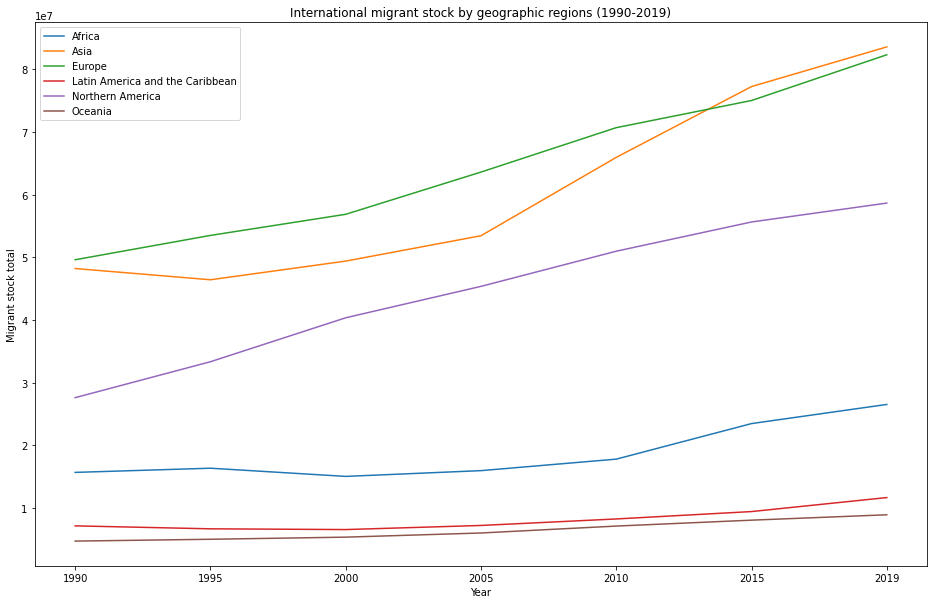

In [4]:
#plotting total migrant stock overtime (1990-2019) - both sexes, by geographic regions
#Africa, Asia, Europe, Latin America and the Caribbean, Northern America, and Oceania

#plot function
def plot_total(region):
    both_sexes_total.loc[region].plot(legend=True, figsize=(16,10), title='International migrant stock by geographic regions (1990-2019)')

plot_total('Africa')
plot_total('Asia')
plot_total('Europe')
plot_total('Latin America and the Caribbean')
plot_total('Northern America')
plot_total('Oceania')

plt.ylabel('Migrant stock total')
plt.xlabel('Year')

plt.show()

The geographic regions of Asia, Europe, and Northern America have seen an increase in total migrant stock (both sexes) from 1990 to 2019. In 2019, Asia surpassed Europe with the largest total migrant stock. The migrant stock levels in Africa remained stable from 1990 to 2010, and increased from 2010-2019, but well below the levels of Asia, Europe, and Northern America. The migrant stock in Oceania, and Latin America and the Caribbean has remained stable overtime, and the total is much smaller compared to other regions.

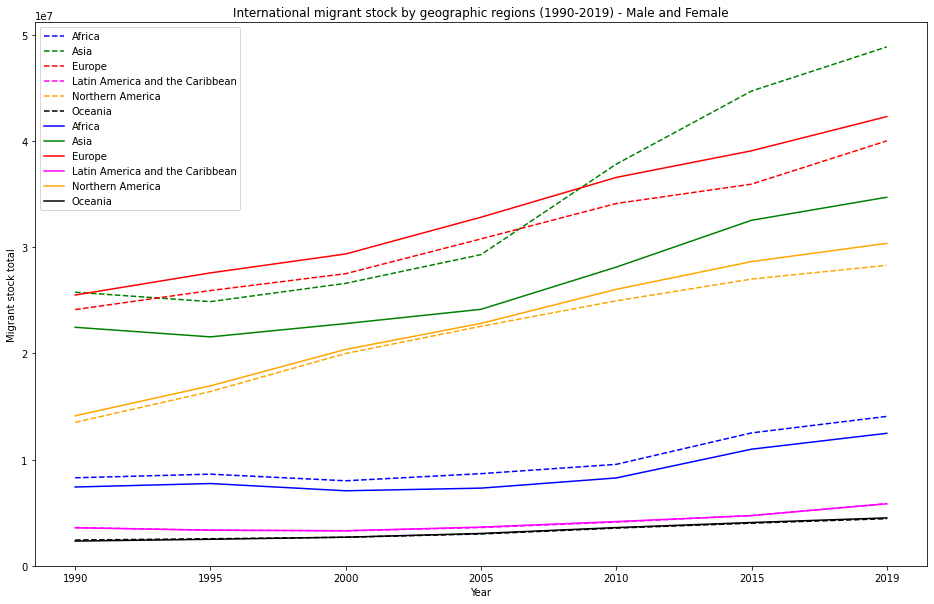

In [5]:
#plotting total migrant stock overtime (1990-2019) - male and female, by geographic regions
#Africa, Asia, Europe, Latin America and the Caribbean, Northern America, and Oceania

#plot function - male
def plot_total_male(region, color):
    male_total.loc[region].plot(legend=True, figsize=(16,10), 
                                title='International migrant stock by geographic regions (1990-2019) - Male and Female',
                                linestyle='dashed', color=color)

#plot function - female
def plot_total_female(region, color):
    female_total.loc[region].plot(legend=True, figsize=(16,10), 
                                title='International migrant stock by geographic regions (1990-2019) - Male and Female',
                                color=color)

plot_total_male('Africa', 'blue')
plot_total_male('Asia', 'green')
plot_total_male('Europe', 'red')
plot_total_male('Latin America and the Caribbean', 'magenta')
plot_total_male('Northern America', 'orange')
plot_total_male('Oceania', 'black')

plot_total_female('Africa', 'blue')
plot_total_female('Asia', 'green')
plot_total_female('Europe', 'red')
plot_total_female('Latin America and the Caribbean', 'magenta')
plot_total_female('Northern America', 'orange')
plot_total_female('Oceania', 'black')

plt.ylabel('Migrant stock total')
plt.xlabel('Year')

plt.show()

In Asia, there is a larger difference between the male and female migrant stock totals.

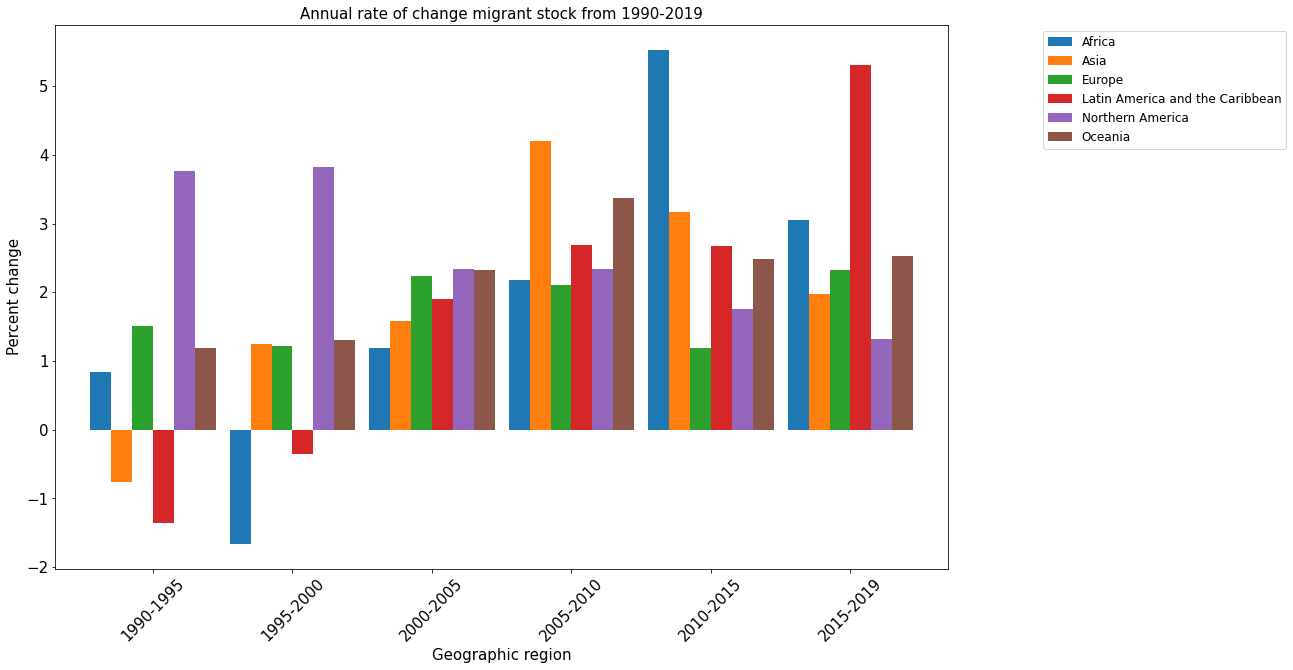

In [6]:
#annual rate of change - male and female

#subset data
annual_change_regions_plot = both_sexes_annual_change.loc[['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania'], :]

#transpose dataframe to plot percent change over time
annual_change_regions_plot.T.plot.bar(figsize = (16, 10), width = .9)
plt.legend(bbox_to_anchor=(1.1, 1), fontsize=12)
plt.title('Annual rate of change migrant stock from 1990-2019', fontsize=15)
plt.ylabel('Percent change', fontsize=15)
plt.xlabel('Geographic region', fontsize=15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation=45) 
plt.show()

From 2000 to 2019, all regions had positive increases in total migrant stock. From 1990-2000, Latin America and the Caribbean saw a decrease in total migrant stock. The positive percent change in migrant stock in Northern America has been decreasing since 2000.

# 3.2 Comparing countries in each geographic region
## 3.2 (a) Asia

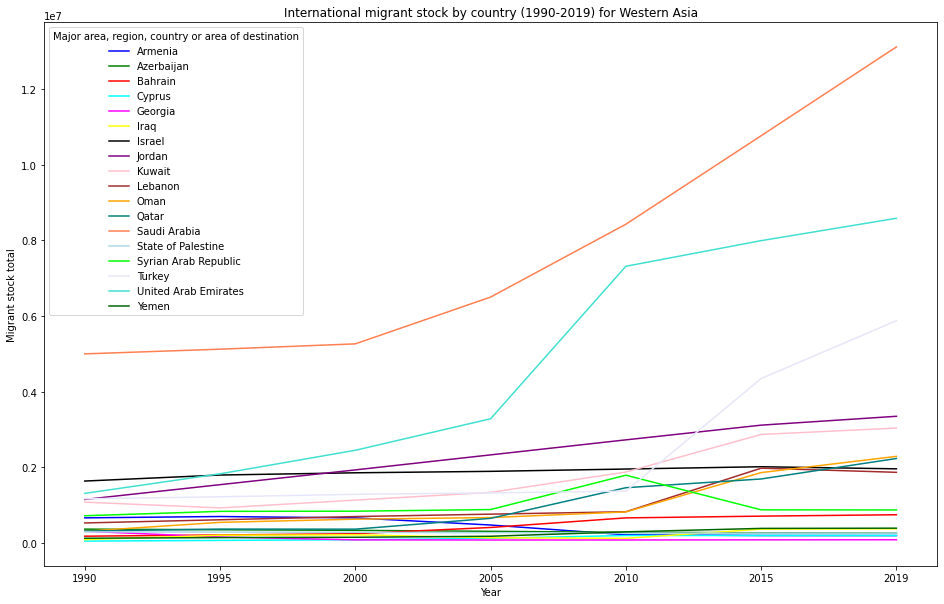

In [7]:
#subset total migrant stock dataframe for only countries in Asia, drop region rows
asia_total = both_sexes_total.loc['Armenia':'Viet Nam', :].drop(['CENTRAL AND SOUTHERN ASIA',
                                                                         'EASTERN AND SOUTH-EASTERN ASIA', 'Central Asia',
                                                                         'South-Eastern Asia','Eastern Asia',
                                                                         'Southern Asia'], axis=0)

#replace the default cycle colors with more selection of colors, since comparing many countries
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 
'turquoise', 'darkgreen', 'tan', 'salmon', 'gold'])

#function for plotting total migrant stock
#transpose dataframe to plot over time
def plot_total(df, country1, country2, region):
    df.loc[country1:country2].T.plot(legend=True, figsize=(16,10), 
                    title=f'International migrant stock by country (1990-2019) for {region}')

#Western Asia - total migrant stock
plot_total(asia_total,'Armenia','Yemen','Western Asia')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.show()

Saudi Arabia has the most migrant stock compared to the other countries in western Asia, followed by the United Arab Emirates. This number has been increasing steadily since 2000.

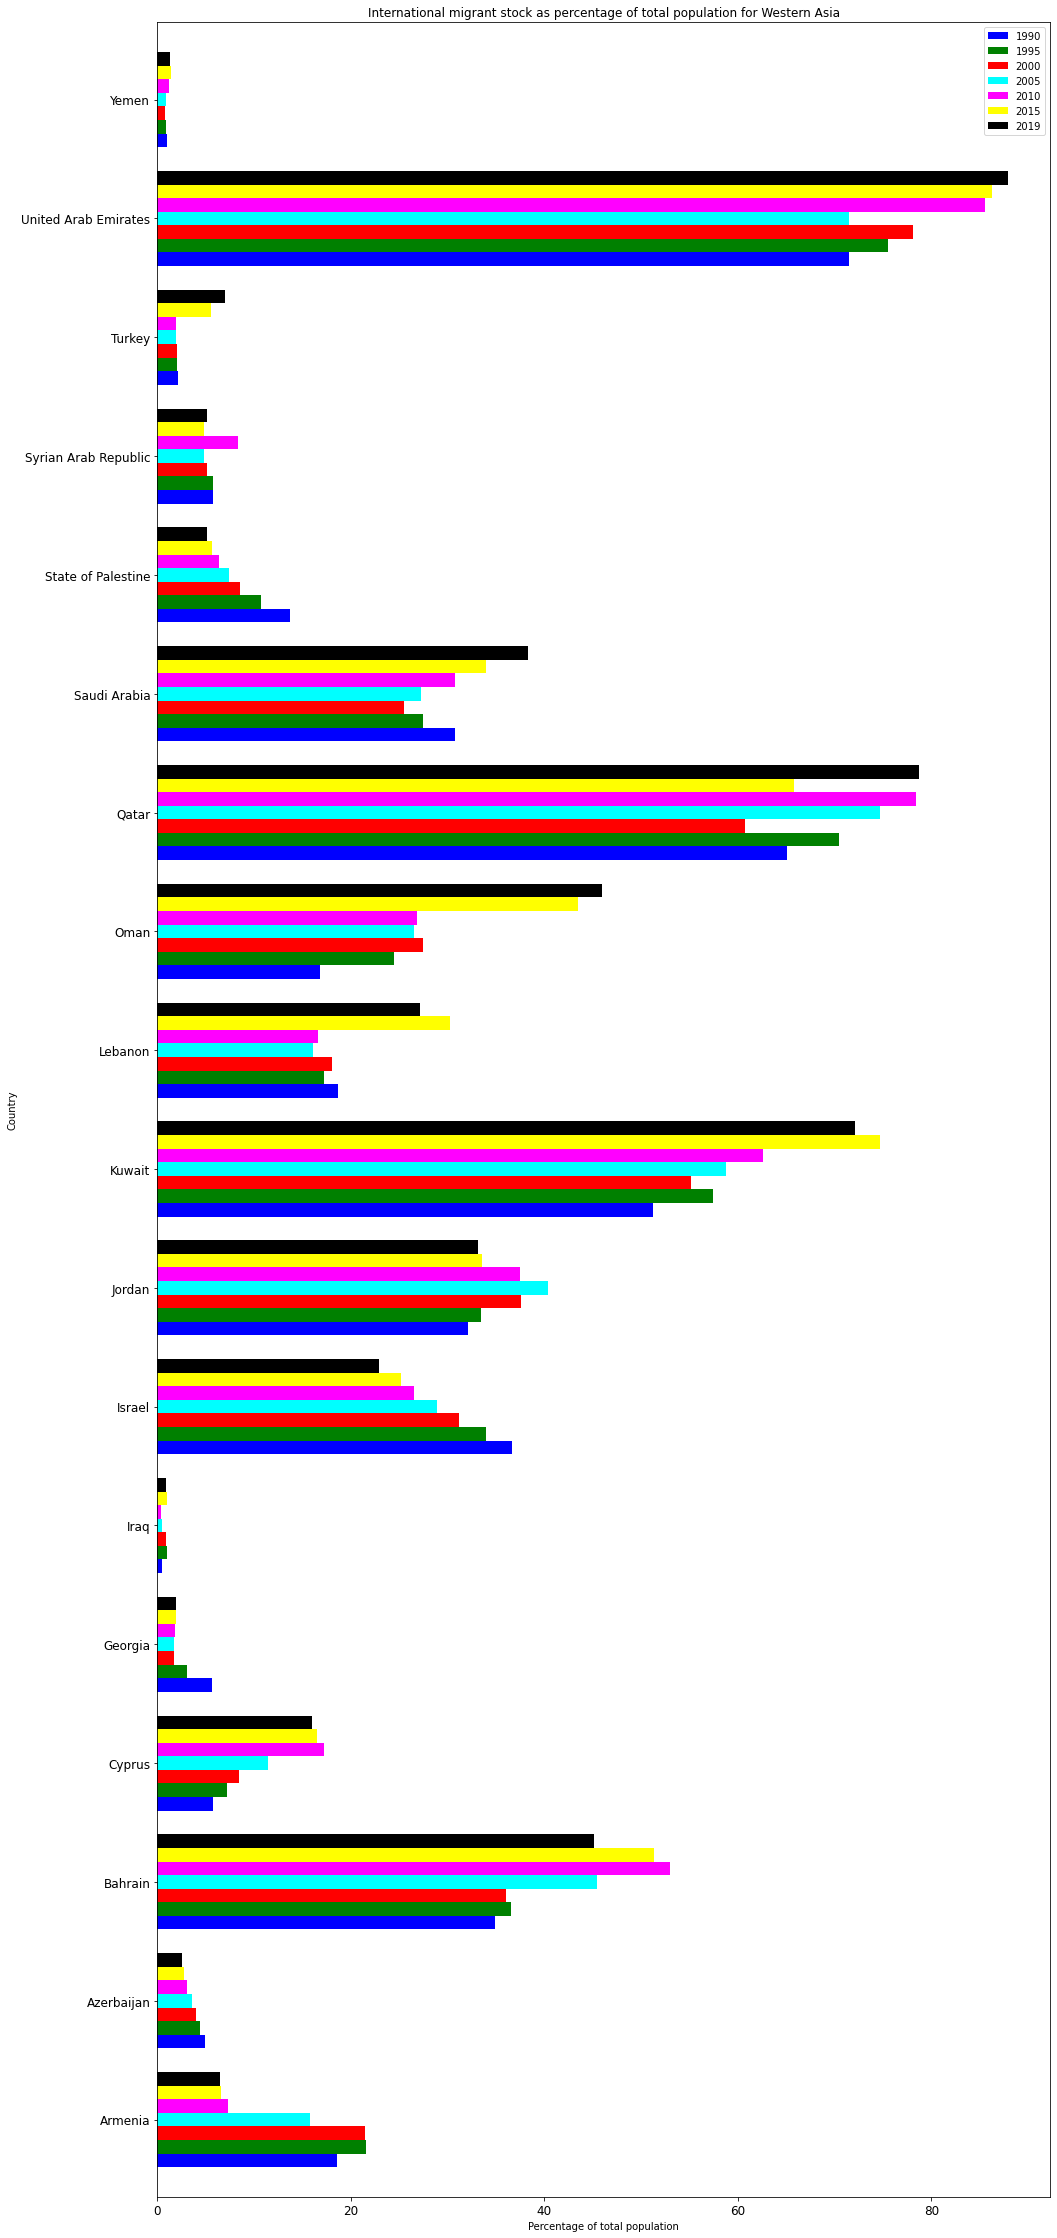

In [8]:
#comparing migrant stock as percentage of total population
#both_sexes_stock_pct
#subset migrant stock as percentage of total population dataframe for only countries in Asia, drop region rows
asia_pct = both_sexes_stock_pct.loc['Armenia':'Viet Nam', :].drop(['CENTRAL AND SOUTHERN ASIA',
                                                                         'EASTERN AND SOUTH-EASTERN ASIA', 'Central Asia',
                                                                         'South-Eastern Asia','Eastern Asia',
                                                                         'Southern Asia'], axis=0)

#function for plotting stock as percentage of total population
def countries_pct(df, country1, country2, region):
    df.loc[country1:country2].plot(kind='barh', figsize=(16,40), width =0.8,
                                title=f'International migrant stock as percentage of total population for {region}',
                                fontsize=12).set(xlabel='Percentage of total population', ylabel='Country')
                            
#Western Asia - migrant stock as percentage of total population
countries_pct(asia_pct,'Armenia','Yemen','Western Asia')
plt.show()

In Western Asia, the top 3 countries with the highest migrant stock as percentage of the total population are the United Arab Emirates (UAE), Qatar, and Kuwait. In 2019, migrants made up 80% of the total population in the UAE.

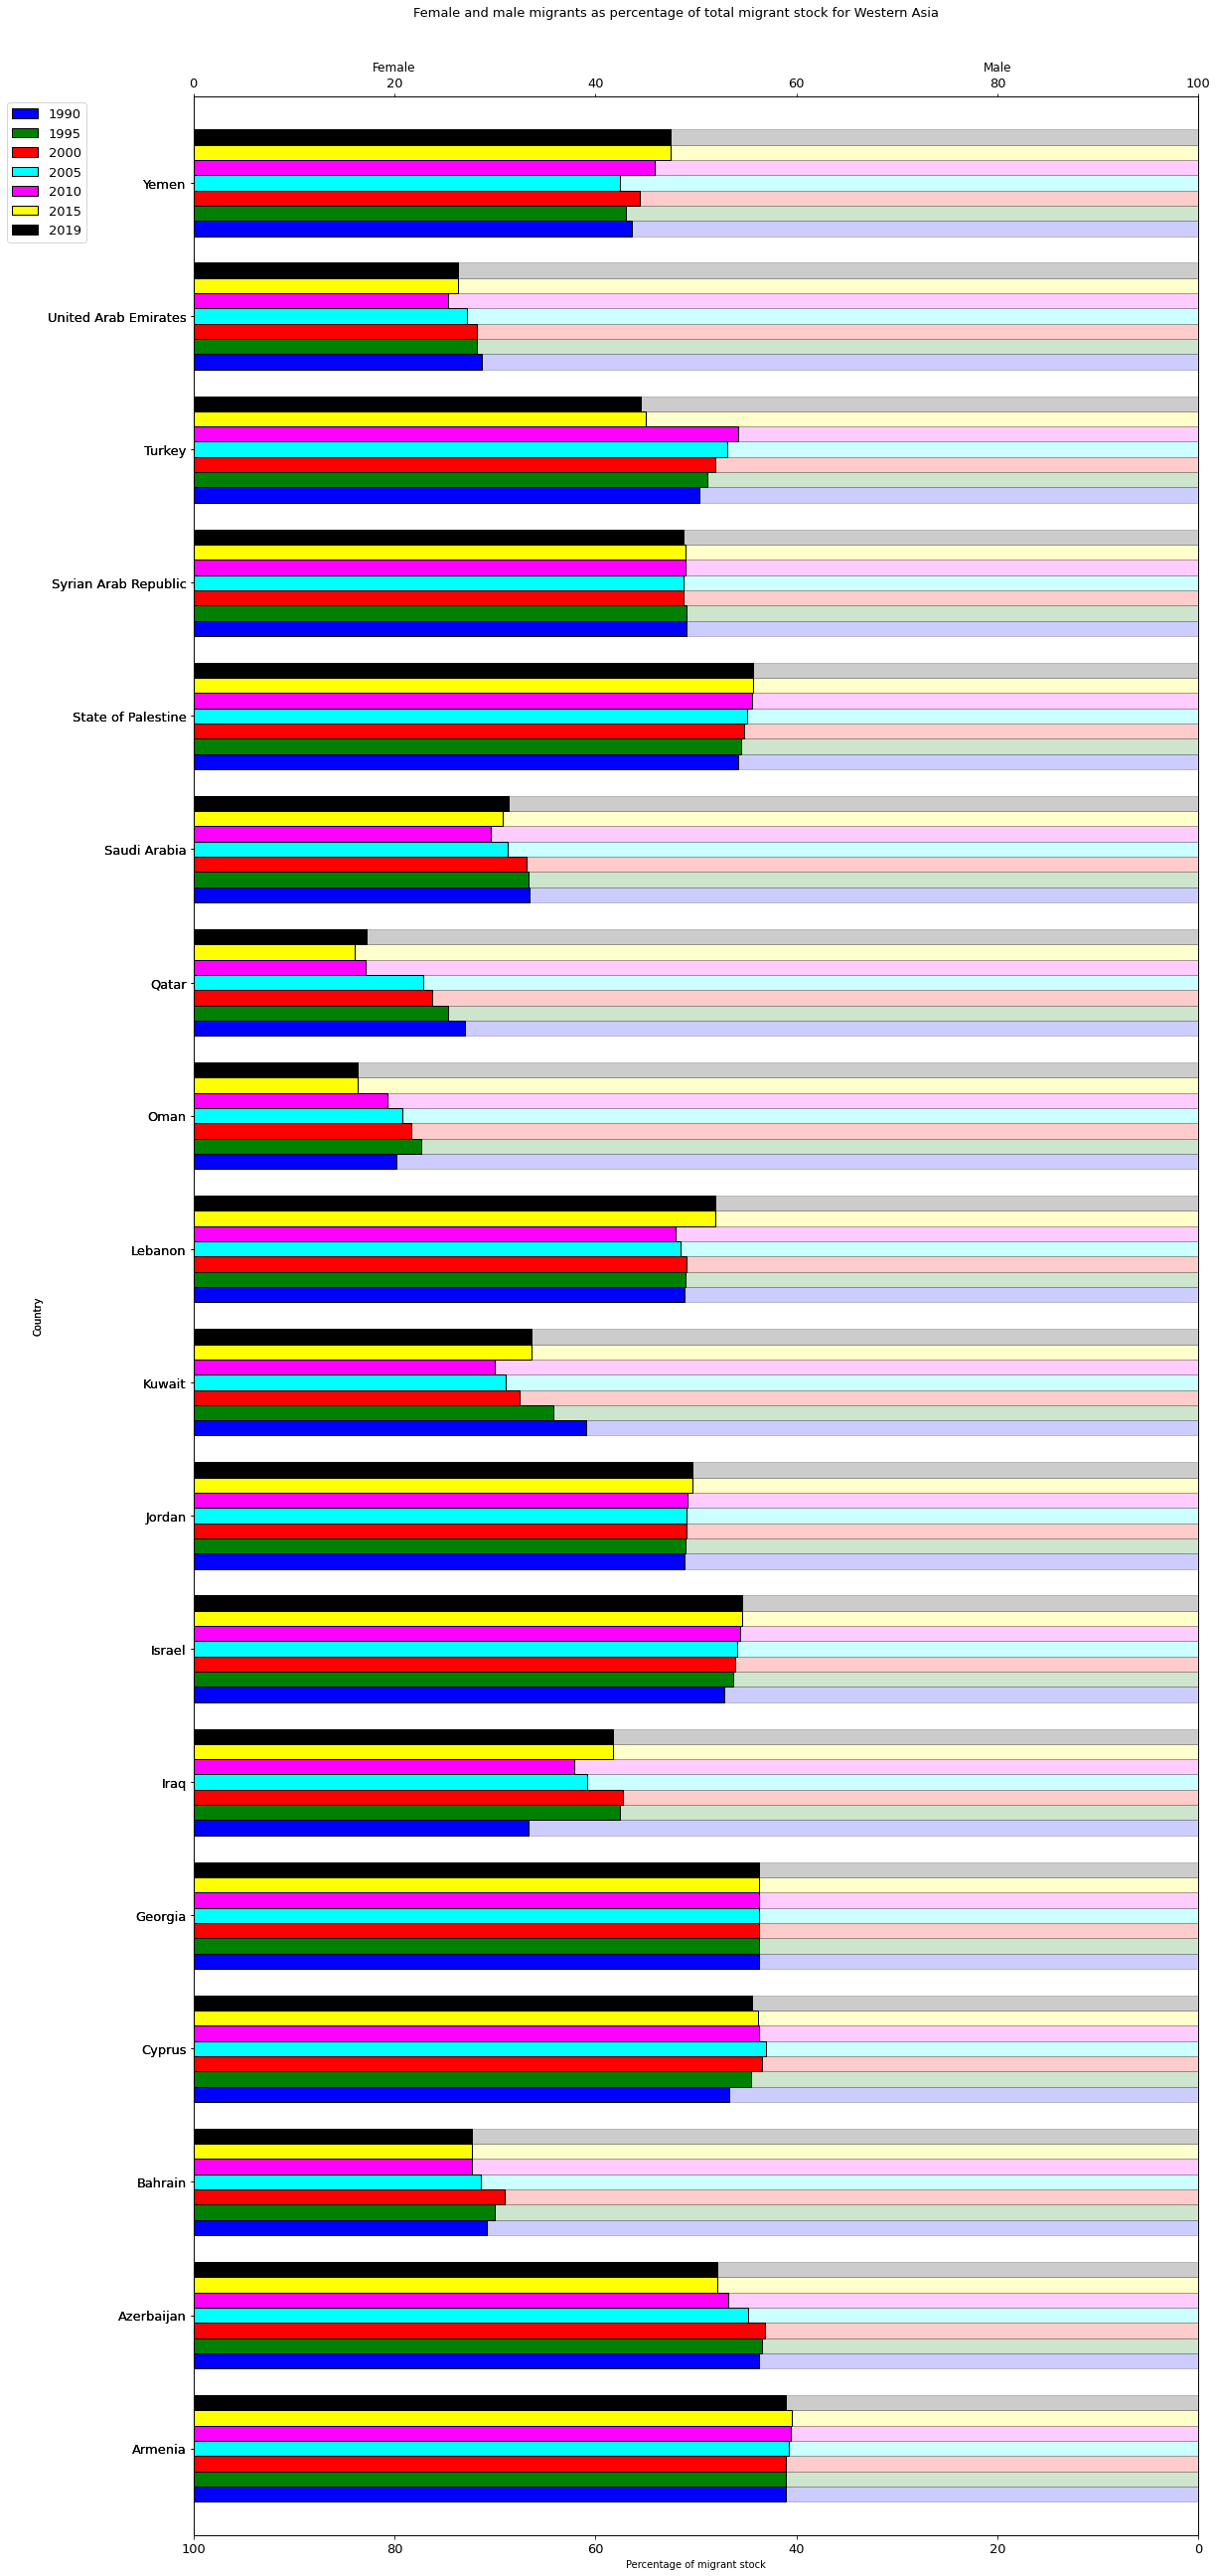

In [9]:
#comparing male and female migrants as percentage of international stock
#already have dataframe for female migrants as percentage of migrant stock - female_percentage_final (10)

#dataframe for male migrants as percentage of migrant stock
#create new dataframe by dividing dataframe male_total by dataframe both_sexes_total and multiply by 100
male_percentage_final = (male_total/both_sexes_total)*100

#subset male migrants as percentage of migrant stock dataframe for only countries in Asia, drop region rows
male_final_asia = male_percentage_final.loc['Armenia':'Viet Nam', :].drop(['CENTRAL AND SOUTHERN ASIA',
                                                                         'EASTERN AND SOUTH-EASTERN ASIA', 'Central Asia',
                                                                         'South-Eastern Asia','Eastern Asia','Southern Asia'], axis=0)

#subset female migrants as percentage of migrant stock dataframe for only countries in Asia, drop region rows
female_final_asia = female_percentage_final.loc['Armenia':'Viet Nam', :].drop(['CENTRAL AND SOUTHERN ASIA',
                                                                         'EASTERN AND SOUTH-EASTERN ASIA', 'Central Asia',
                                                                         'South-Eastern Asia','Eastern Asia','Southern Asia'], axis=0)

#comparing male and female percentages on same plot - Western Asia
fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Western Asia', fontsize=13)
fig.tight_layout()
male_final_asia.loc['Armenia':'Yemen'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                 ylabel='Country')


#plot female data on same figure                                                                                
axes2 = axes.twiny()
female_final_asia.loc['Armenia':'Yemen'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')

axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female', x=0.2)
plt.show()

Male migrants in the UAE, Saudi Arabia, Qatar, Oman, and Bahrain make up a large portion of the total migrant stock in each country compared to males. 

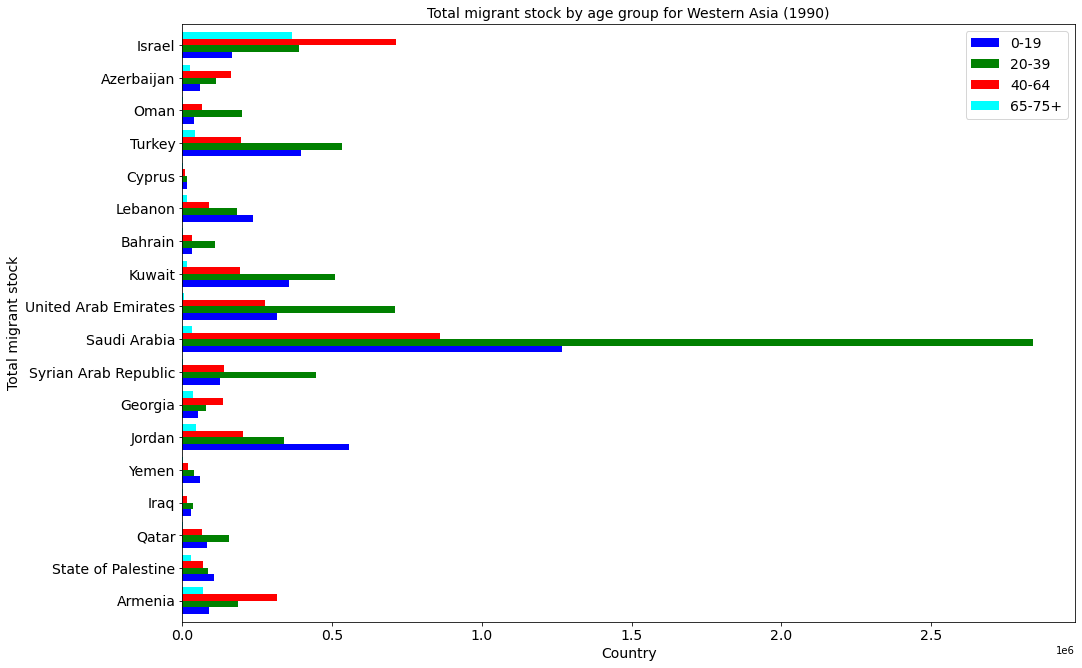

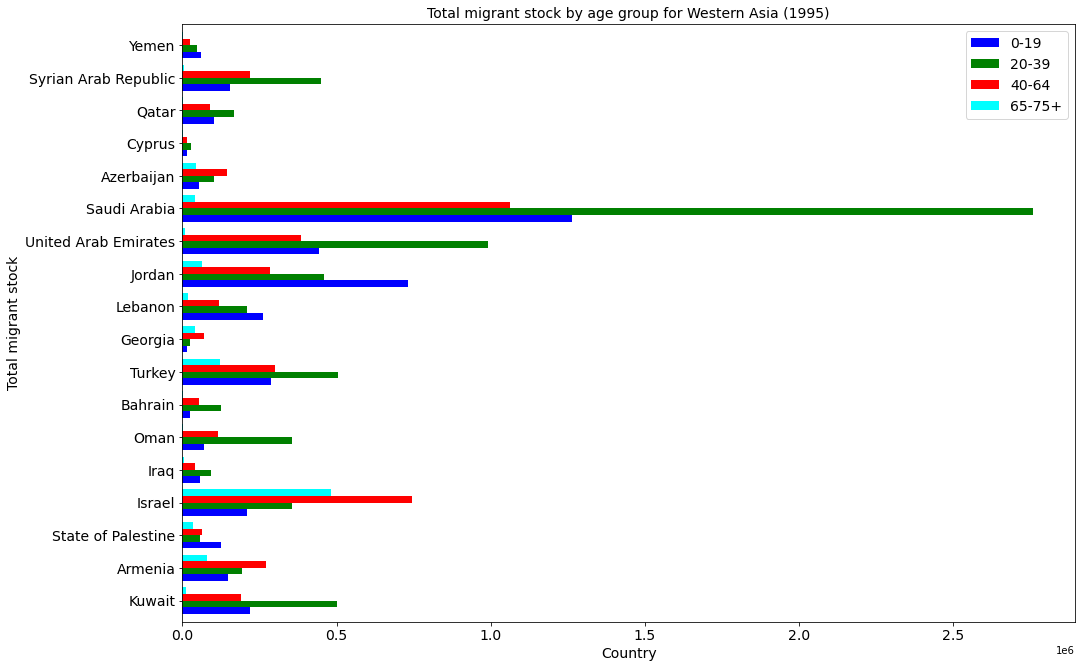

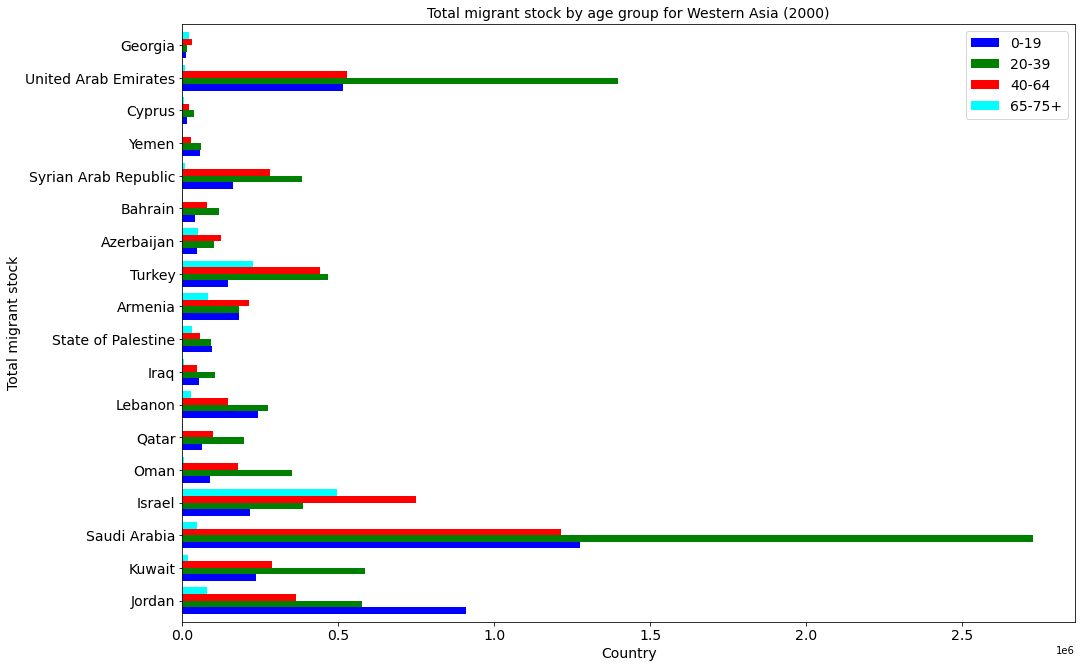

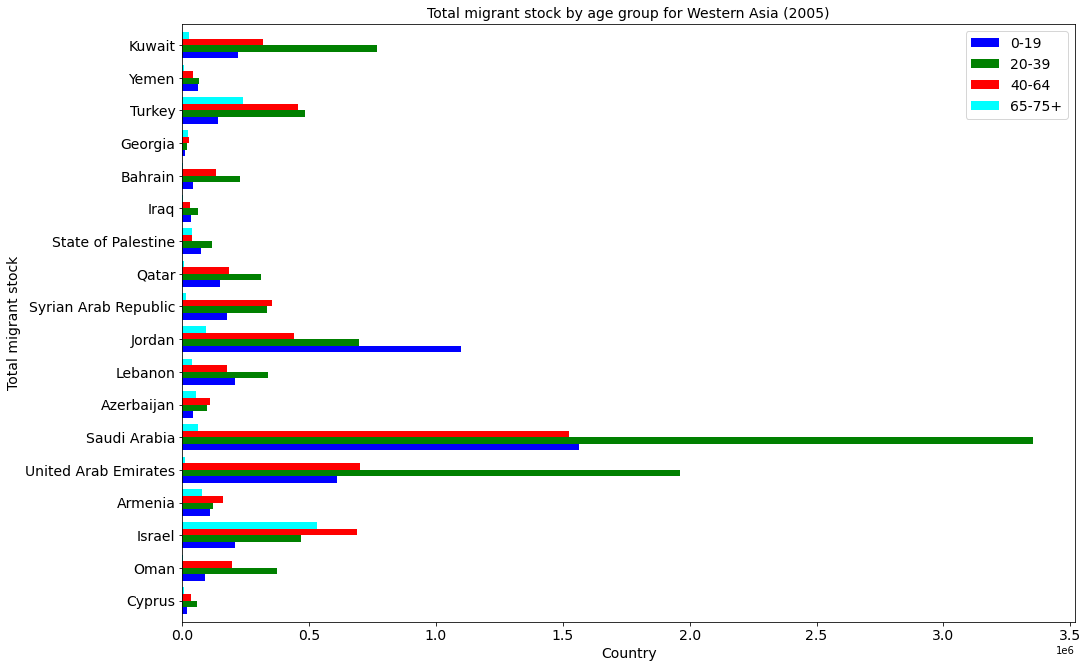

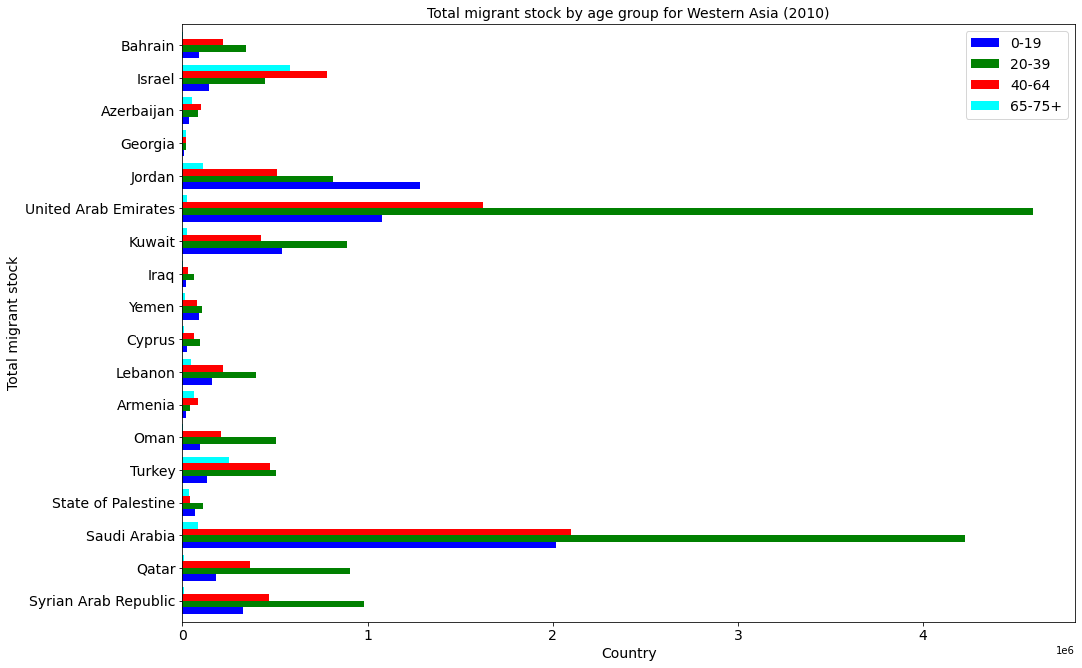

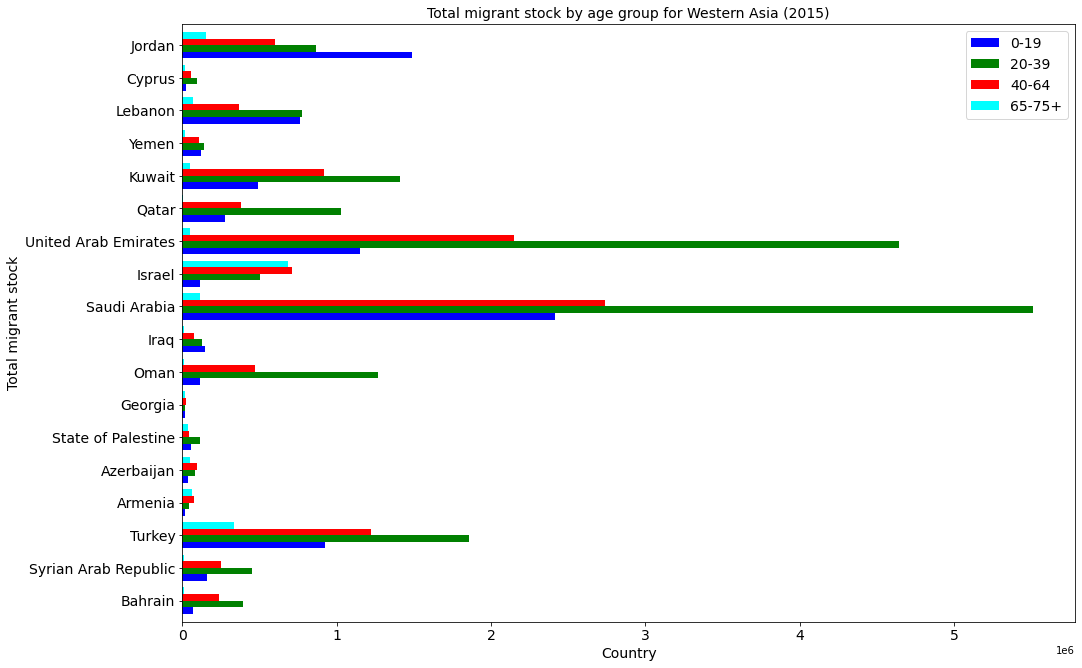

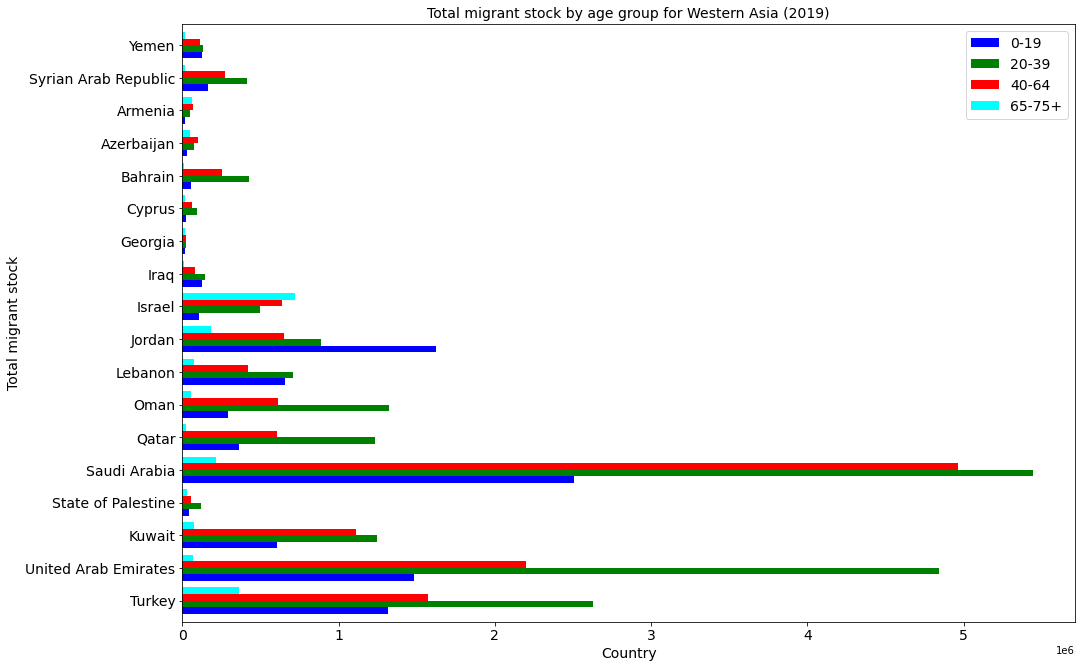

In [10]:
#comparing age groups in absolute

#list of countries - asia
asia_countries = ['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq',
       'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar',
       'Saudi Arabia', 'State of Palestine', 'Syrian Arab Republic', 'Turkey',
       'United Arab Emirates', 'Yemen', 'Kazakhstan', 'Kyrgyzstan',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Afghanistan', 'Bangladesh',
       'Bhutan', 'India', 'Iran (Islamic Republic of)', 'Maldives', 'Nepal',
       'Pakistan', 'Sri Lanka', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', "Dem. People's Republic of Korea", 'Japan',
       'Mongolia', 'Republic of Korea', 'Brunei Darussalam', 'Cambodia',
       'Indonesia', "Lao People's Democratic Republic", 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']

#further processing, both_sexes_stock_age dataframe, sort by country and year before subsetting for plotting
sorted_countries = both_sexes_stock_age.sort_values(by=['Major area, region, country or area of destination','Year'],
                                                   ascending = [True, True])#.reset_index()

#sum specific age groups and to make new age groups for better visualization
sorted_countries['0-19'] = sorted_countries['0-4'] + sorted_countries['5-9'] + sorted_countries['10-14'] + sorted_countries['15-19']
sorted_countries['20-39'] = sorted_countries['20-24'] + sorted_countries['25-29'] + sorted_countries['30-34'] + sorted_countries['35-39']
sorted_countries['40-64'] = sorted_countries['40-44'] + sorted_countries['45-49'] + sorted_countries['50-54'] + sorted_countries['55-59'] + sorted_countries['60-64']
sorted_countries['65-75+'] = sorted_countries['65-69'] + sorted_countries['70-74'] + sorted_countries['75+']

#subset migrant stock by age and year dataframe for only countries in Asia, drop region rows
age_asia = sorted_countries.loc[asia_countries, :]

#western asia, comparing migrant stock (7 plots total, 1 for each year)
#subset data
western_asia=age_asia.loc[['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq',
       'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar',
       'Saudi Arabia', 'State of Palestine', 'Syrian Arab Republic', 'Turkey',
       'United Arab Emirates', 'Yemen']]

#sort by year
western_asia_sort = western_asia.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#western_asia_1990
western_asia_1990 = western_asia_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_1995
western_asia_1995 = western_asia_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (1995)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_2000
western_asia_2000 = western_asia_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_2005
western_asia_2005 = western_asia_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_2010
western_asia_2010 = western_asia_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_2015
western_asia_2015 = western_asia_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_asia_2019
western_asia_2019 = western_asia_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_asia_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh', width=.8)
plt.title('Total migrant stock by age group for Western Asia (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 20-39 age group make up a larger portion of the total migrant
population compared to other age groups, especially in Saudi Arabia and the UAE.

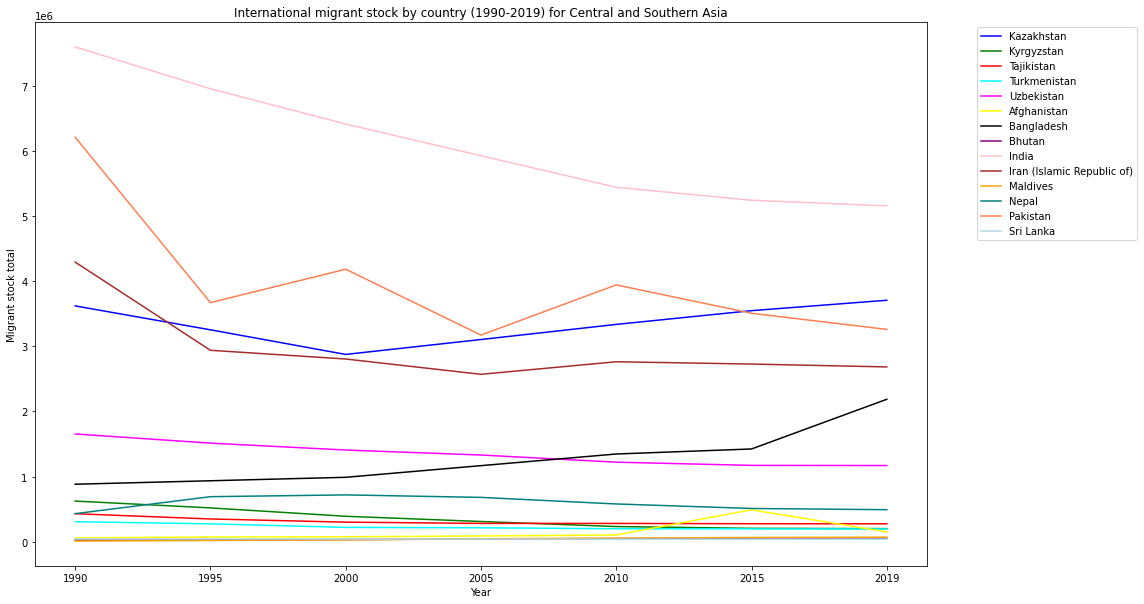

In [11]:
#Central and Southern Asia - total migrant stock
plot_total(asia_total,'Kazakhstan','Sri Lanka','Central and Southern Asia')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

India has the most migrant stock compared to the other countries in central and southern Asia as of 2019, although this number has been decreasing since 1990.

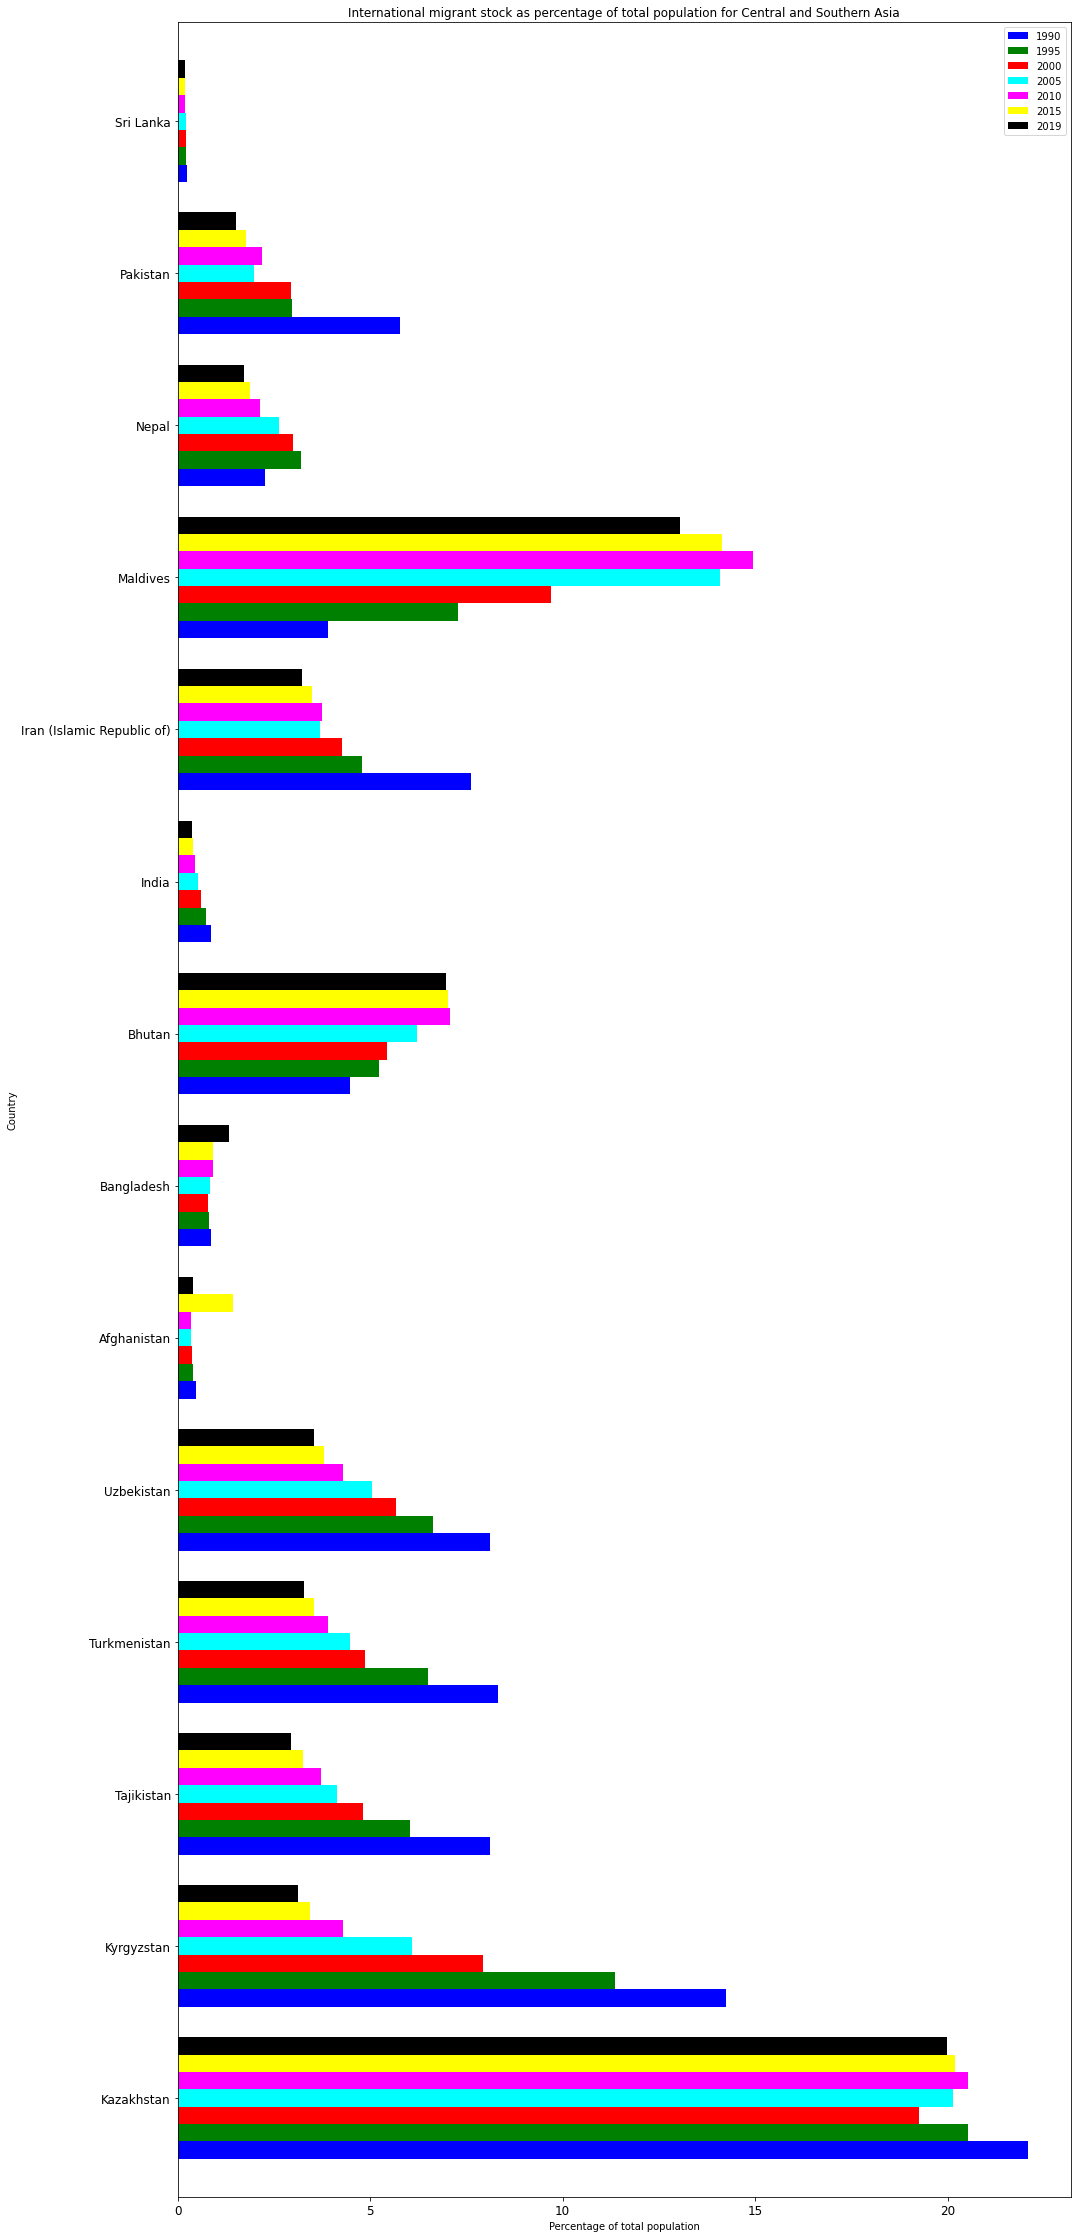

In [12]:
#Central and Southern Asia - migrant stock as percentage of total population
countries_pct(asia_pct,'Kazakhstan','Sri Lanka','Central and Southern Asia')
plt.show()

In Central and Southern Asia, the top country with the highest migrant stock as percentage of the total population is Kazakhstan. The percentage has decreased from 1990-2019. However, the percentages are not nearly as high (0-30% range) compared to Western Asia (0-90%).

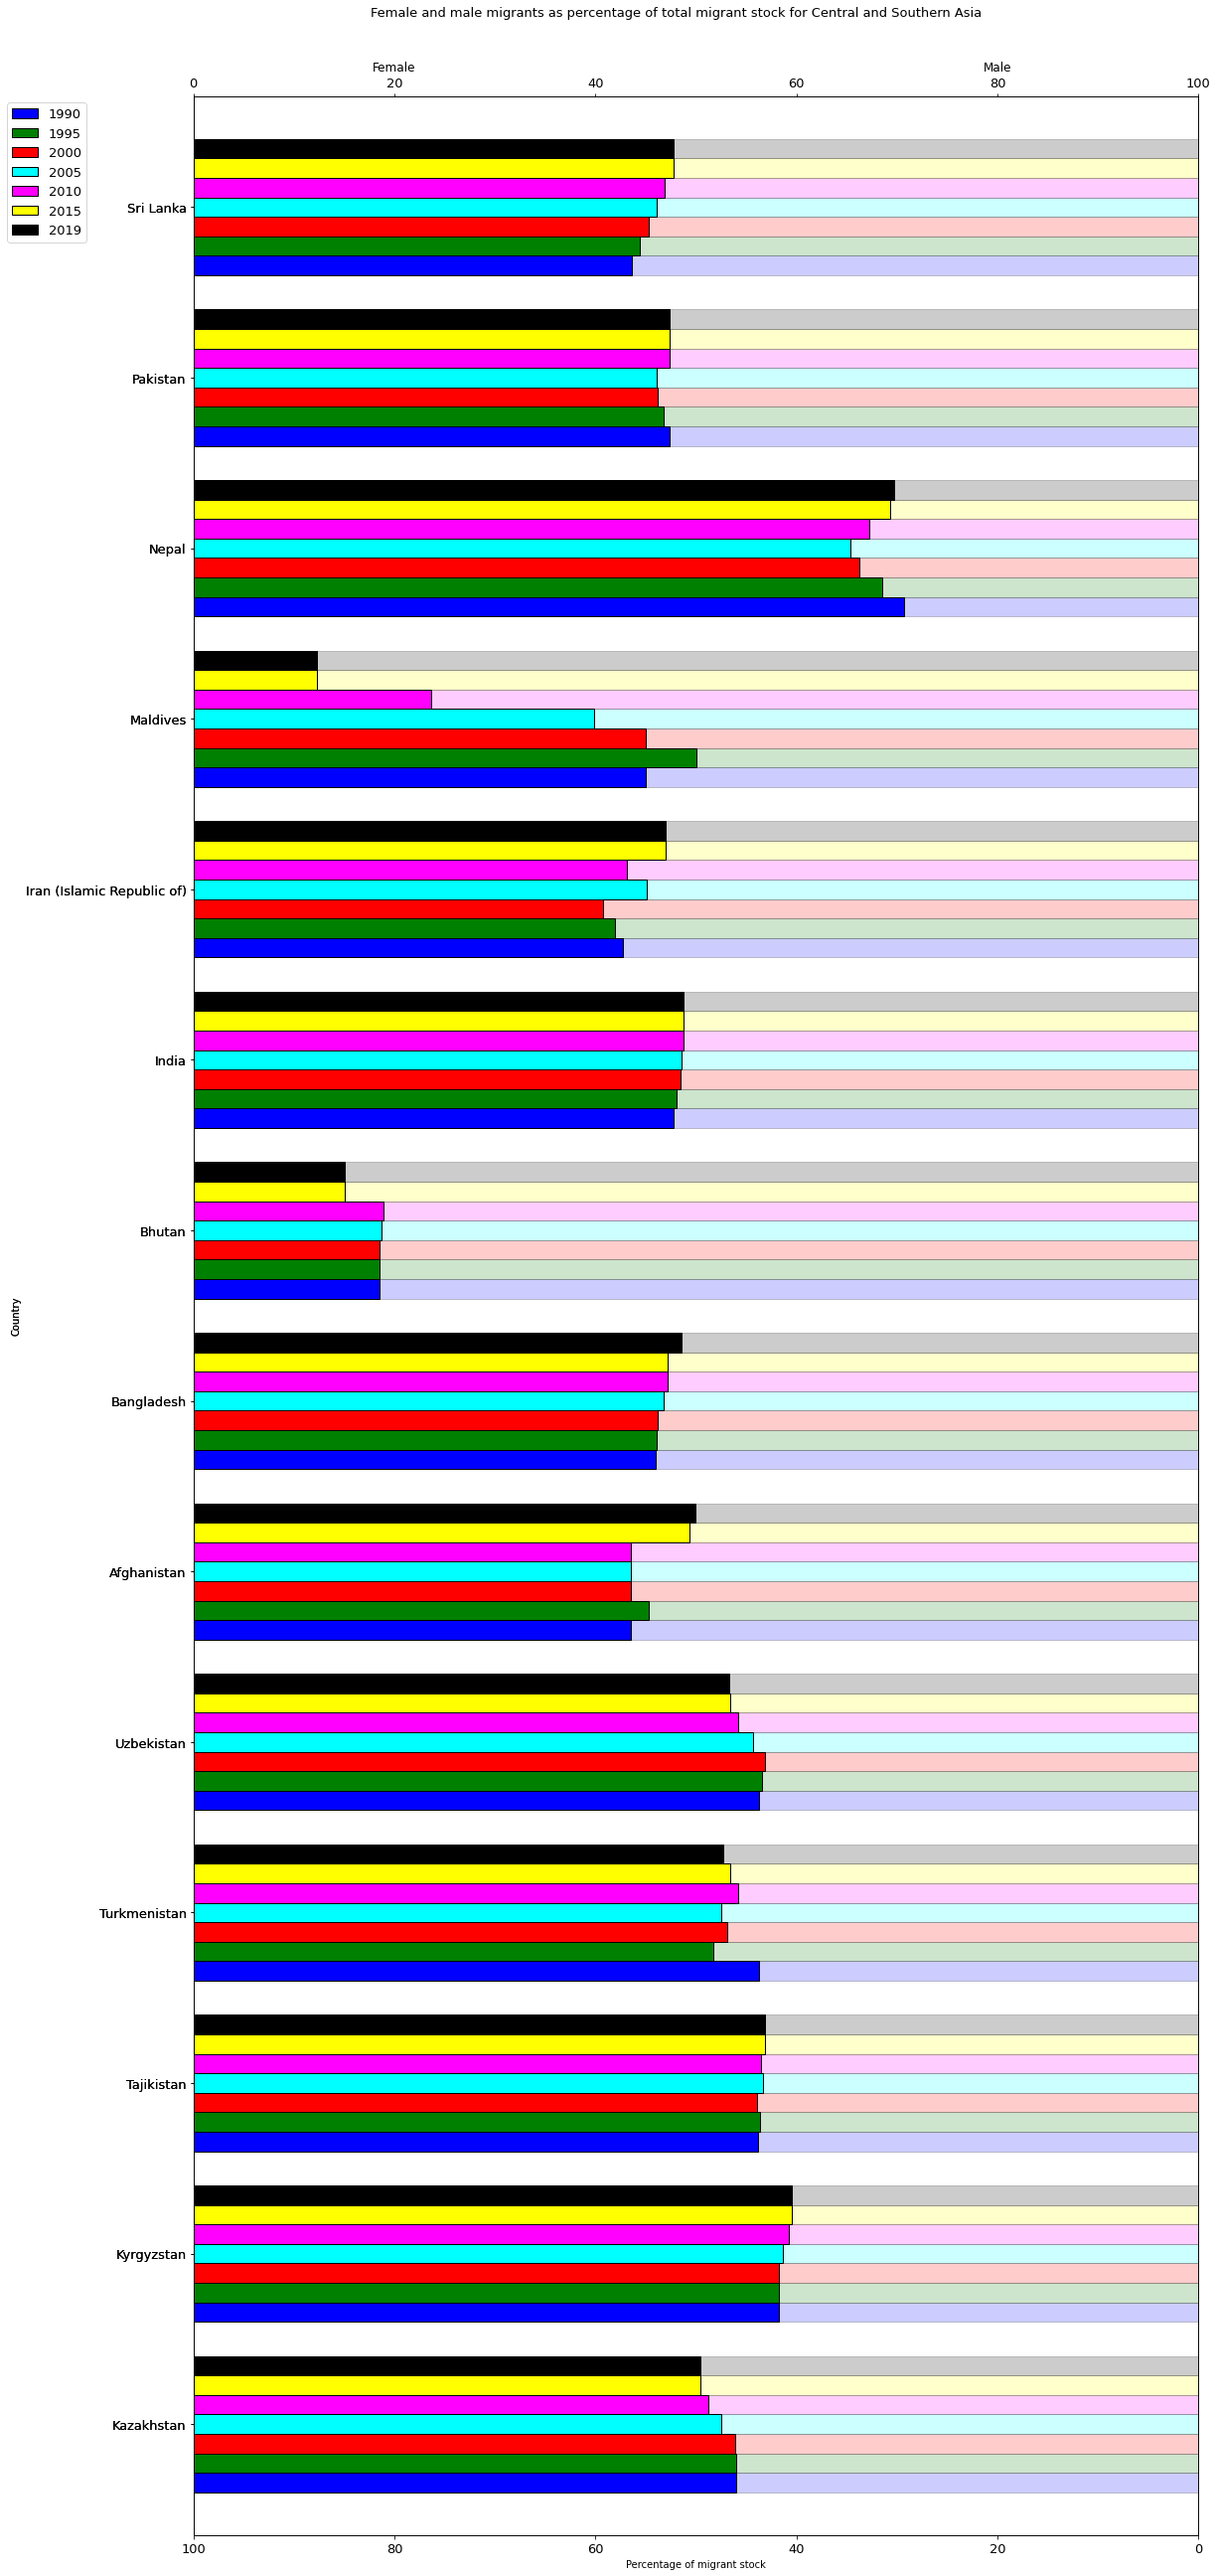

In [13]:
#comparing male and female percentages on same plot - Central and Southern Asia
fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Central and Southern Asia', fontsize=13)
fig.tight_layout()
male_final_asia.loc['Kazakhstan':'Sri Lanka'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_asia.loc['Kazakhstan':'Sri Lanka'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

In Nepal, female migrants make up a larger percentage of the total migrant stock. Male migrants dominate in Baldives and Bhutan.

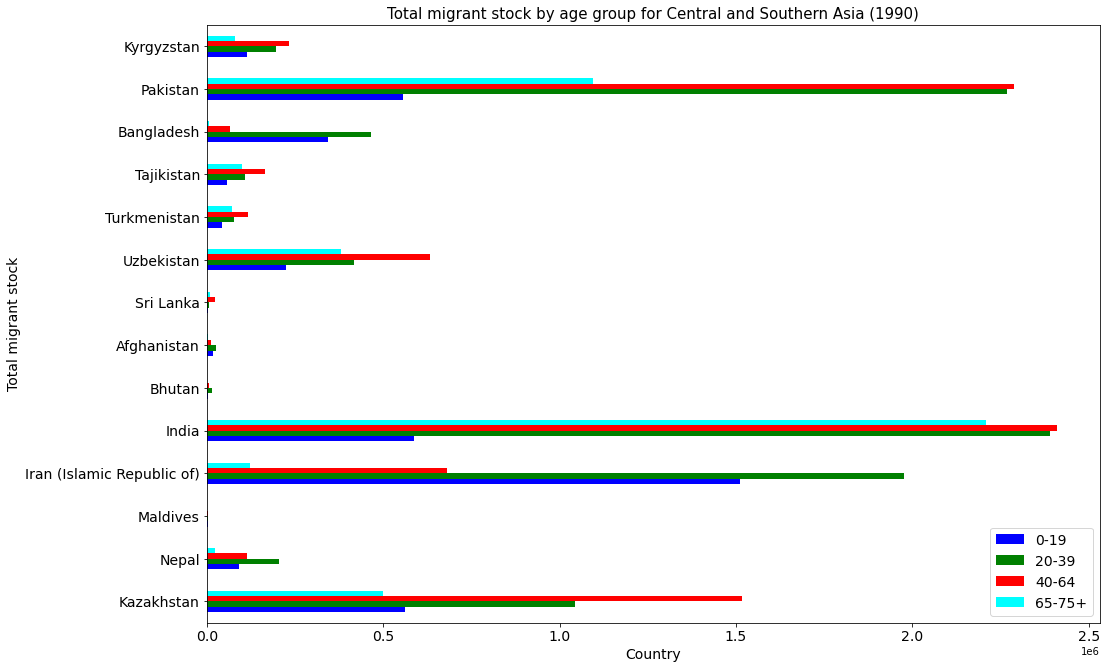

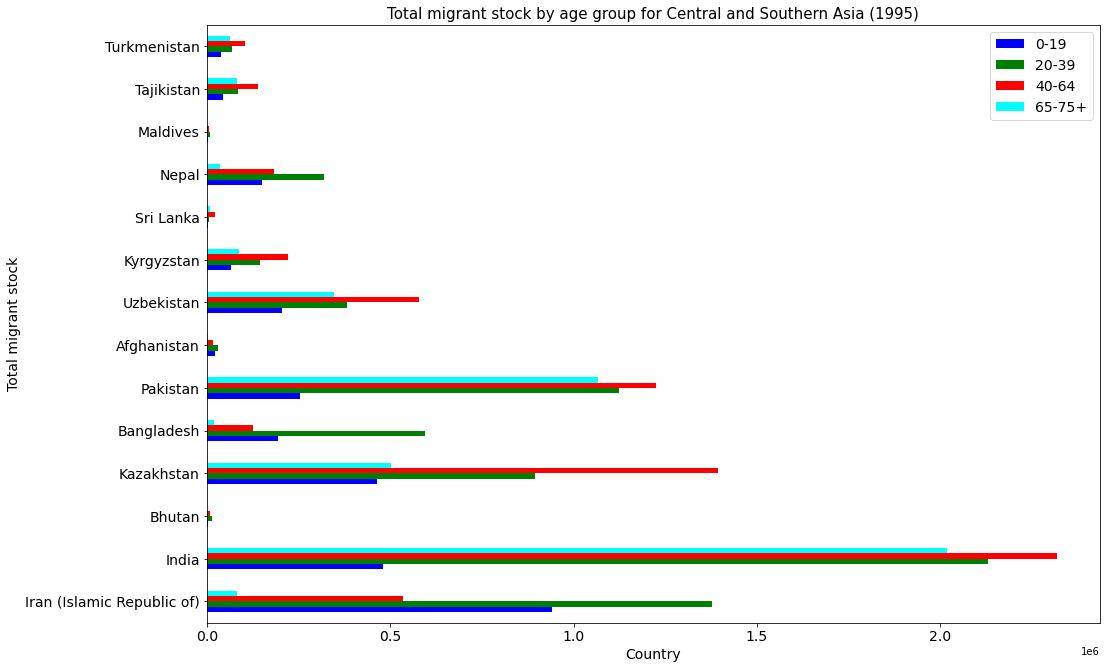

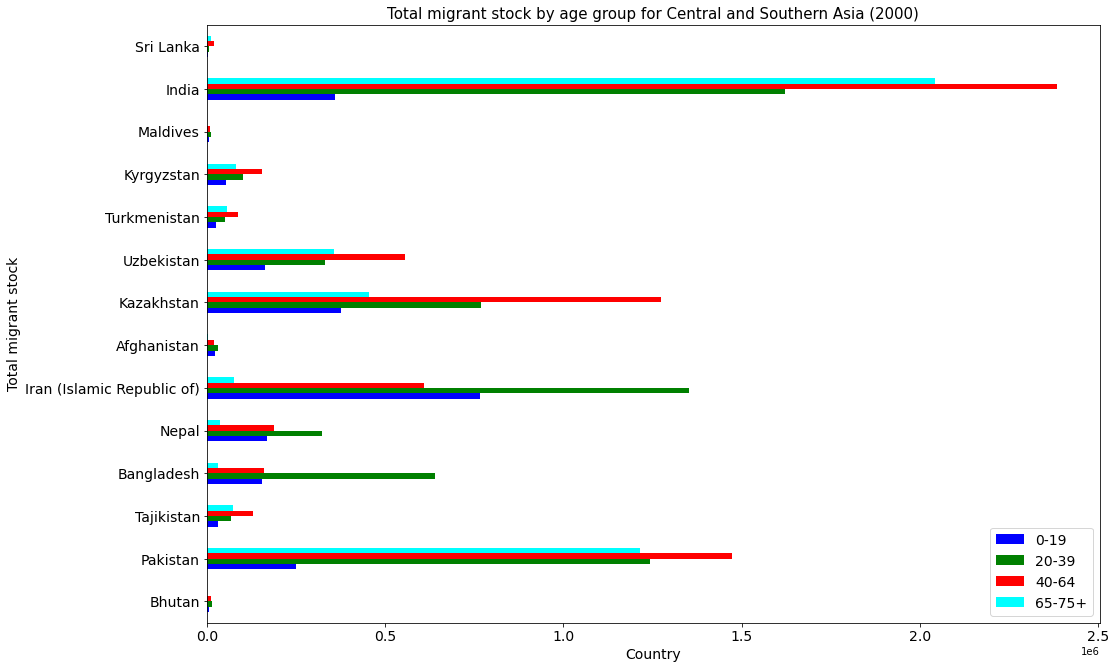

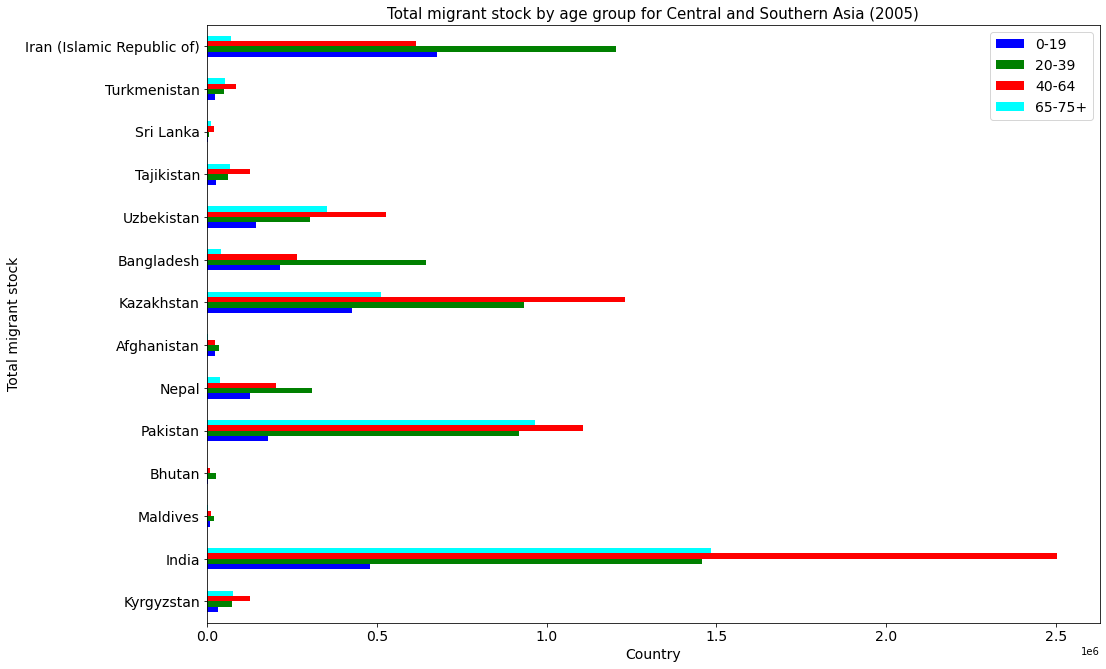

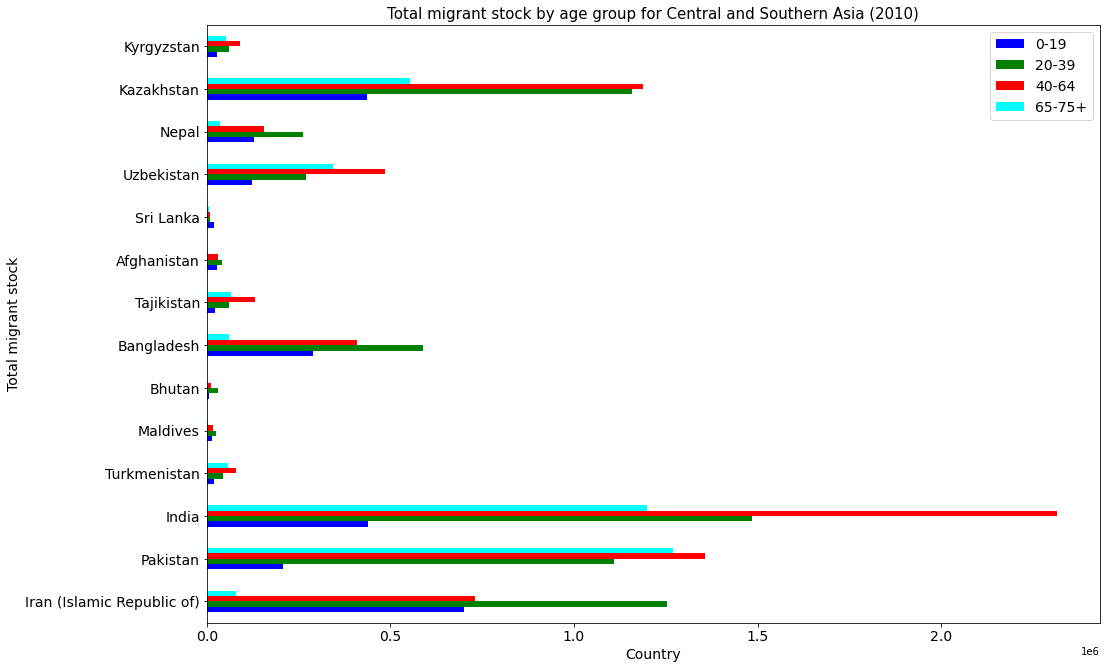

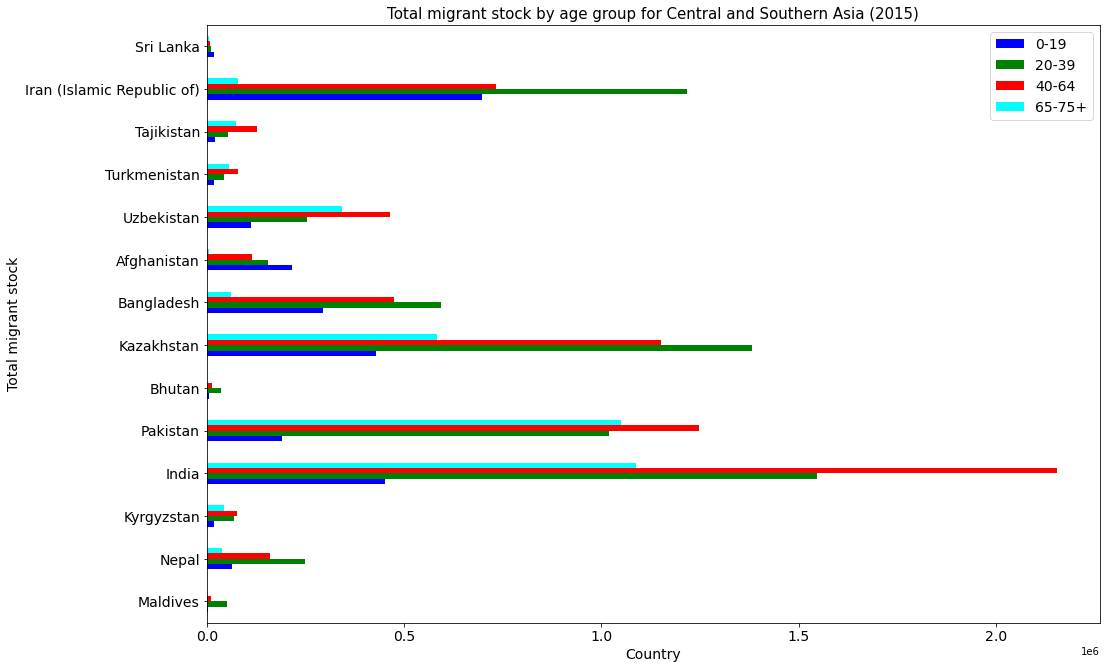

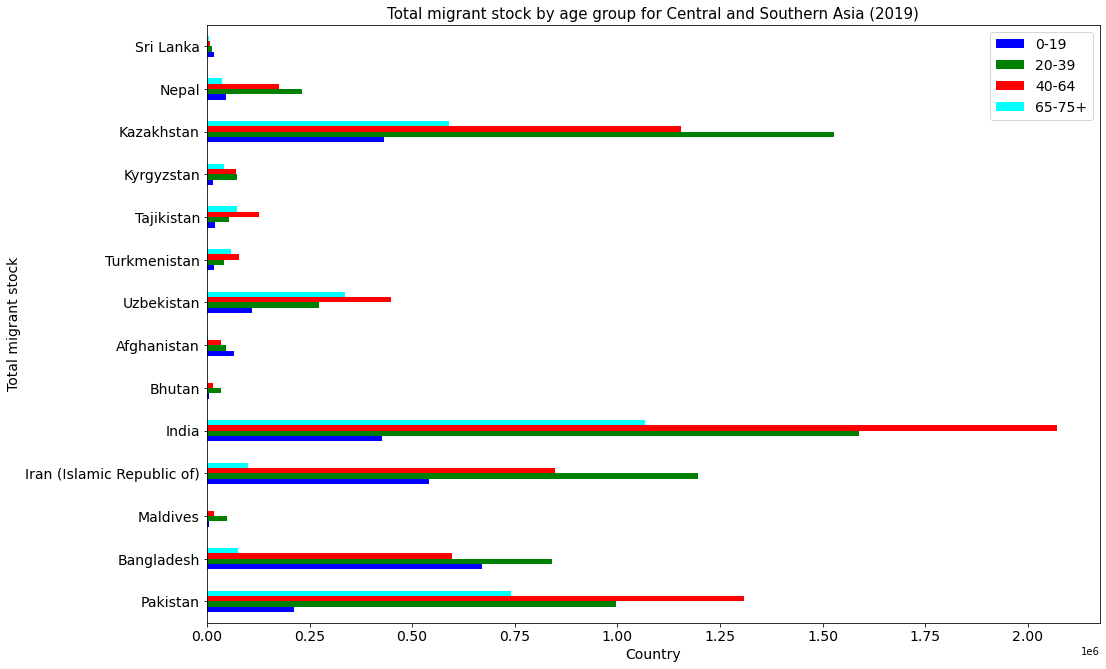

In [14]:
#central and southern asia, comparing migrant stock (7 plots total, 1 for each year)
#subset data
central_southern_asia=age_asia.loc[['Kazakhstan', 'Kyrgyzstan',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Afghanistan', 'Bangladesh',
       'Bhutan', 'India', 'Iran (Islamic Republic of)', 'Maldives', 'Nepal',
       'Pakistan', 'Sri Lanka']]

#sort by year
central_southern_asia_sort = central_southern_asia.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#central_southern_asia_1990
central_southern_1990 = central_southern_asia_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (1990)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_1995
central_southern_1995 = central_southern_asia_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (1995)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_2000
central_southern_2000 = central_southern_asia_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (2000)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_2005
central_southern_2005 = central_southern_asia_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (2005)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_2010
central_southern_2010 = central_southern_asia_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (2010)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_2015
central_southern_2015 = central_southern_asia_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (2015)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#central_southern_asia_2019
central_southern_2019 = central_southern_asia_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
central_southern_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Central and Southern Asia (2019)', fontsize=15)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 40-64 age group make up a larger portion of the total migrant
population compared to other age groups, especially in India.

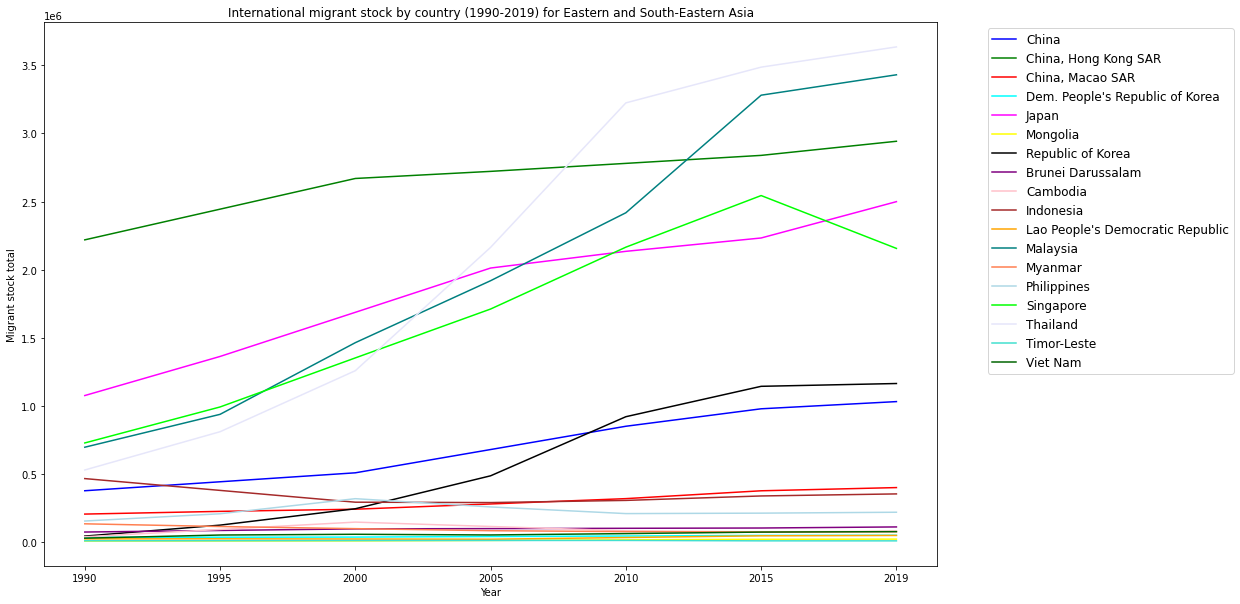

In [15]:
#Eastern and South-Eastern Asia - total migrant stock
plot_total(asia_total,'China','Viet Nam','Eastern and South-Eastern Asia')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=12)
plt.show()

Thailand has the most migrant stock compared to the other countries in eastern and southern-eastern Asia as of 2019. There was a sharp increase from 2000-2010, and the increases have been smaller since then. Malaysia comes in second and China, Hong Kong SAR comes in third. However, China, Hong Kong SAR has consistently had a high number of migrants compared to other countries in this region. 

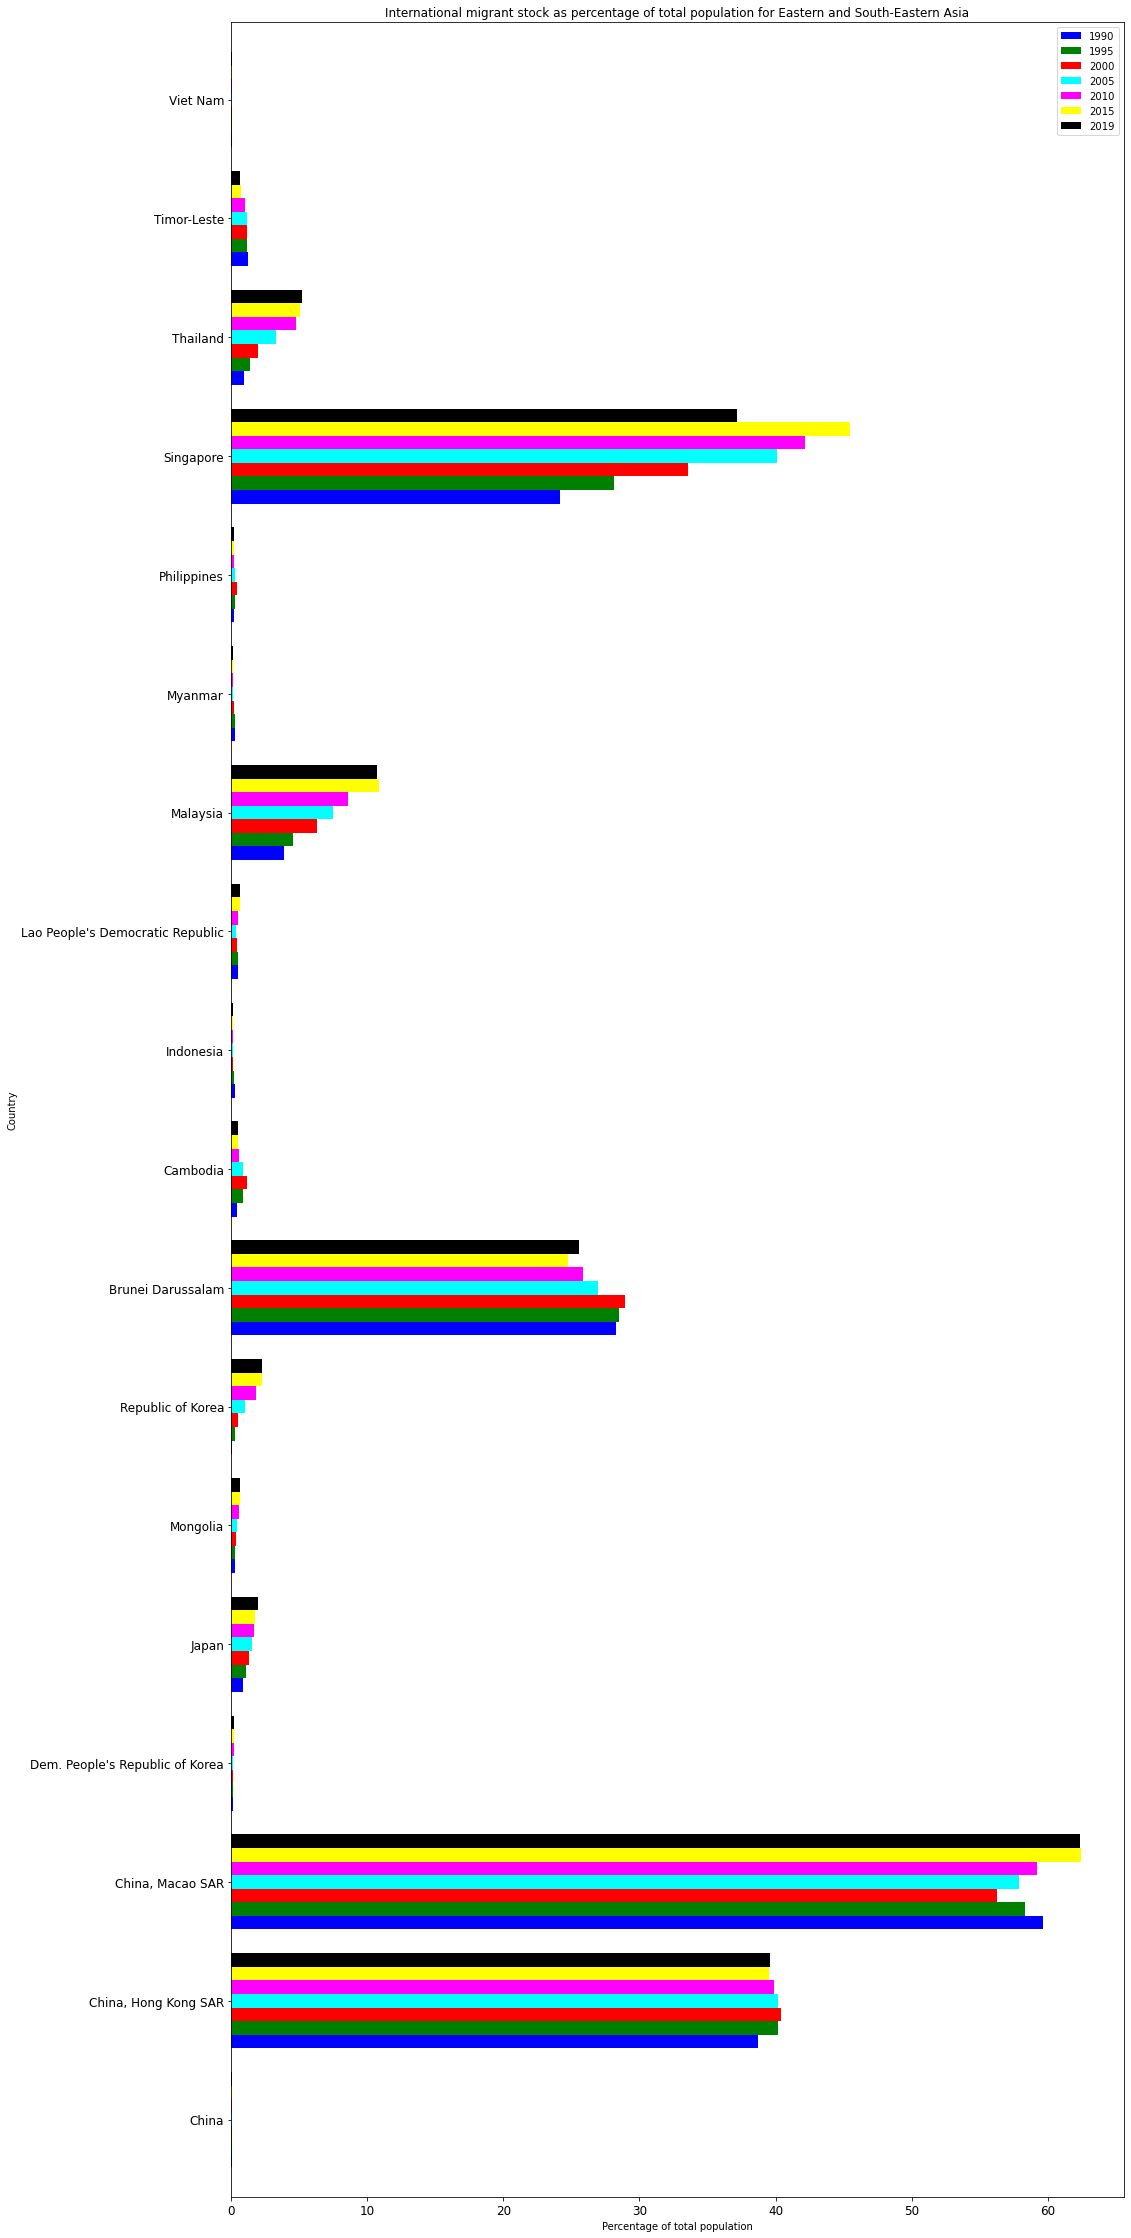

In [16]:
#Eastern and South-Eastern Asia - migrant stock as percentage of total population
countries_pct(asia_pct,'China','Viet Nam','Eastern and South-Eastern Asia')
plt.show()

In Eastern and South-Eastern Asia, the top territories with the highest migrant stock as percentage of the total population are China, Macao SAR and China, Hong Kong SAR. The country of Singapore comes in third. Viet Nam and China percentages are close to zero.

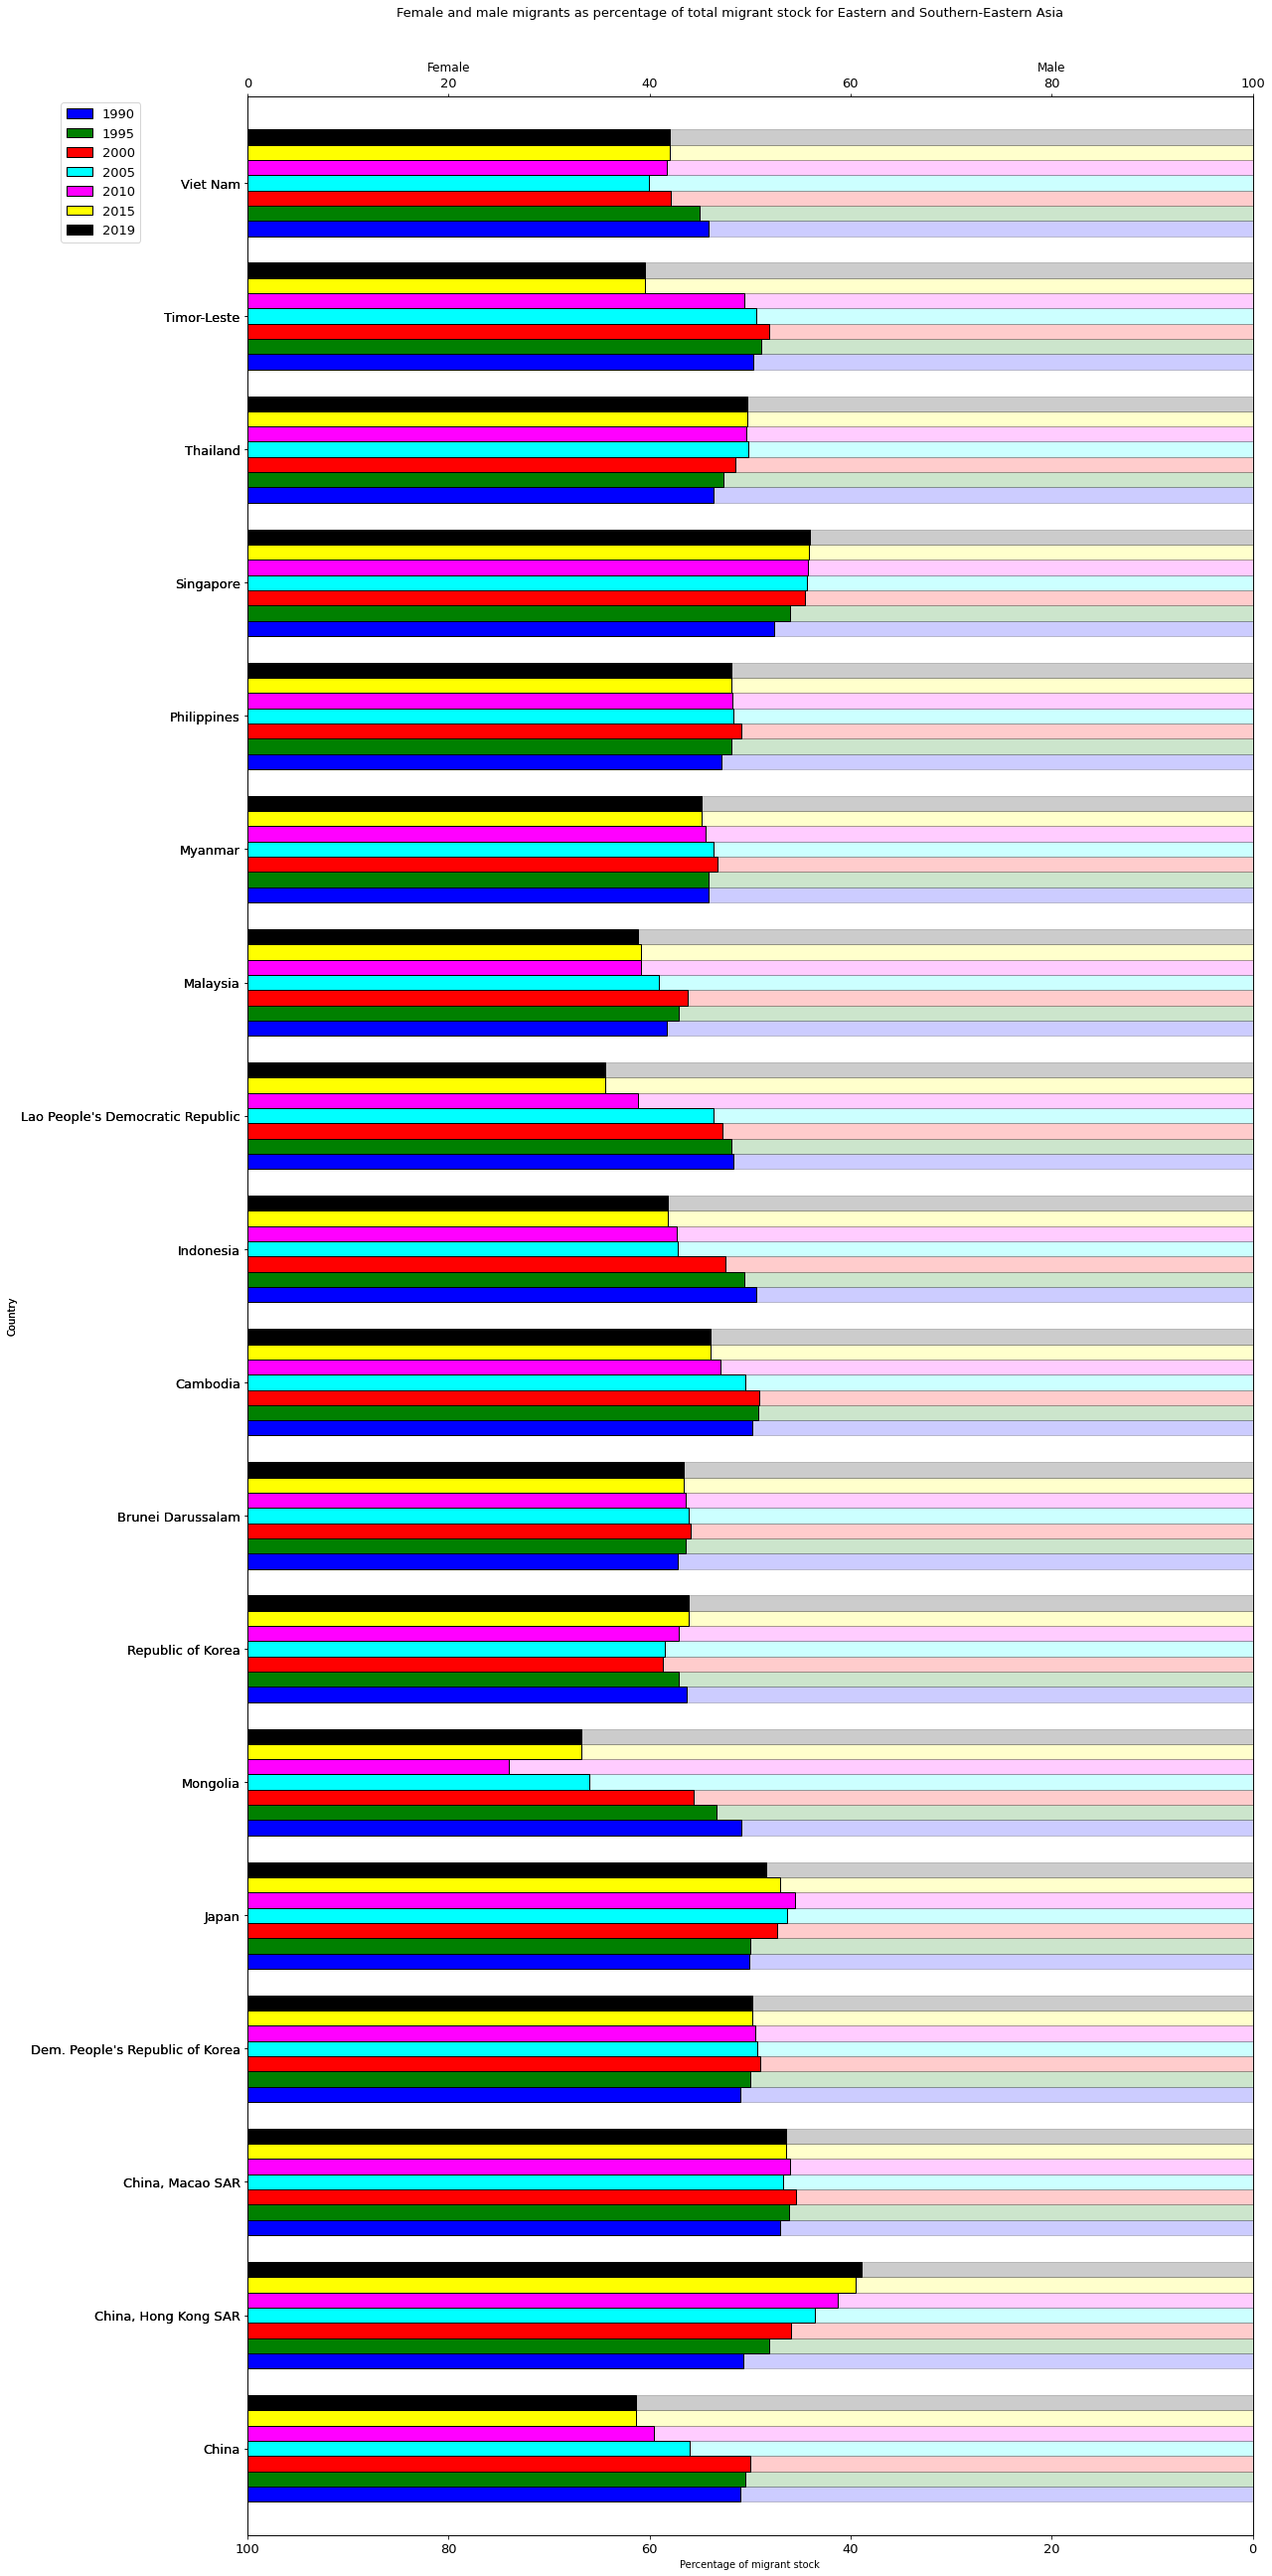

In [17]:
#comparing male and female percentages on same plot - Eastern and South-Eastern Asia
fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Eastern and Southern-Eastern Asia', fontsize=13)
fig.tight_layout()
male_final_asia.loc['China':'Viet Nam'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_asia.loc['China':'Viet Nam'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

In Mongolia and China, male migrants make up a larger percentage of the total migrant stock. The remaining countries appear evenly split, or close to evenly split.

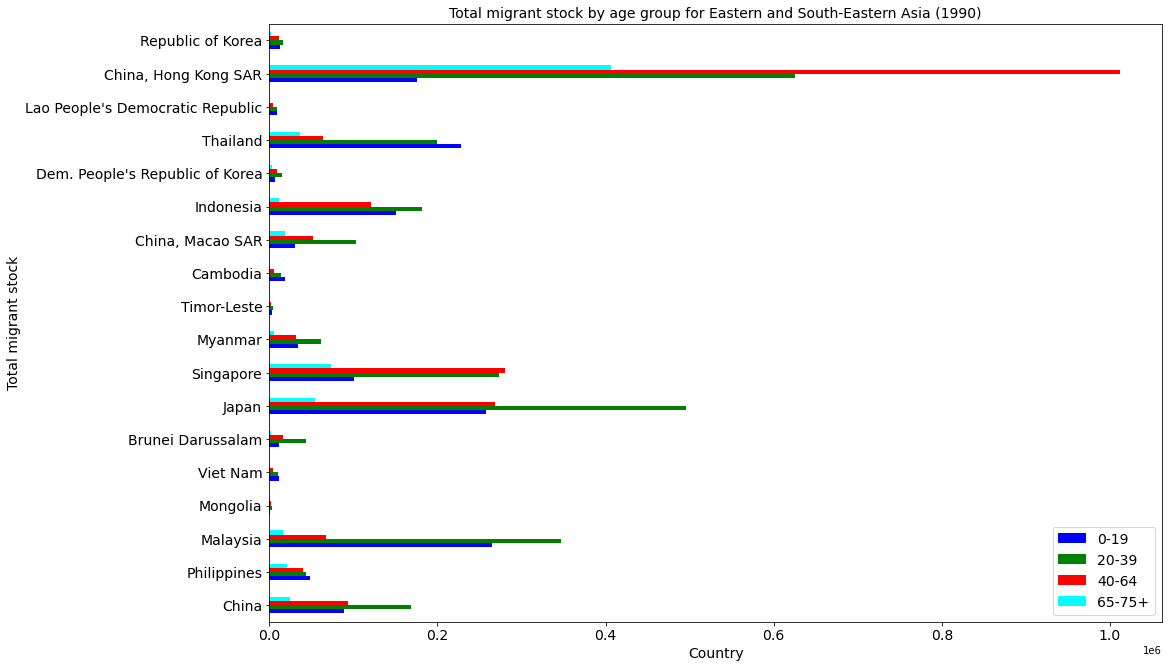

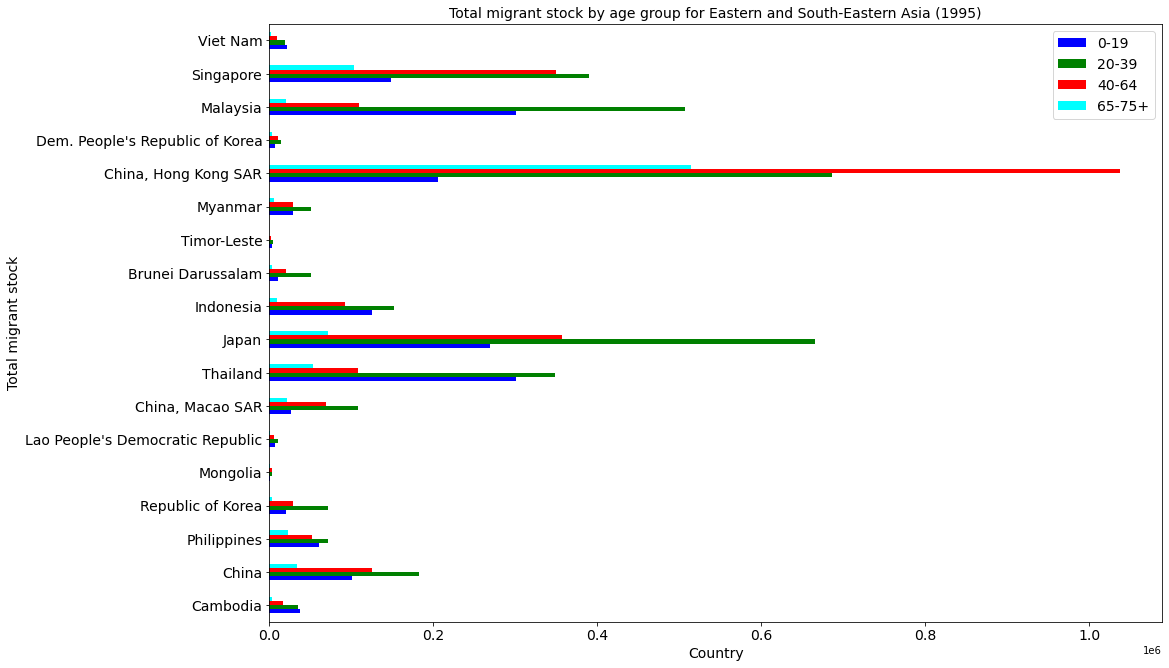

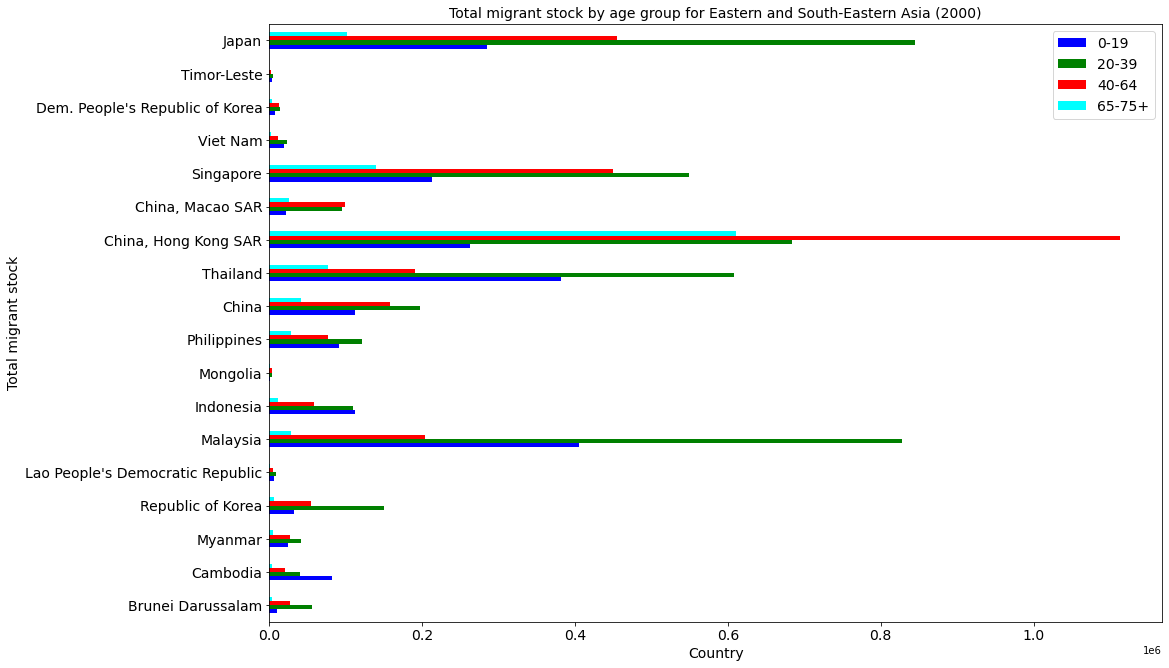

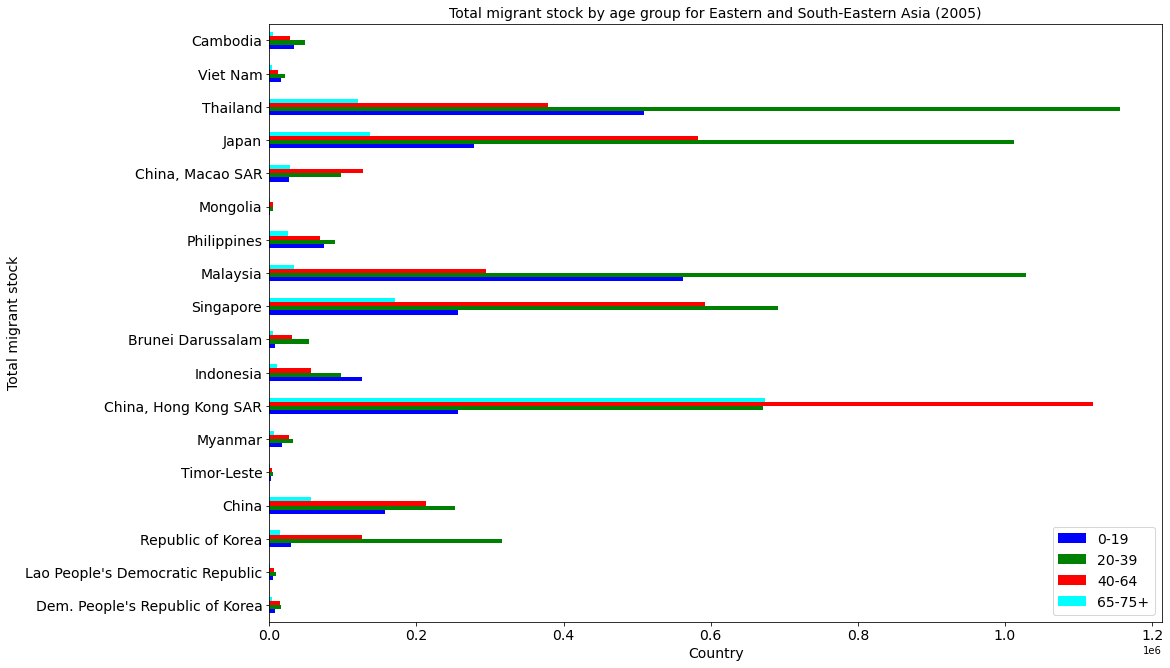

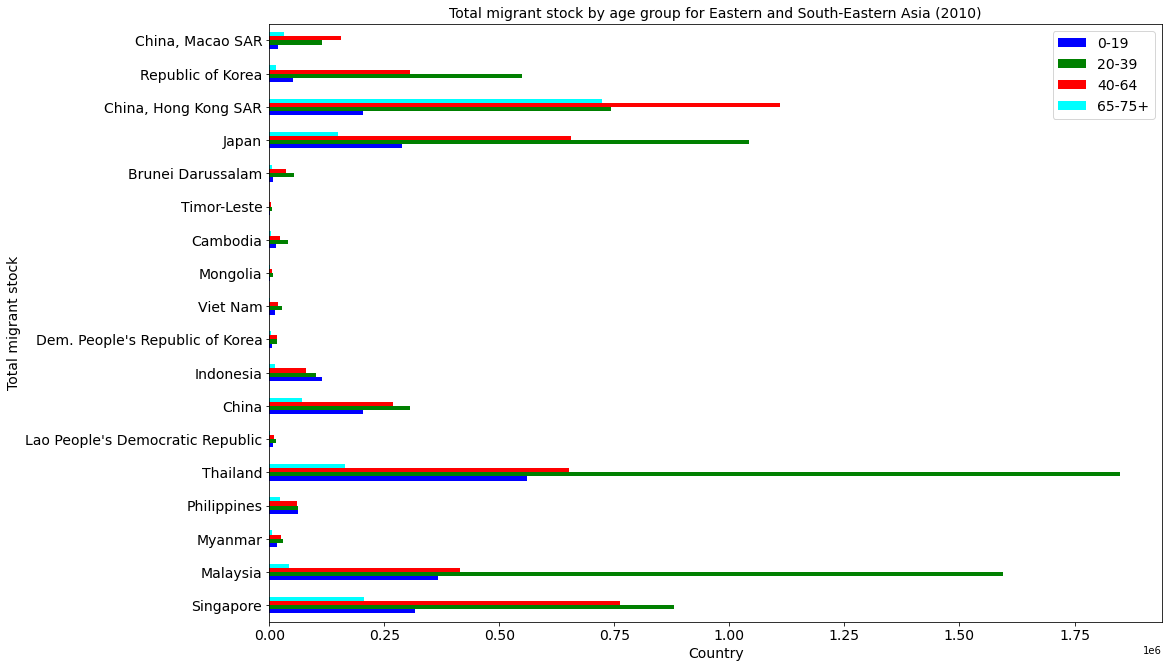

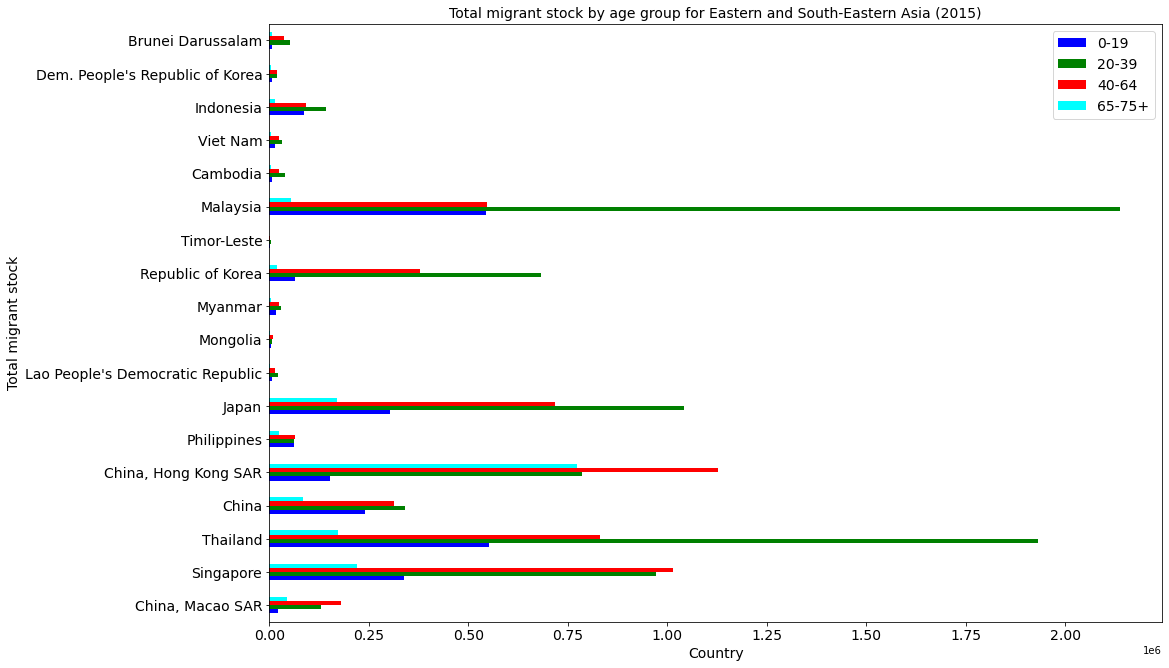

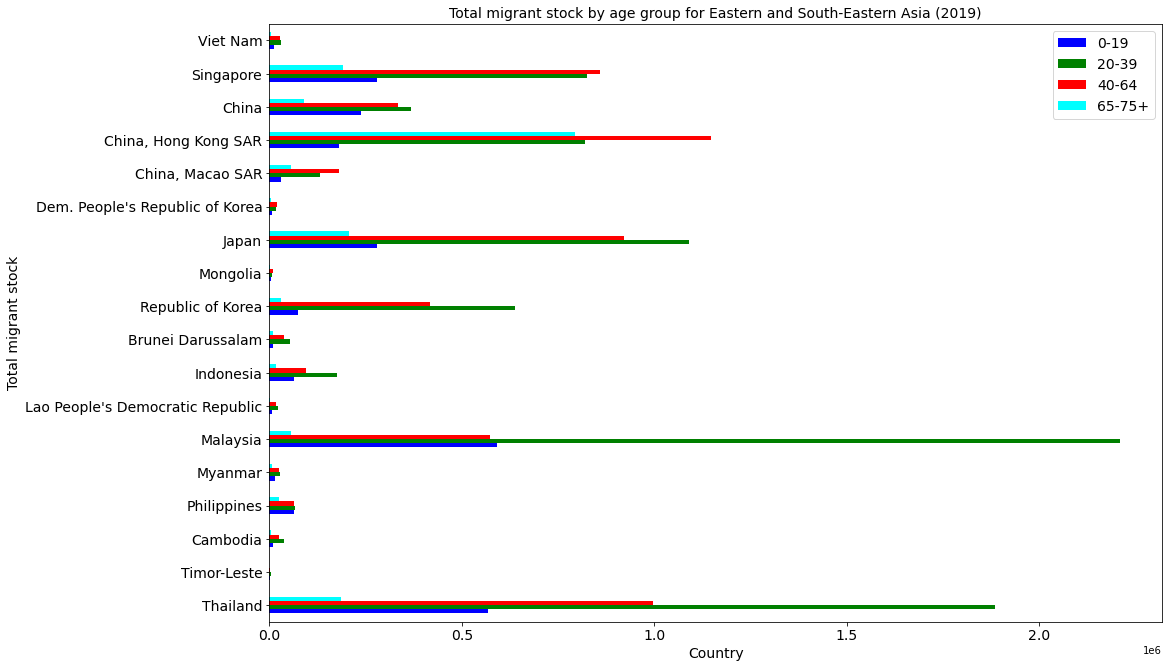

In [18]:
#eastern and south-eastern asia, comparing migrant stock (7 plots total, 1 for each year)
#subset data
eastern_south_asia=age_asia.loc[['China', 'China, Hong Kong SAR',
       'China, Macao SAR', "Dem. People's Republic of Korea", 'Japan',
       'Mongolia', 'Republic of Korea', 'Brunei Darussalam', 'Cambodia',
       'Indonesia', "Lao People's Democratic Republic", 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']]

#sort by year
eastern_south_sort = eastern_south_asia.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#eastern_south-eastern_asia_1990
eastern_south_1990 = eastern_south_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_1995
eastern_south_1995 = eastern_south_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (1995)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_2000
eastern_south_2000 = eastern_south_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_2005
eastern_south_2005 = eastern_south_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_2010
eastern_south_2010 = eastern_south_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_2015
eastern_south_2015 = eastern_south_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_south-eastern_asia_2019
eastern_south_2019 = eastern_south_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_south_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern and South-Eastern Asia (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 20-39 and 40-64 age groups make up a larger portion of the total migrant population compared to other age groups. The 20-39 group dominates especially in Thailand and Malaysia.

## 3.2 (b) Europe

In [19]:
#subset total migrant stock dataframe for only countries in Europe, drop region rows
europe_total = both_sexes_total.loc['Belarus':'Switzerland', :].drop(['Northern Europe',
                                    'Southern Europe','Western Europe'], axis=0)
#europe_total.index

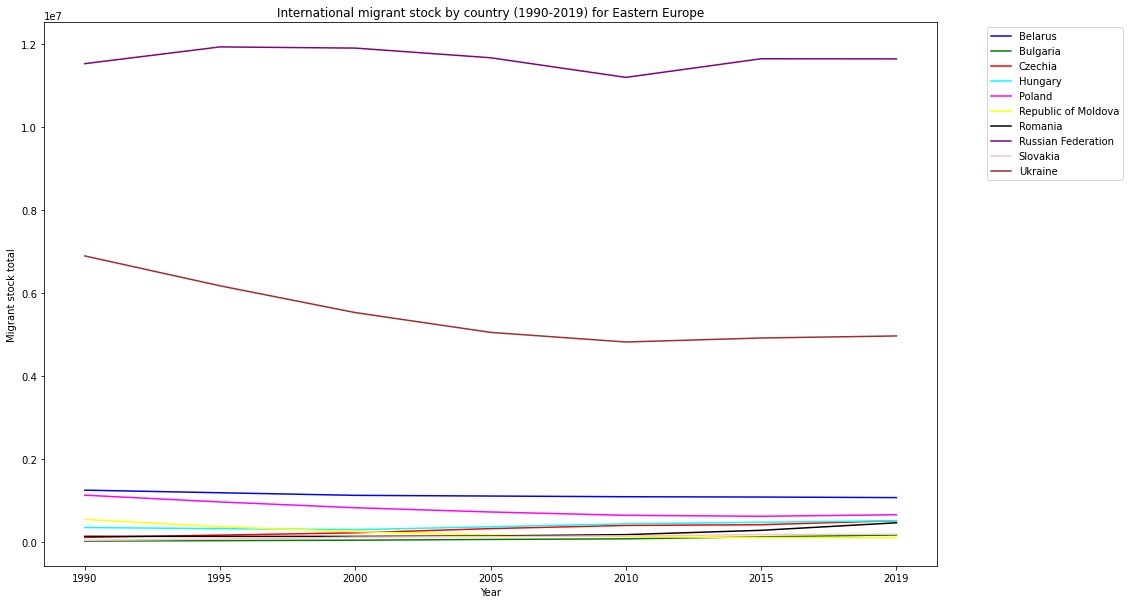

In [20]:
#Eastern Europe - total migrant stock
plot_total(europe_total,'Belarus','Ukraine','Eastern Europe')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In Eastern Europe, the migrant stock totals have remained relatively stable for almost all countries from 1990-2019. Russia has the most migrants compared to other countries in this region.

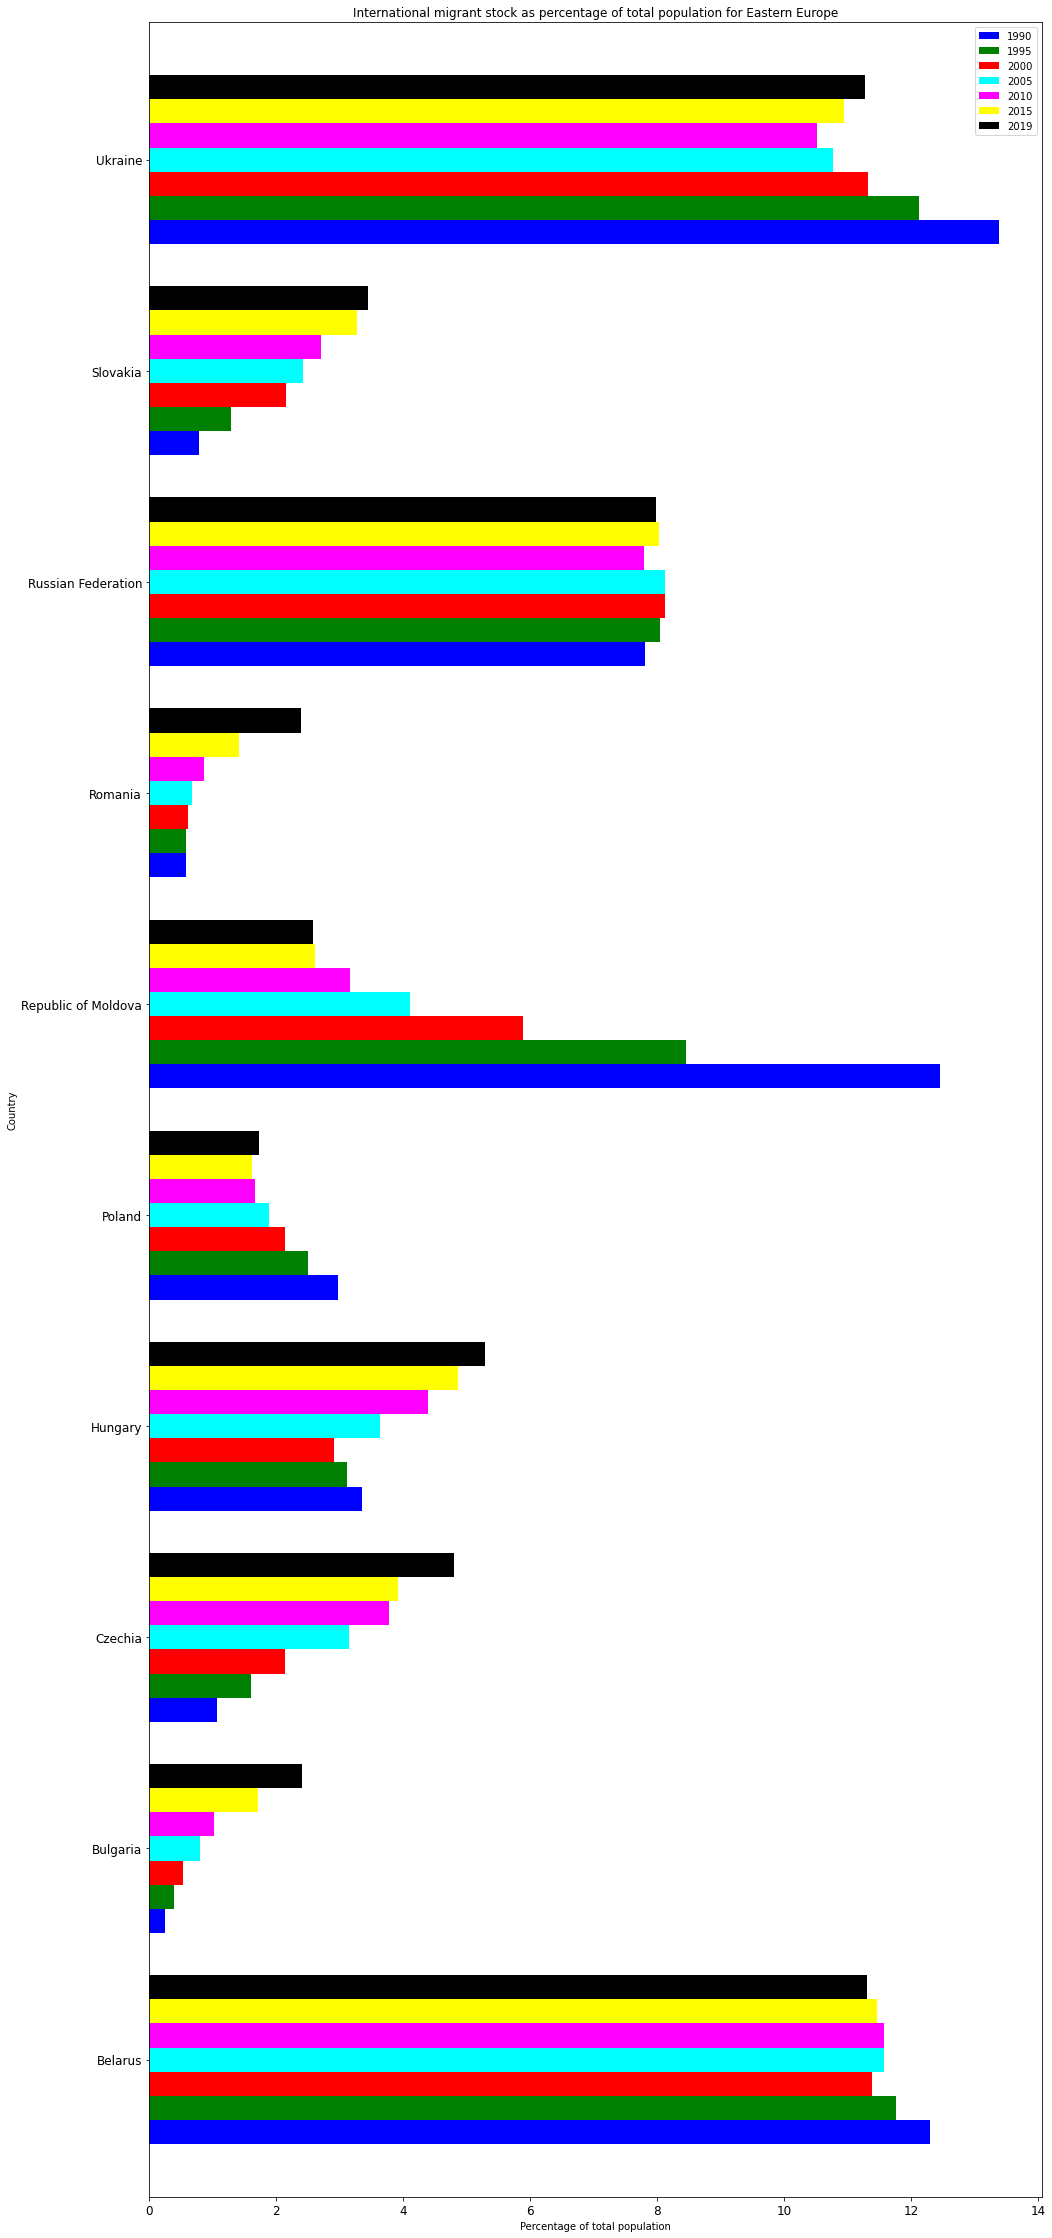

In [21]:
#comparing migrant stock as percentage of total population
europe_pct = both_sexes_stock_pct.loc['Belarus':'Switzerland', :].drop(['Northern Europe',
                                    'Southern Europe','Western Europe'], axis=0)

#Eastern Europe - migrant stock as percentage of total population
countries_pct(europe_pct,'Belarus','Ukraine','Eastern Europe')
plt.show()

In Eastern Europe, the top countries with the highest migrant stock as percentage of the total population are Belarus and Ukraine, however, percentages are between 10-14%.

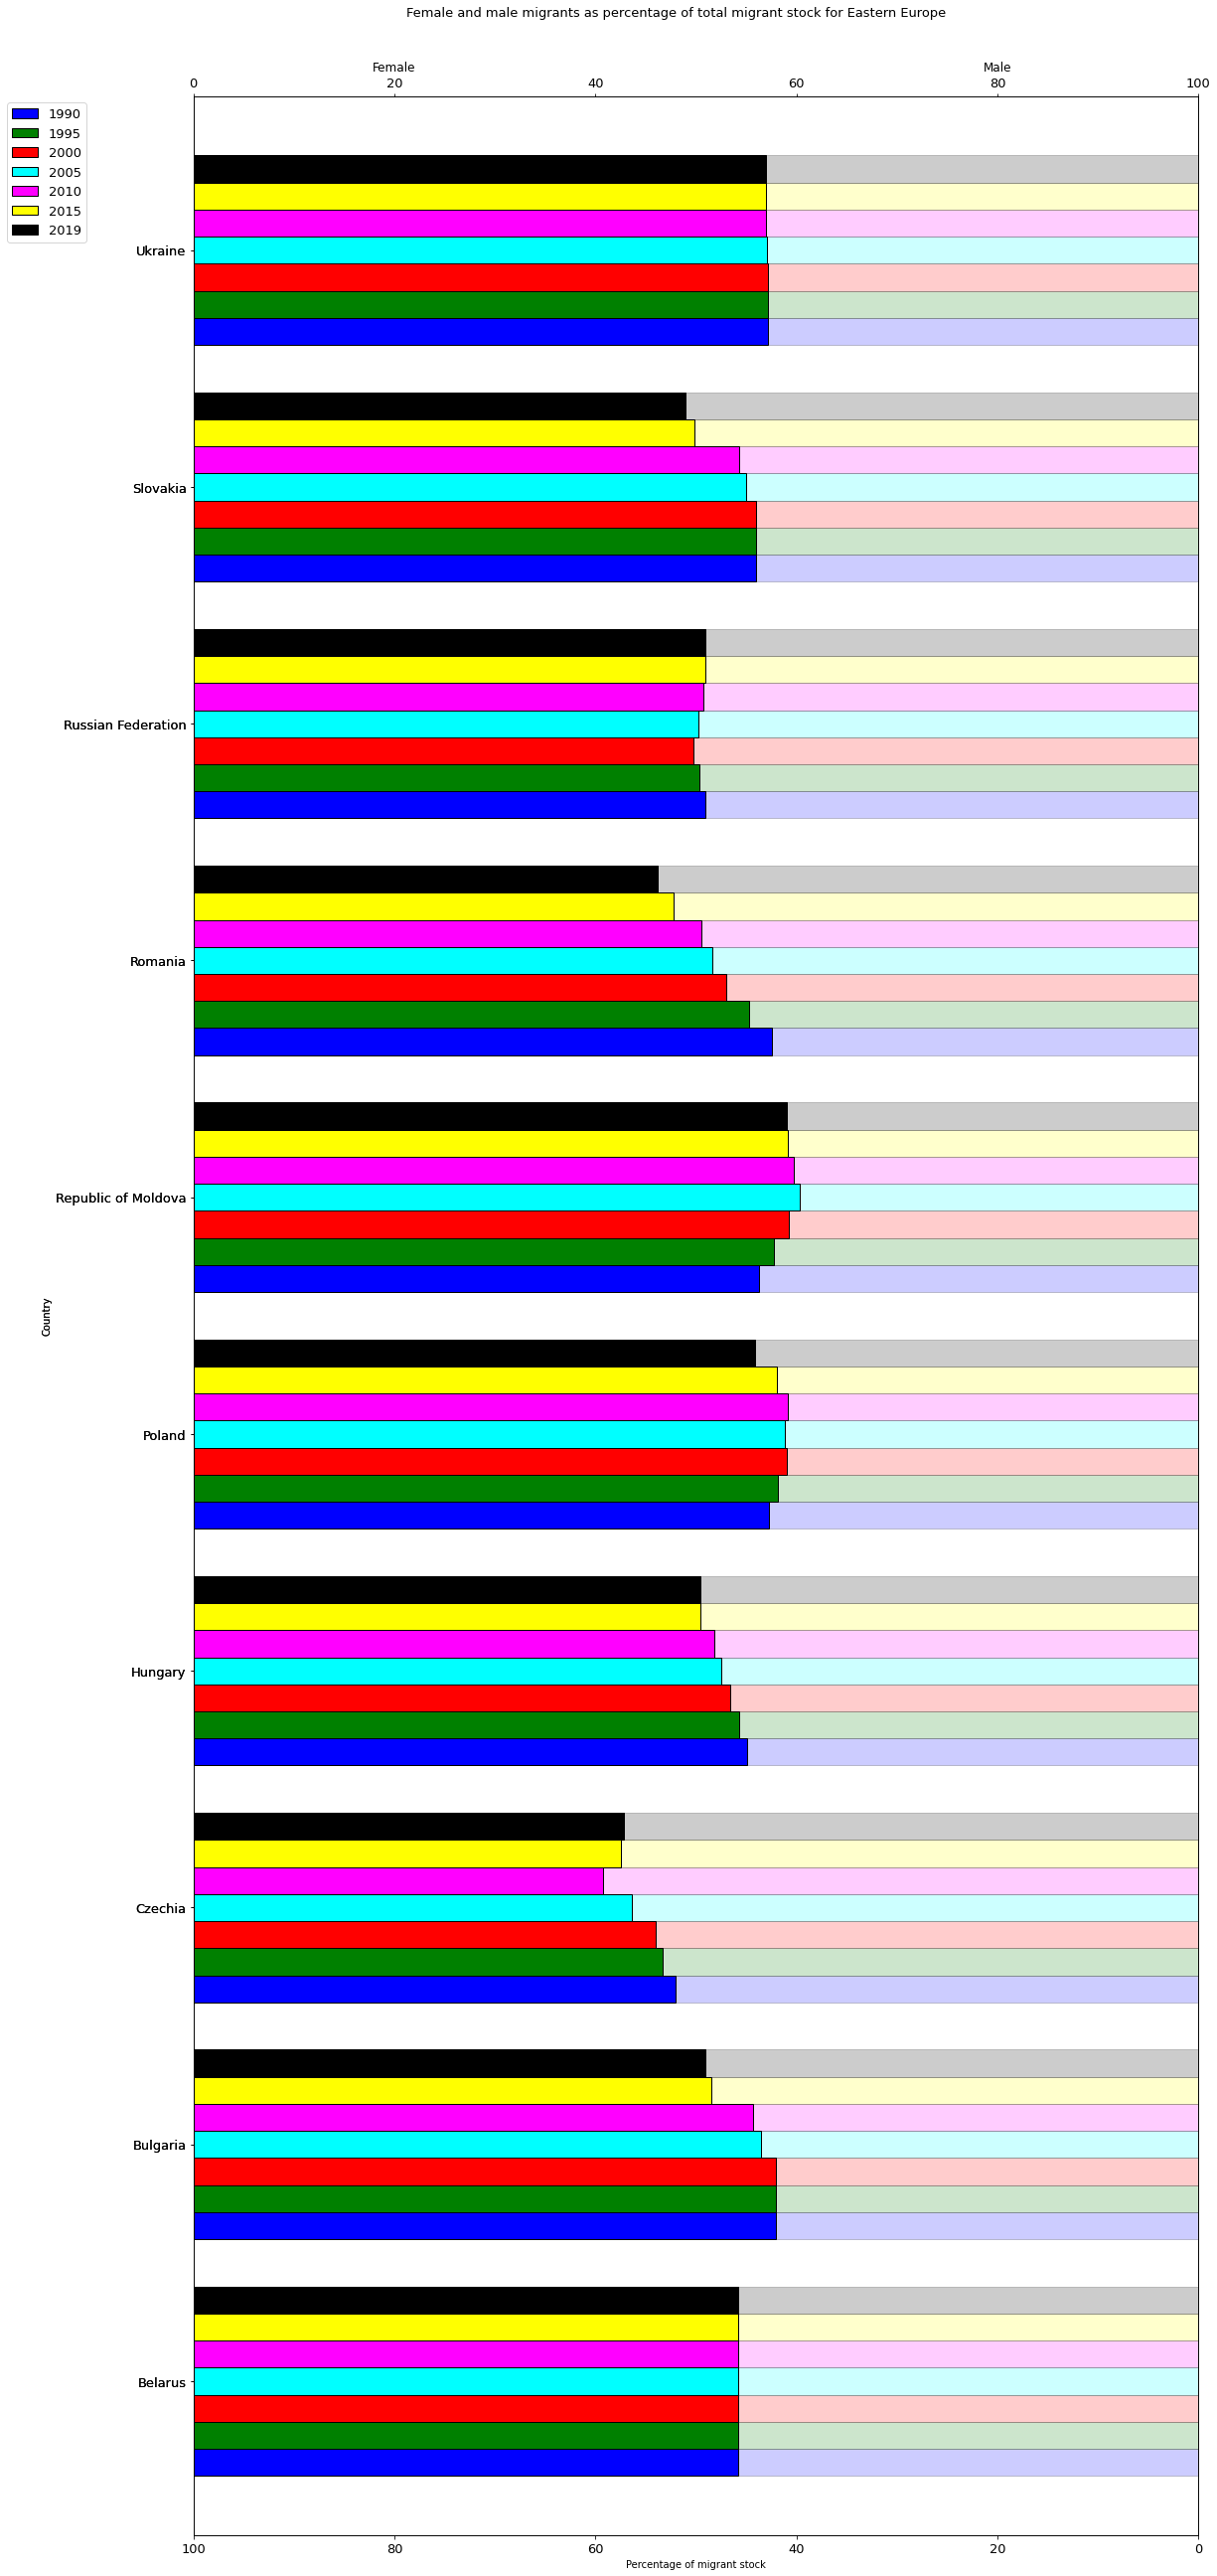

In [22]:
#subset male migrants as percentage of migrant stock dataframe for only countries in Europe, drop region rows
male_final_europe = male_percentage_final.loc['Belarus':'Switzerland', :].drop(['Northern Europe',
                                    'Southern Europe','Western Europe'], axis=0)

#subset female migrants as percentage of migrant stock dataframe for only countries in Europe, drop region rows
female_final_europe = female_percentage_final.loc['Belarus':'Switzerland', :].drop(['Northern Europe',
                                    'Southern Europe','Western Europe'], axis=0)

#comparing male and female percentages on same plot - Eastern Europe
fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Eastern Europe', fontsize=13)
fig.tight_layout()
male_final_europe.loc['Belarus':'Ukraine'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_europe.loc['Belarus':'Ukraine'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

The female and male migrants as percentage of migrant stock are evenly split in almost all countries in this region.

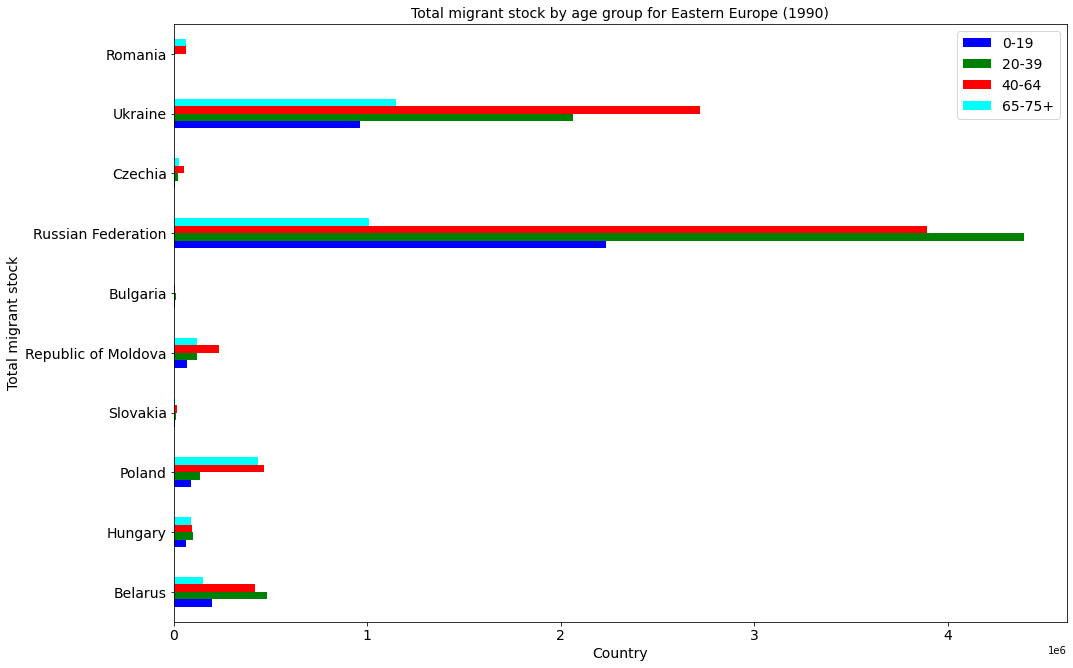

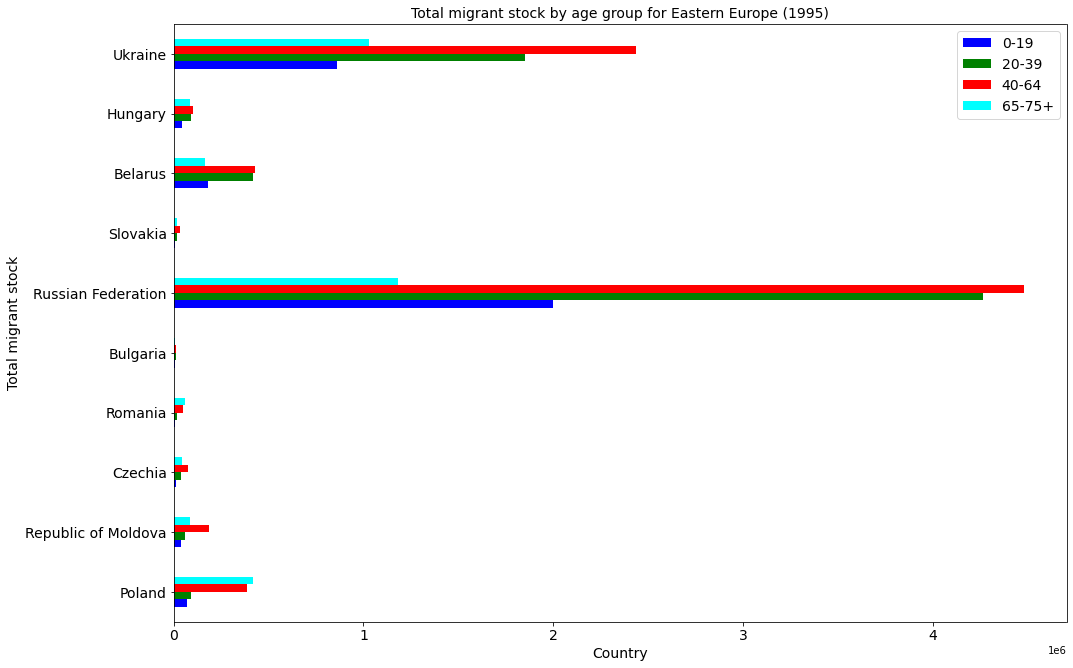

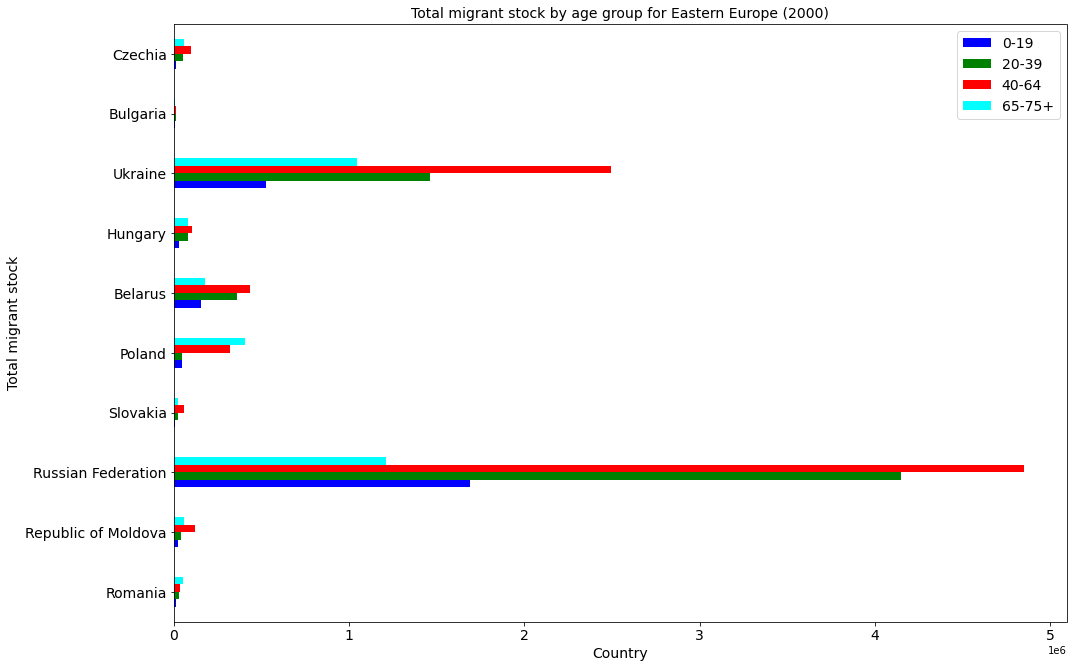

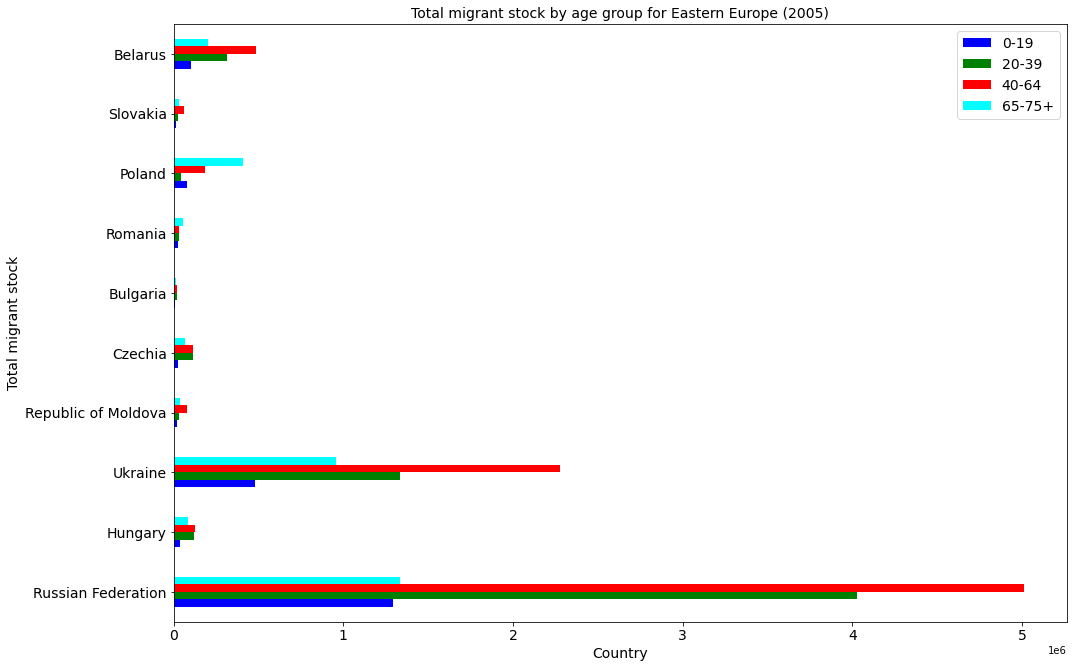

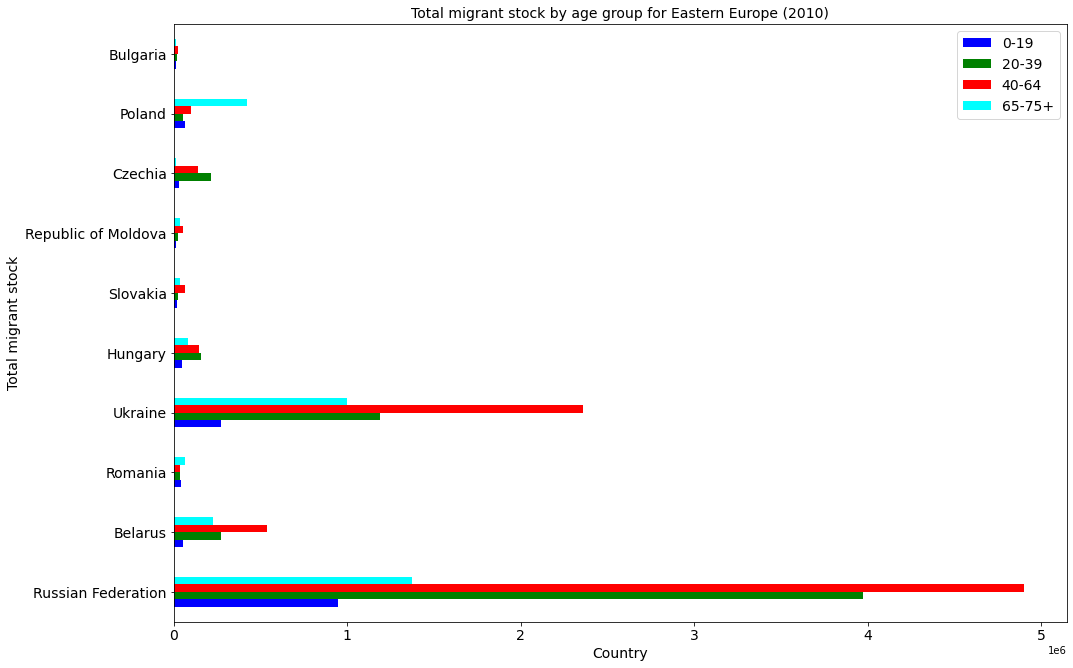

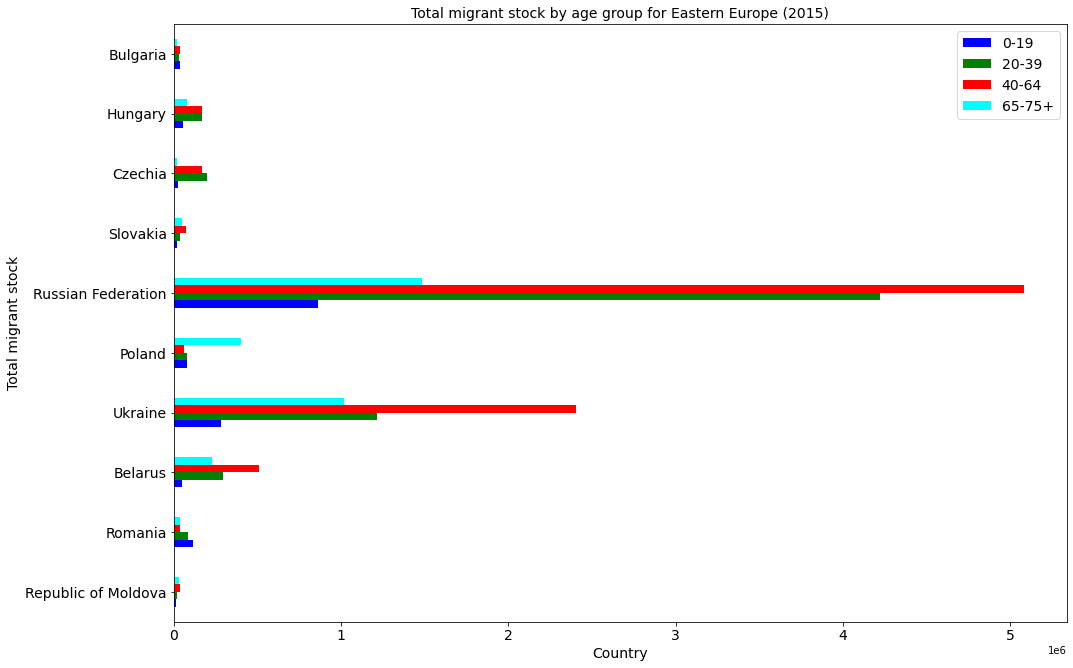

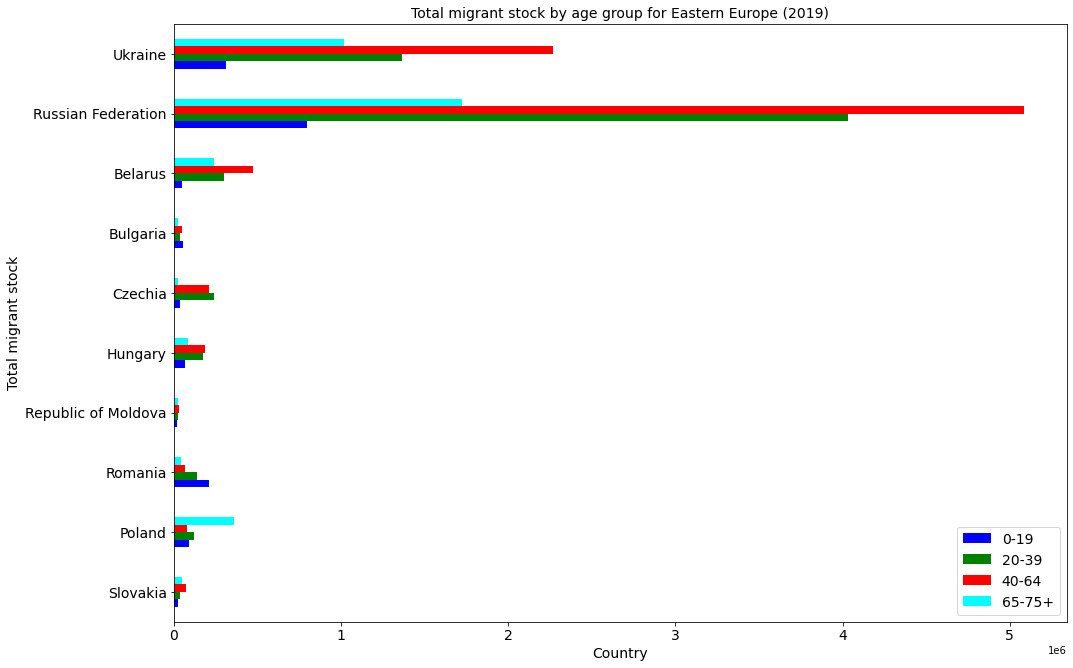

In [23]:
#eastern europe, comparing migrant stock (7 plots total, 1 for each year)

europe_countries = ['Belarus','Bulgaria','Czechia','Hungary','Poland','Republic of Moldova','Romania','Russian Federation',
        'Slovakia', 'Ukraine', 'Channel Islands', 'Denmark','Estonia','Faroe Islands','Finland',
        'Iceland','Ireland','Isle of Man','Latvia','Lithuania','Norway','Sweden','United Kingdom','Albania',
         'Andorra','Bosnia and Herzegovina','Croatia', 'Gibraltar','Greece','Italy',
        'Malta','North Macedonia','Portugal','San Marino','Serbia','Slovenia','Spain','Austria','Belgium','France',
         'Germany','Liechtenstein','Luxembourg','Monaco','Netherlands','Switzerland']

age_europe = sorted_countries.loc[europe_countries, :]

eastern_europe = age_europe.loc[['Belarus', 'Bulgaria', 'Czechia', 'Hungary', 'Poland', 
                                'Republic of Moldova', 'Romania', 'Russian Federation', 'Slovakia',
                                'Ukraine']]

#sort by year
eastern_europe_sort = eastern_europe.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#eastern_europe_1990
eastern_europe_1990 = eastern_europe_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_1995
eastern_europe_1995 = eastern_europe_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (1995)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_2000
eastern_europe_2000 = eastern_europe_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_2005
eastern_europe_2005 = eastern_europe_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_2010
eastern_europe_2010 = eastern_europe_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_2015
eastern_europe_2015 = eastern_europe_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#eastern_europe_2019
eastern_europe_2019 = eastern_europe_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
eastern_europe_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Eastern Europe (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 40-64 age group make up a larger portion of the total migrant population compared to other age groups, particulary in Russia.

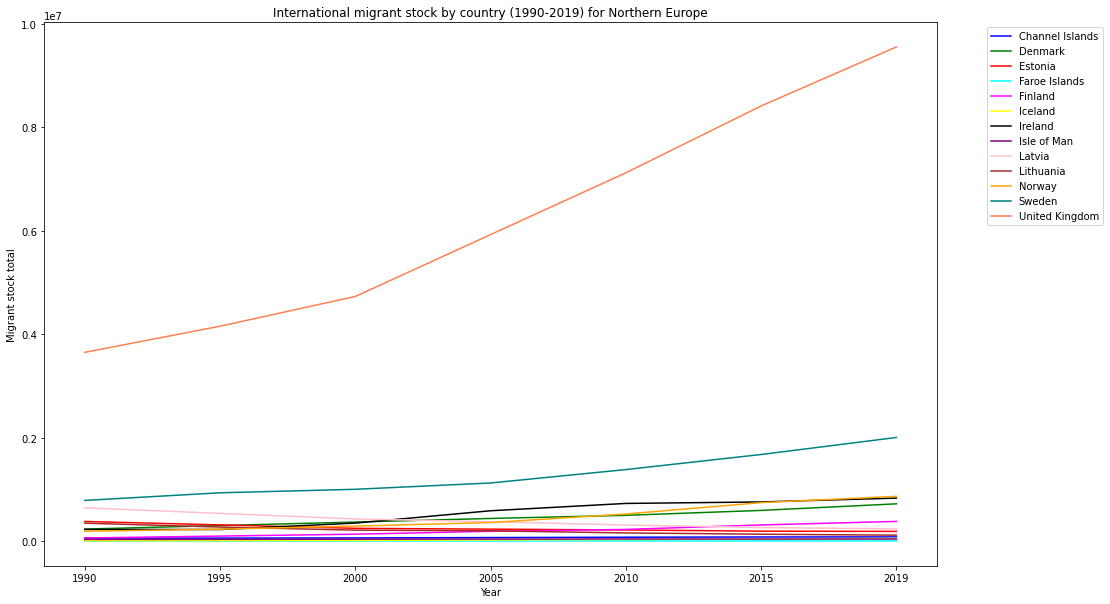

In [24]:
#Northern Europe - total migrant stock
plot_total(europe_total,'Channel Islands','United Kingdom','Northern Europe')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In Northern Europe, the migrant stock totals have remained relatively stable for most countries from 1990-2019, except for the United Kingdom. The migrant stock total in the United Kingdom has been increasing since 2000.

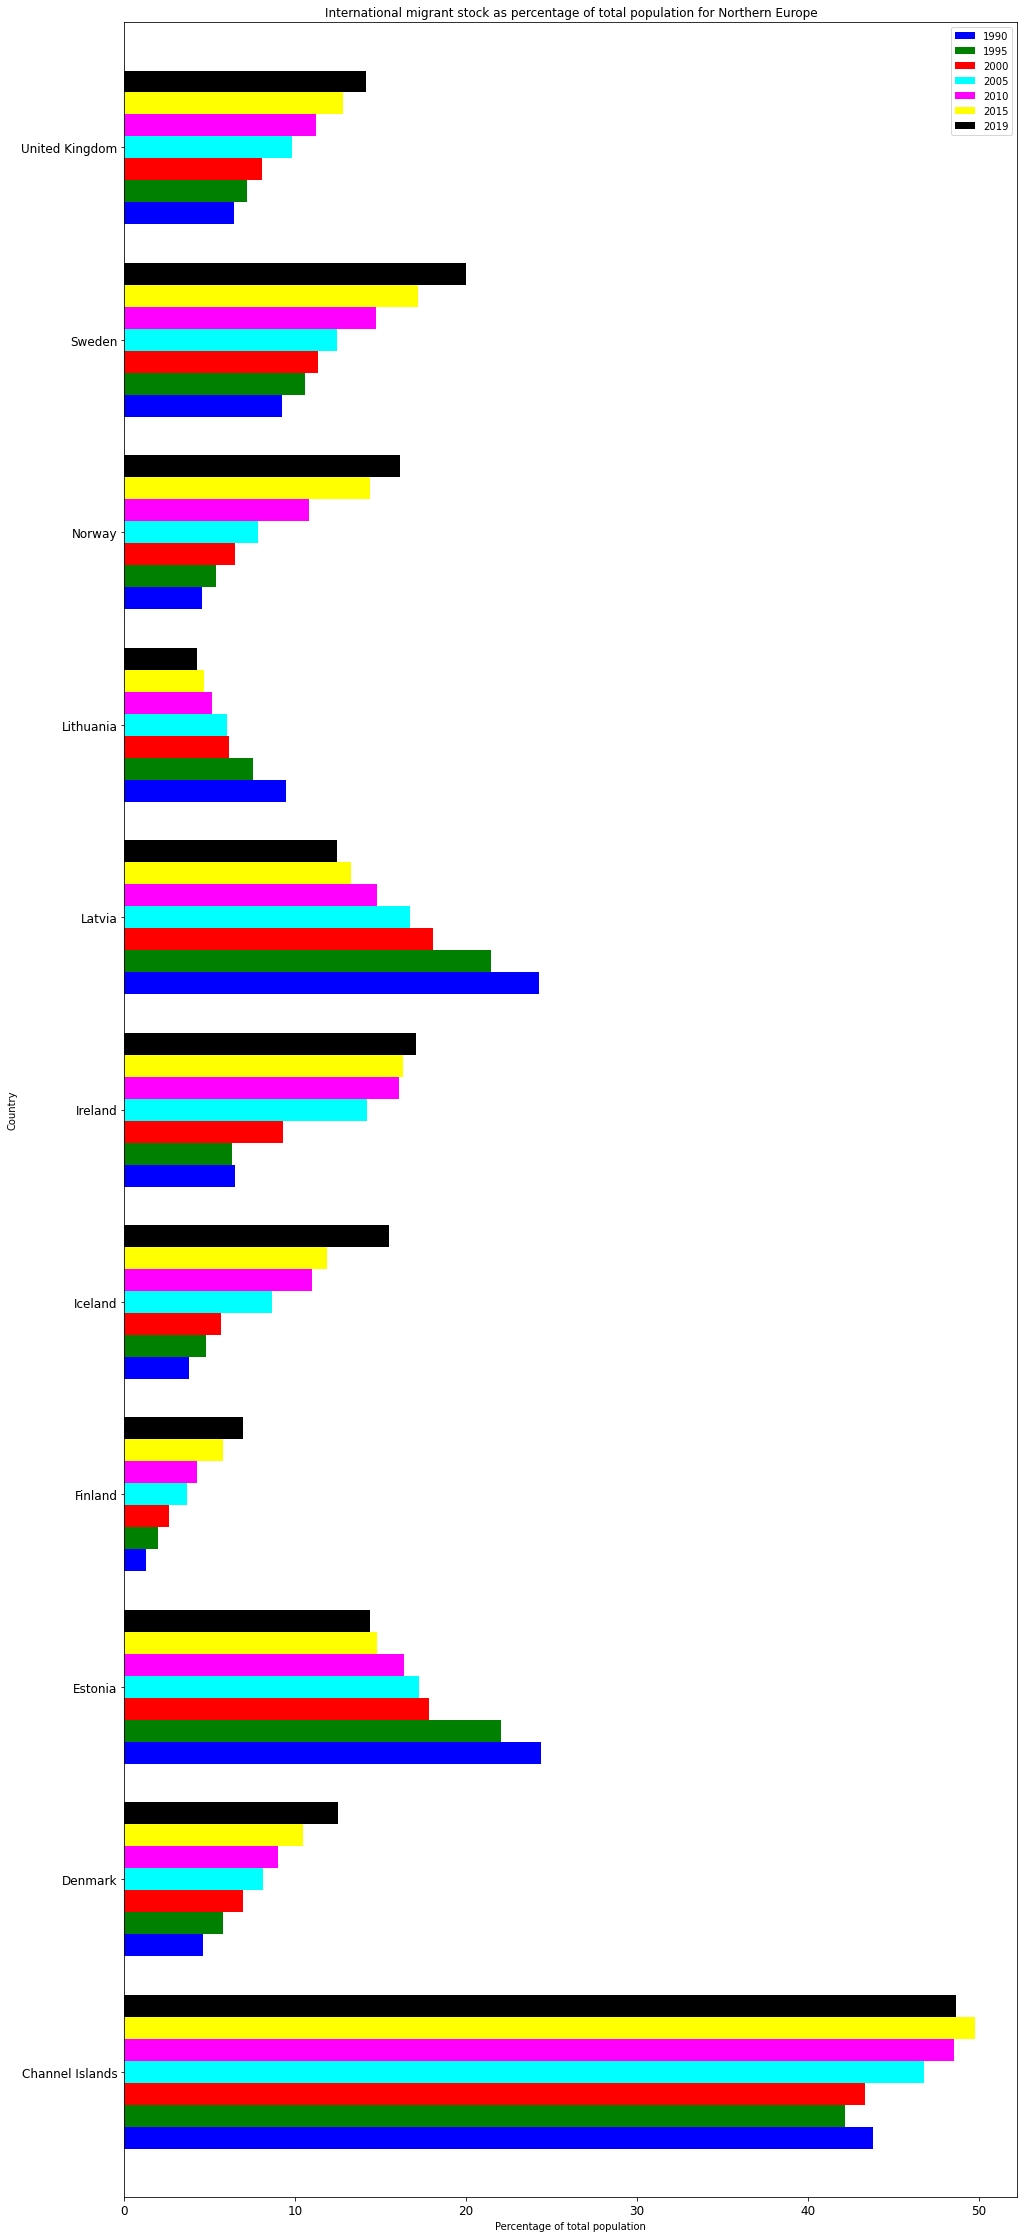

In [25]:
#Northern Europe - migrant stock as percentage of total population
countries_pct(europe_pct,'Channel Islands','United Kingdom','Northern Europe')
plt.show()

In Northern Europe, the migrant total as percentage of the total population in the Channel Islands has been between 40-50% from 1990-2019. The other countries are well below that range.

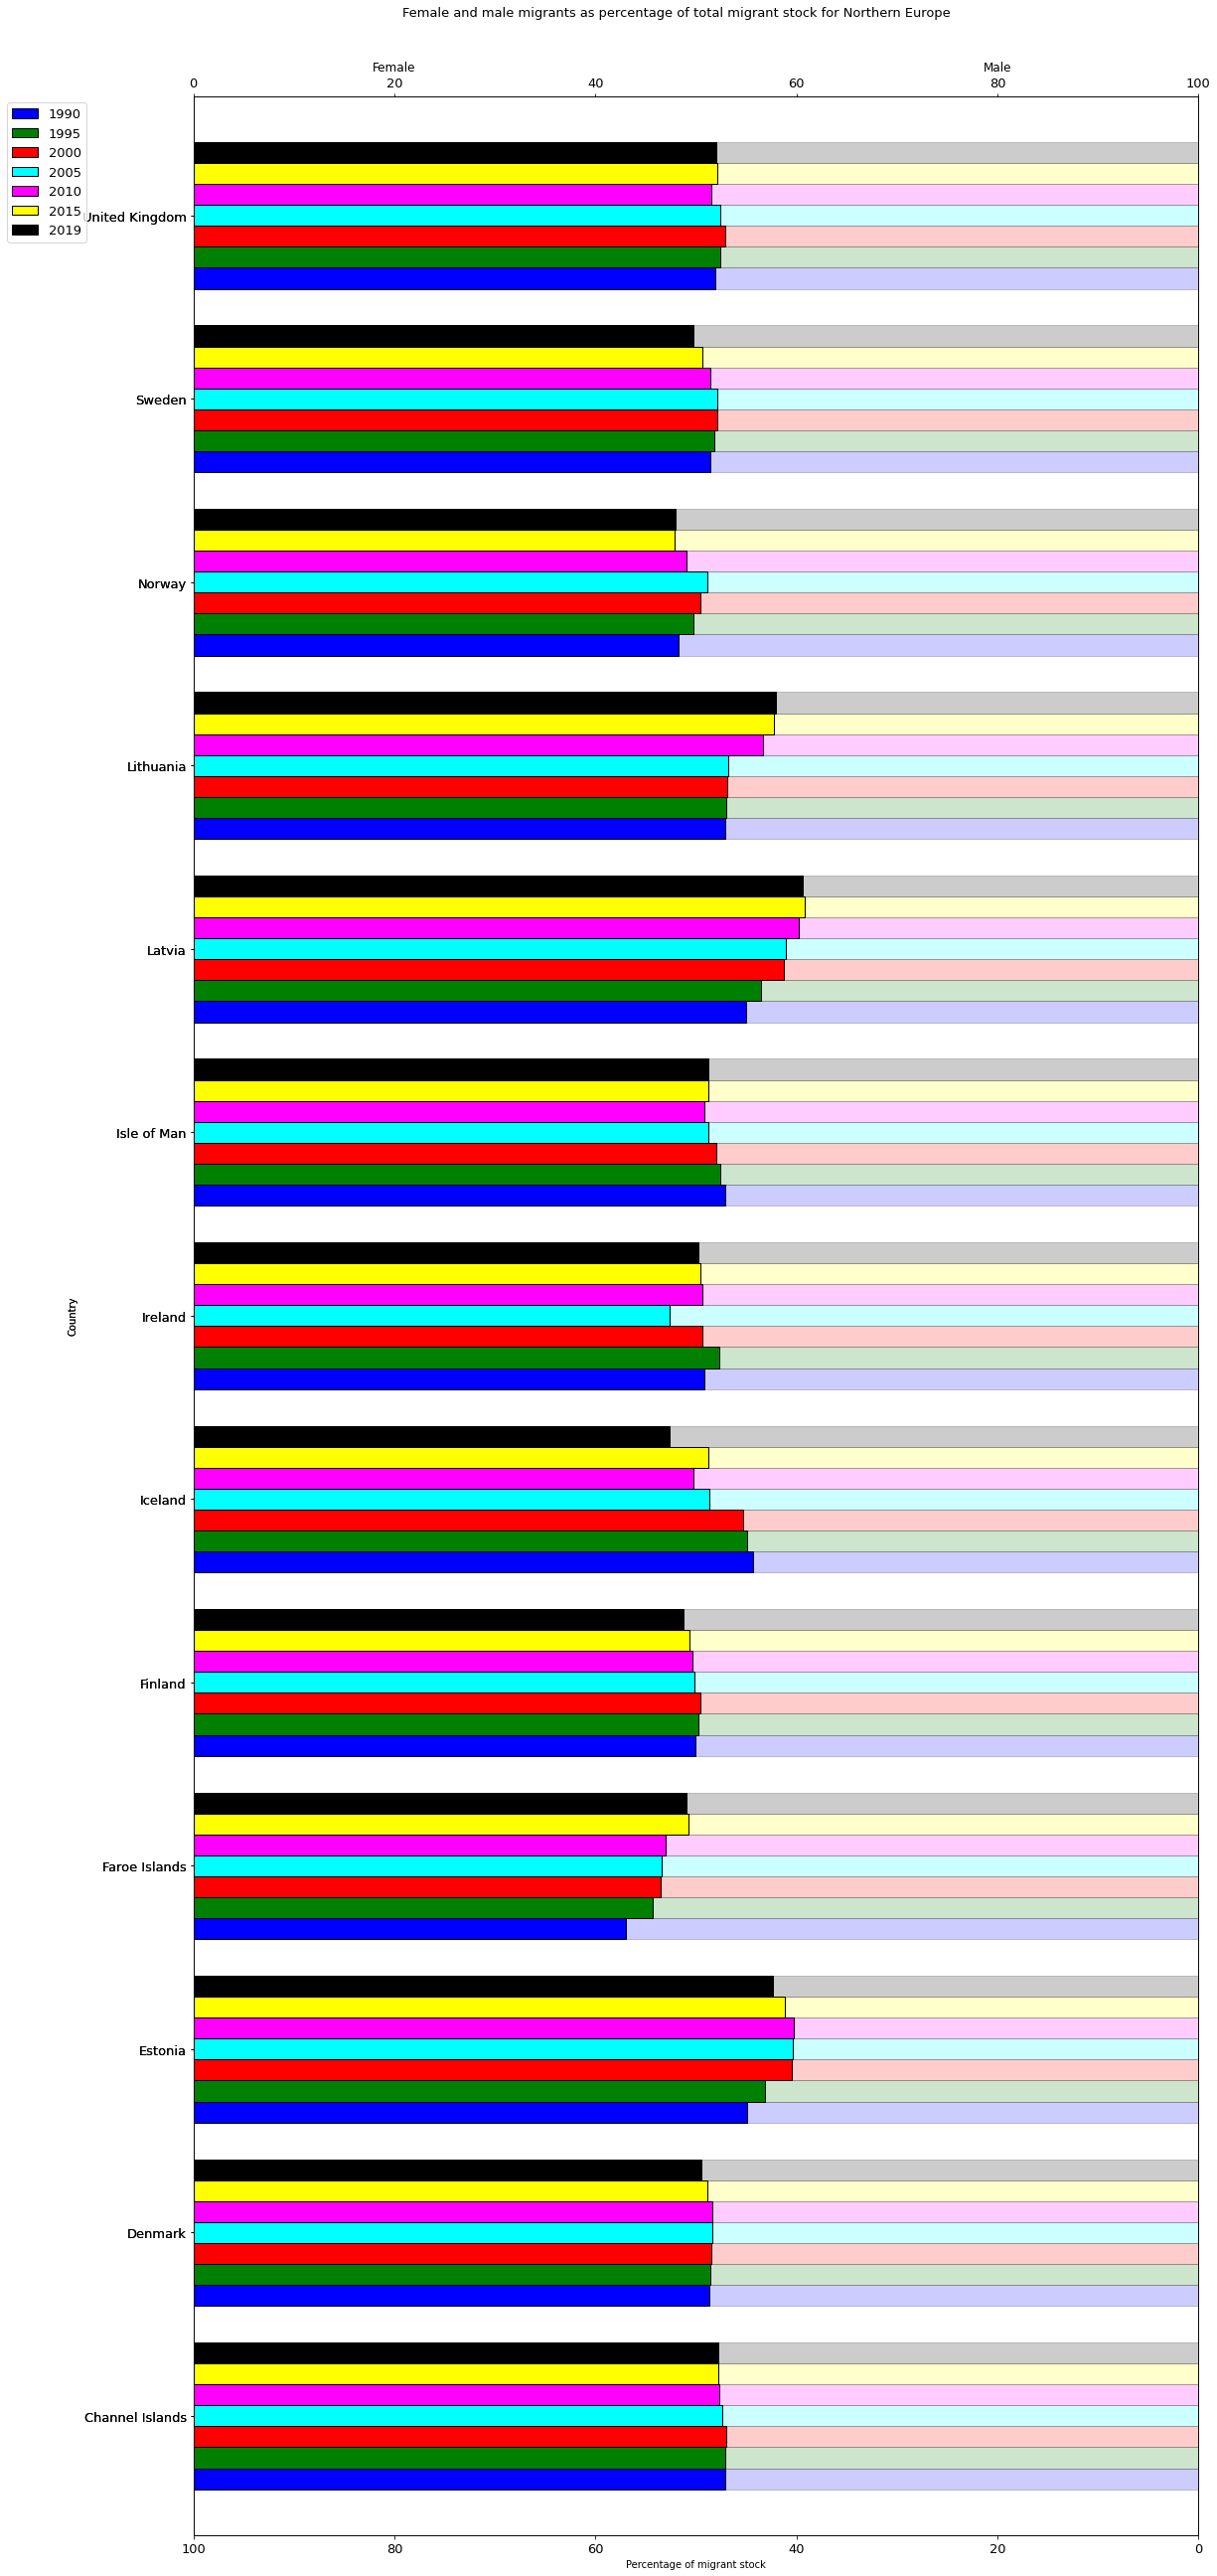

In [26]:
#comparing male and female percentages on same plot - Northern Europe
fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Northern Europe', fontsize=13)
fig.tight_layout()
male_final_europe.loc['Channel Islands':'United Kingdom'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_europe.loc['Channel Islands':'United Kingdom'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

The female and male migrants as percentage of migrant stock are evenly split in almost all countries in this region as well.

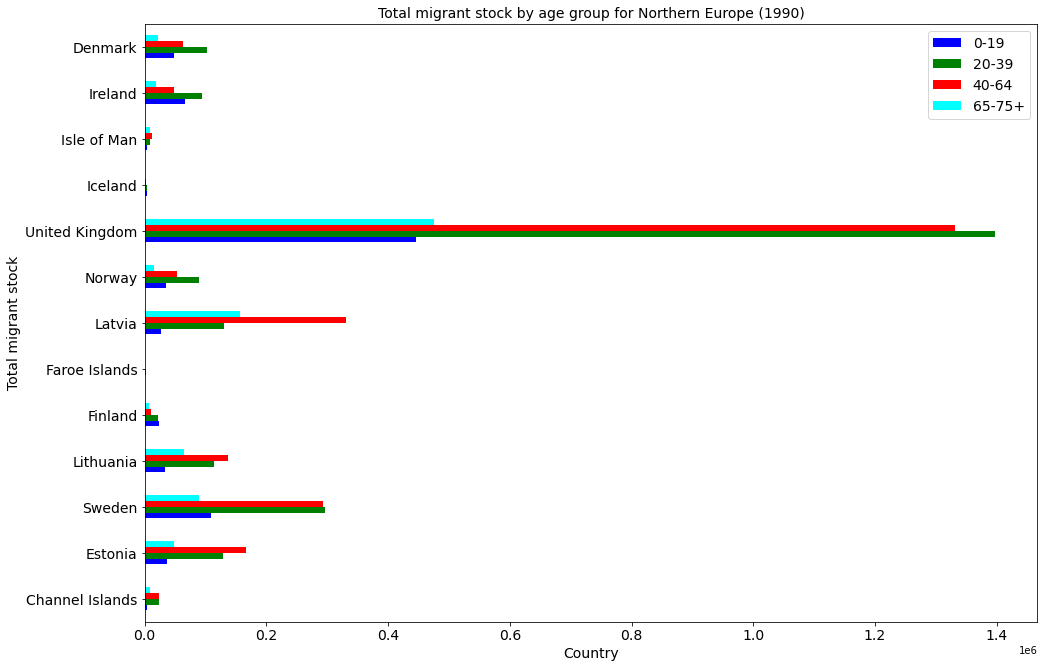

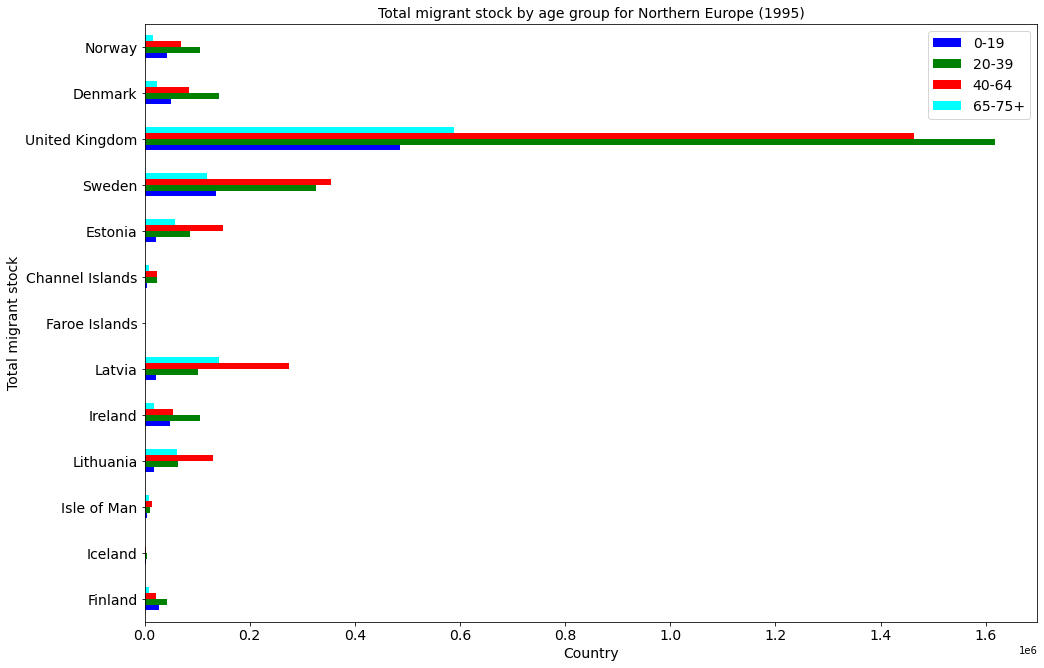

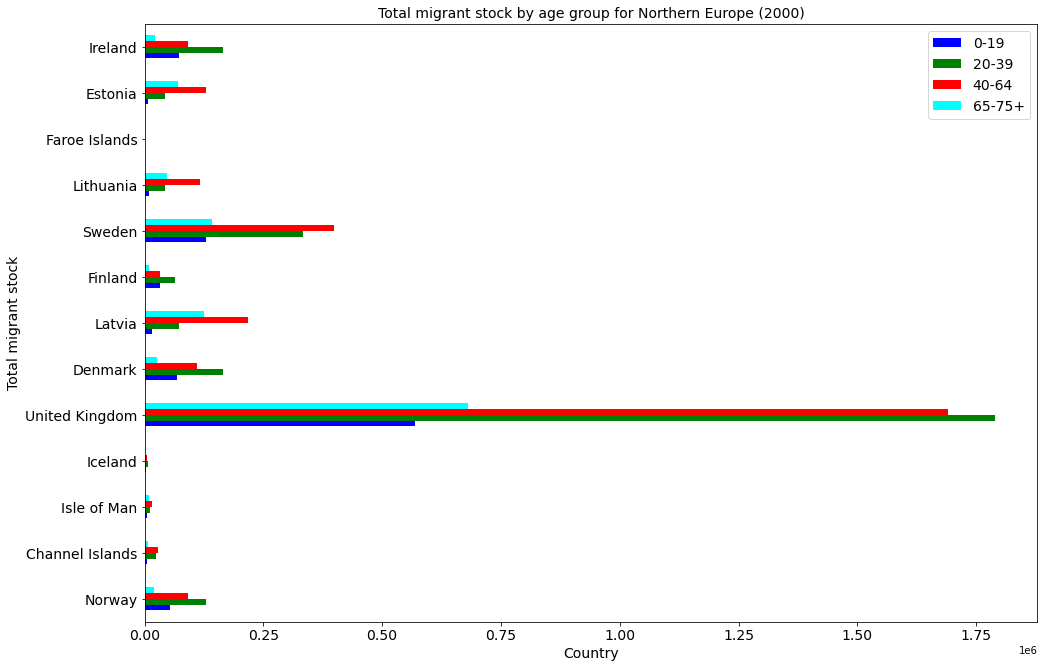

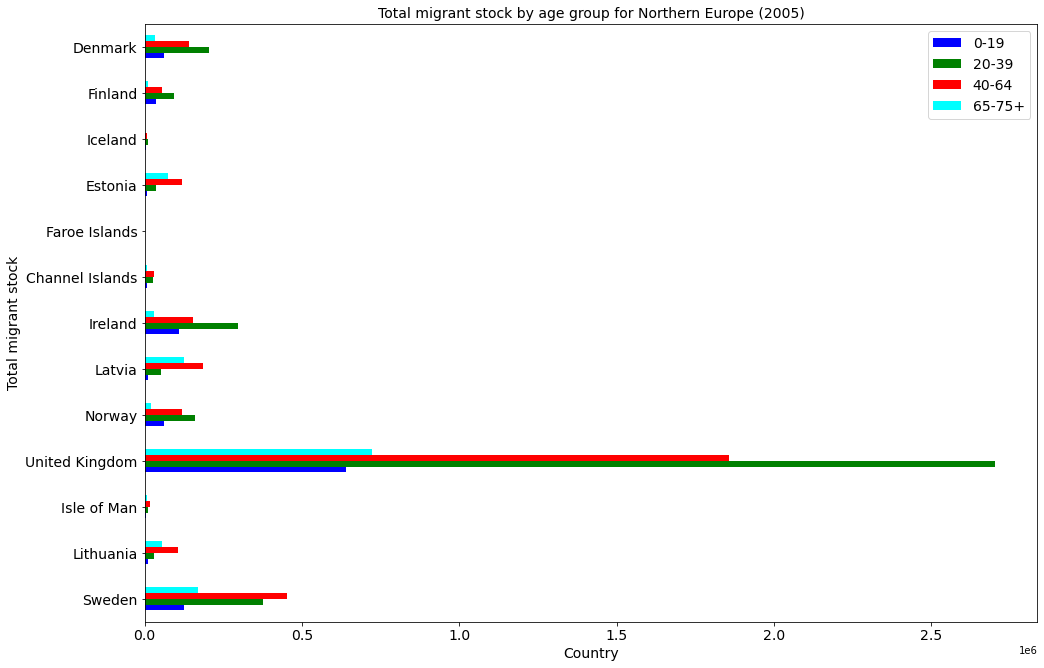

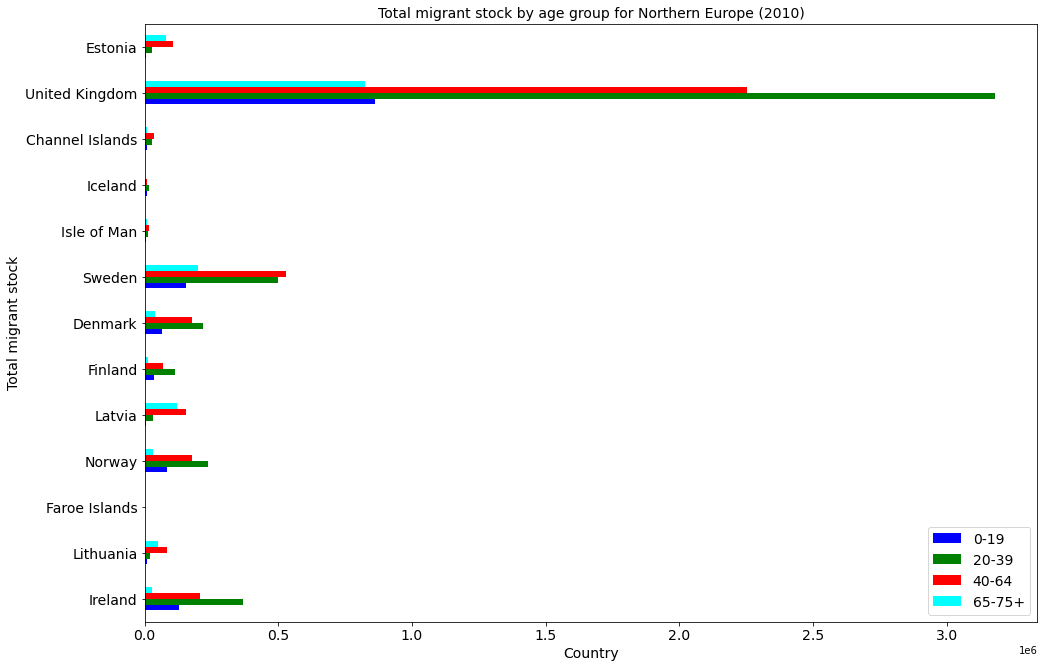

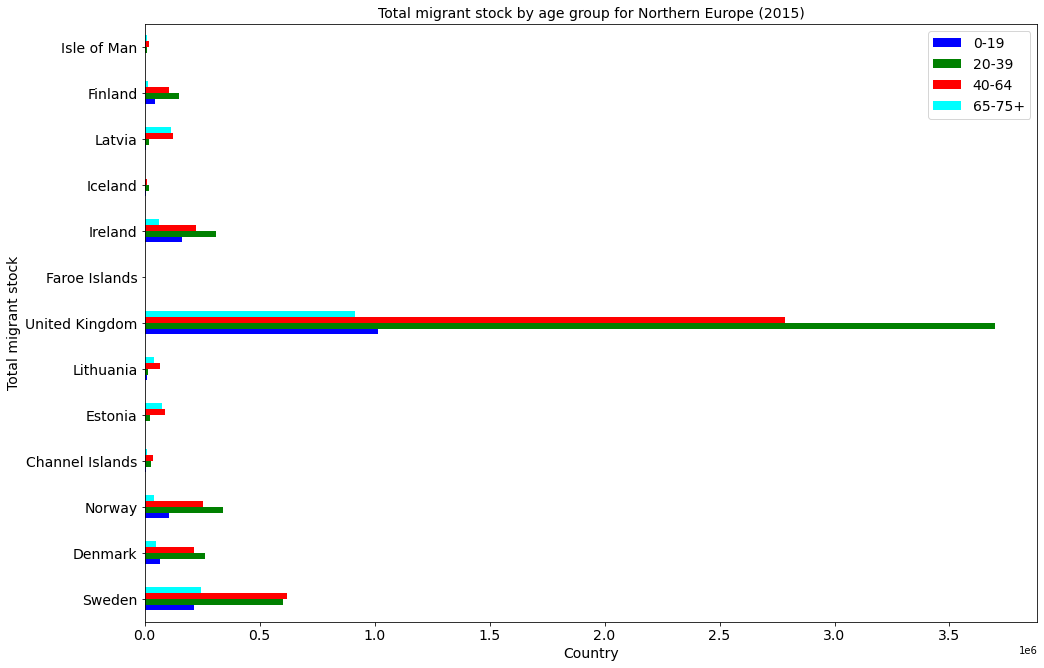

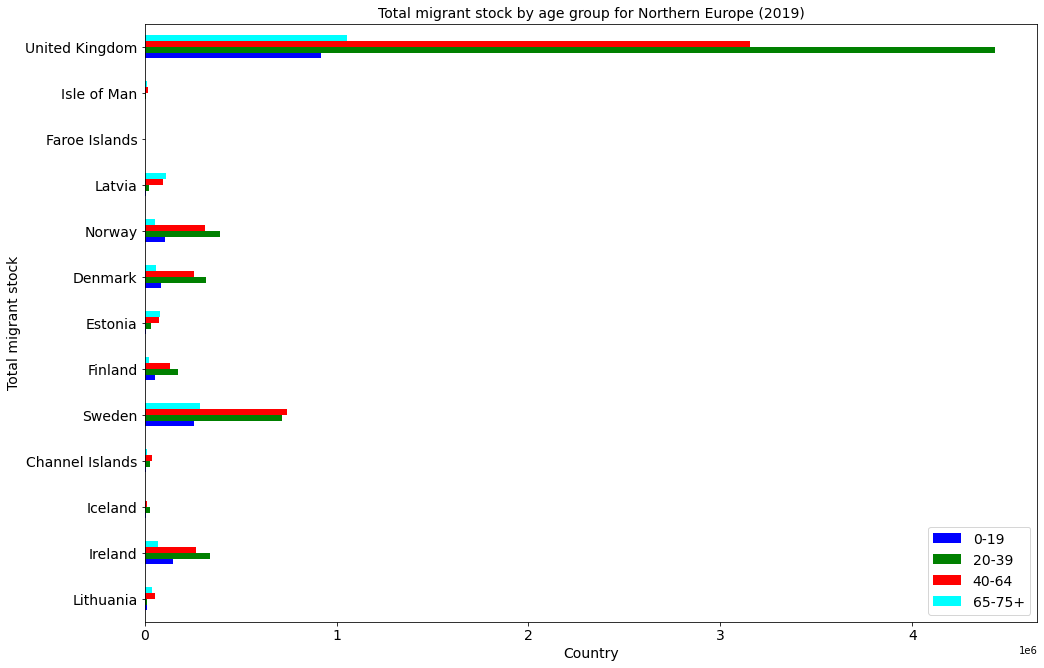

In [27]:
#northern europe, comparing migrant stock (7 plots total, 1 for each year)

northern_europe = age_europe.loc[['Channel Islands', 'Denmark','Estonia','Faroe Islands','Finland',
        'Iceland','Ireland','Isle of Man','Latvia','Lithuania','Norway','Sweden','United Kingdom']]

#sort by year
northern_europe_sort = northern_europe.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#northern_europe_1990
northern_europe_1990 = northern_europe_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_1995
northern_europe_1995 = northern_europe_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (1995)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_2000
northern_europe_2000 = northern_europe_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_2005
northern_europe_2005 = northern_europe_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_2010
northern_europe_2010 = northern_europe_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_2015
northern_europe_2015 = northern_europe_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#northern_europe_2019
northern_europe_2019 = northern_europe_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_europe_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Northern Europe (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 20-39 age group make up a larger portion of the total migrant population compared to other age groups, particulary in the United Kingdom.

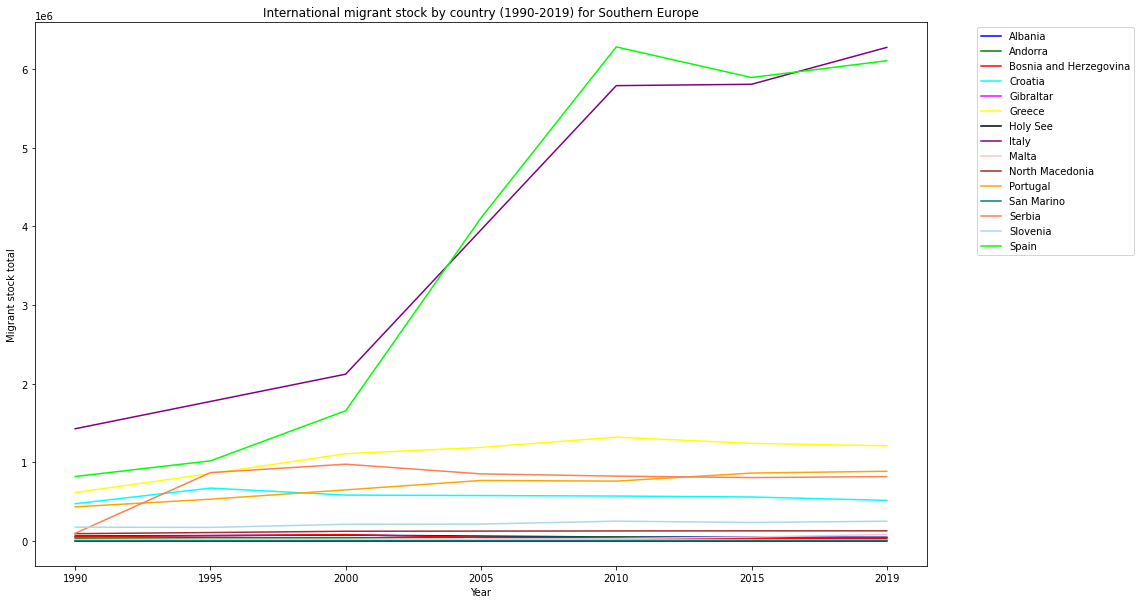

In [28]:
#Southern Europe - total migrant stock
plot_total(europe_total,'Albania','Spain','Southern Europe')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In Southern Europe, Italy and Spain have the most migrants compared to other countries in this region. There was a sharp increase in the stock total from 2000 to 2010 in both of these countries, but has since leveled off. 

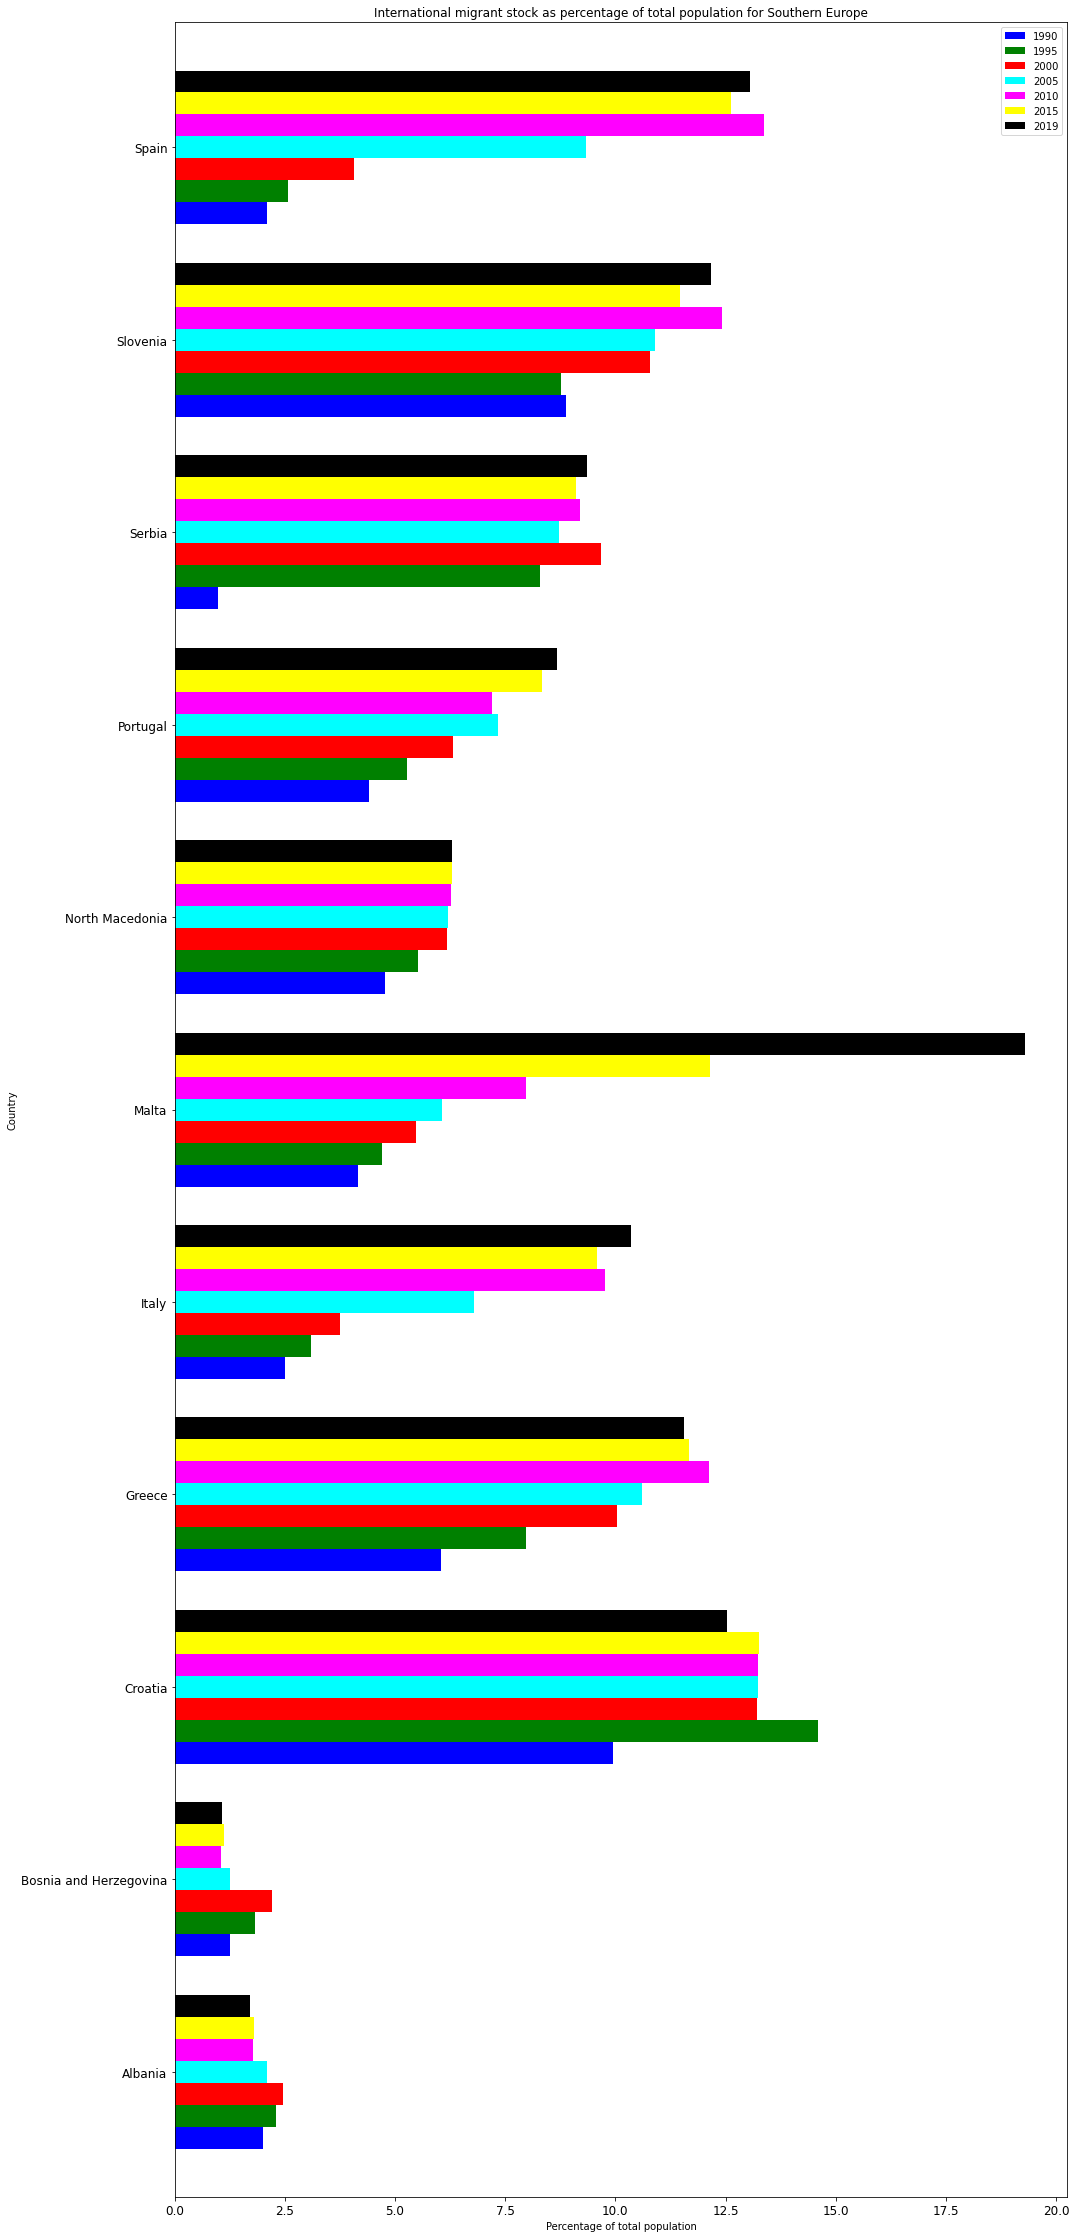

In [29]:
#Southern Europe - migrant stock as percentage of total population
countries_pct(europe_pct,'Albania','Spain','Southern Europe')
plt.show()

In Southern Europe, Spain and Italy have seen an increase in the migrant stock as percentage of total population over time. Whereas Malta, saw a significant increase in this percentage between 2015-2019.

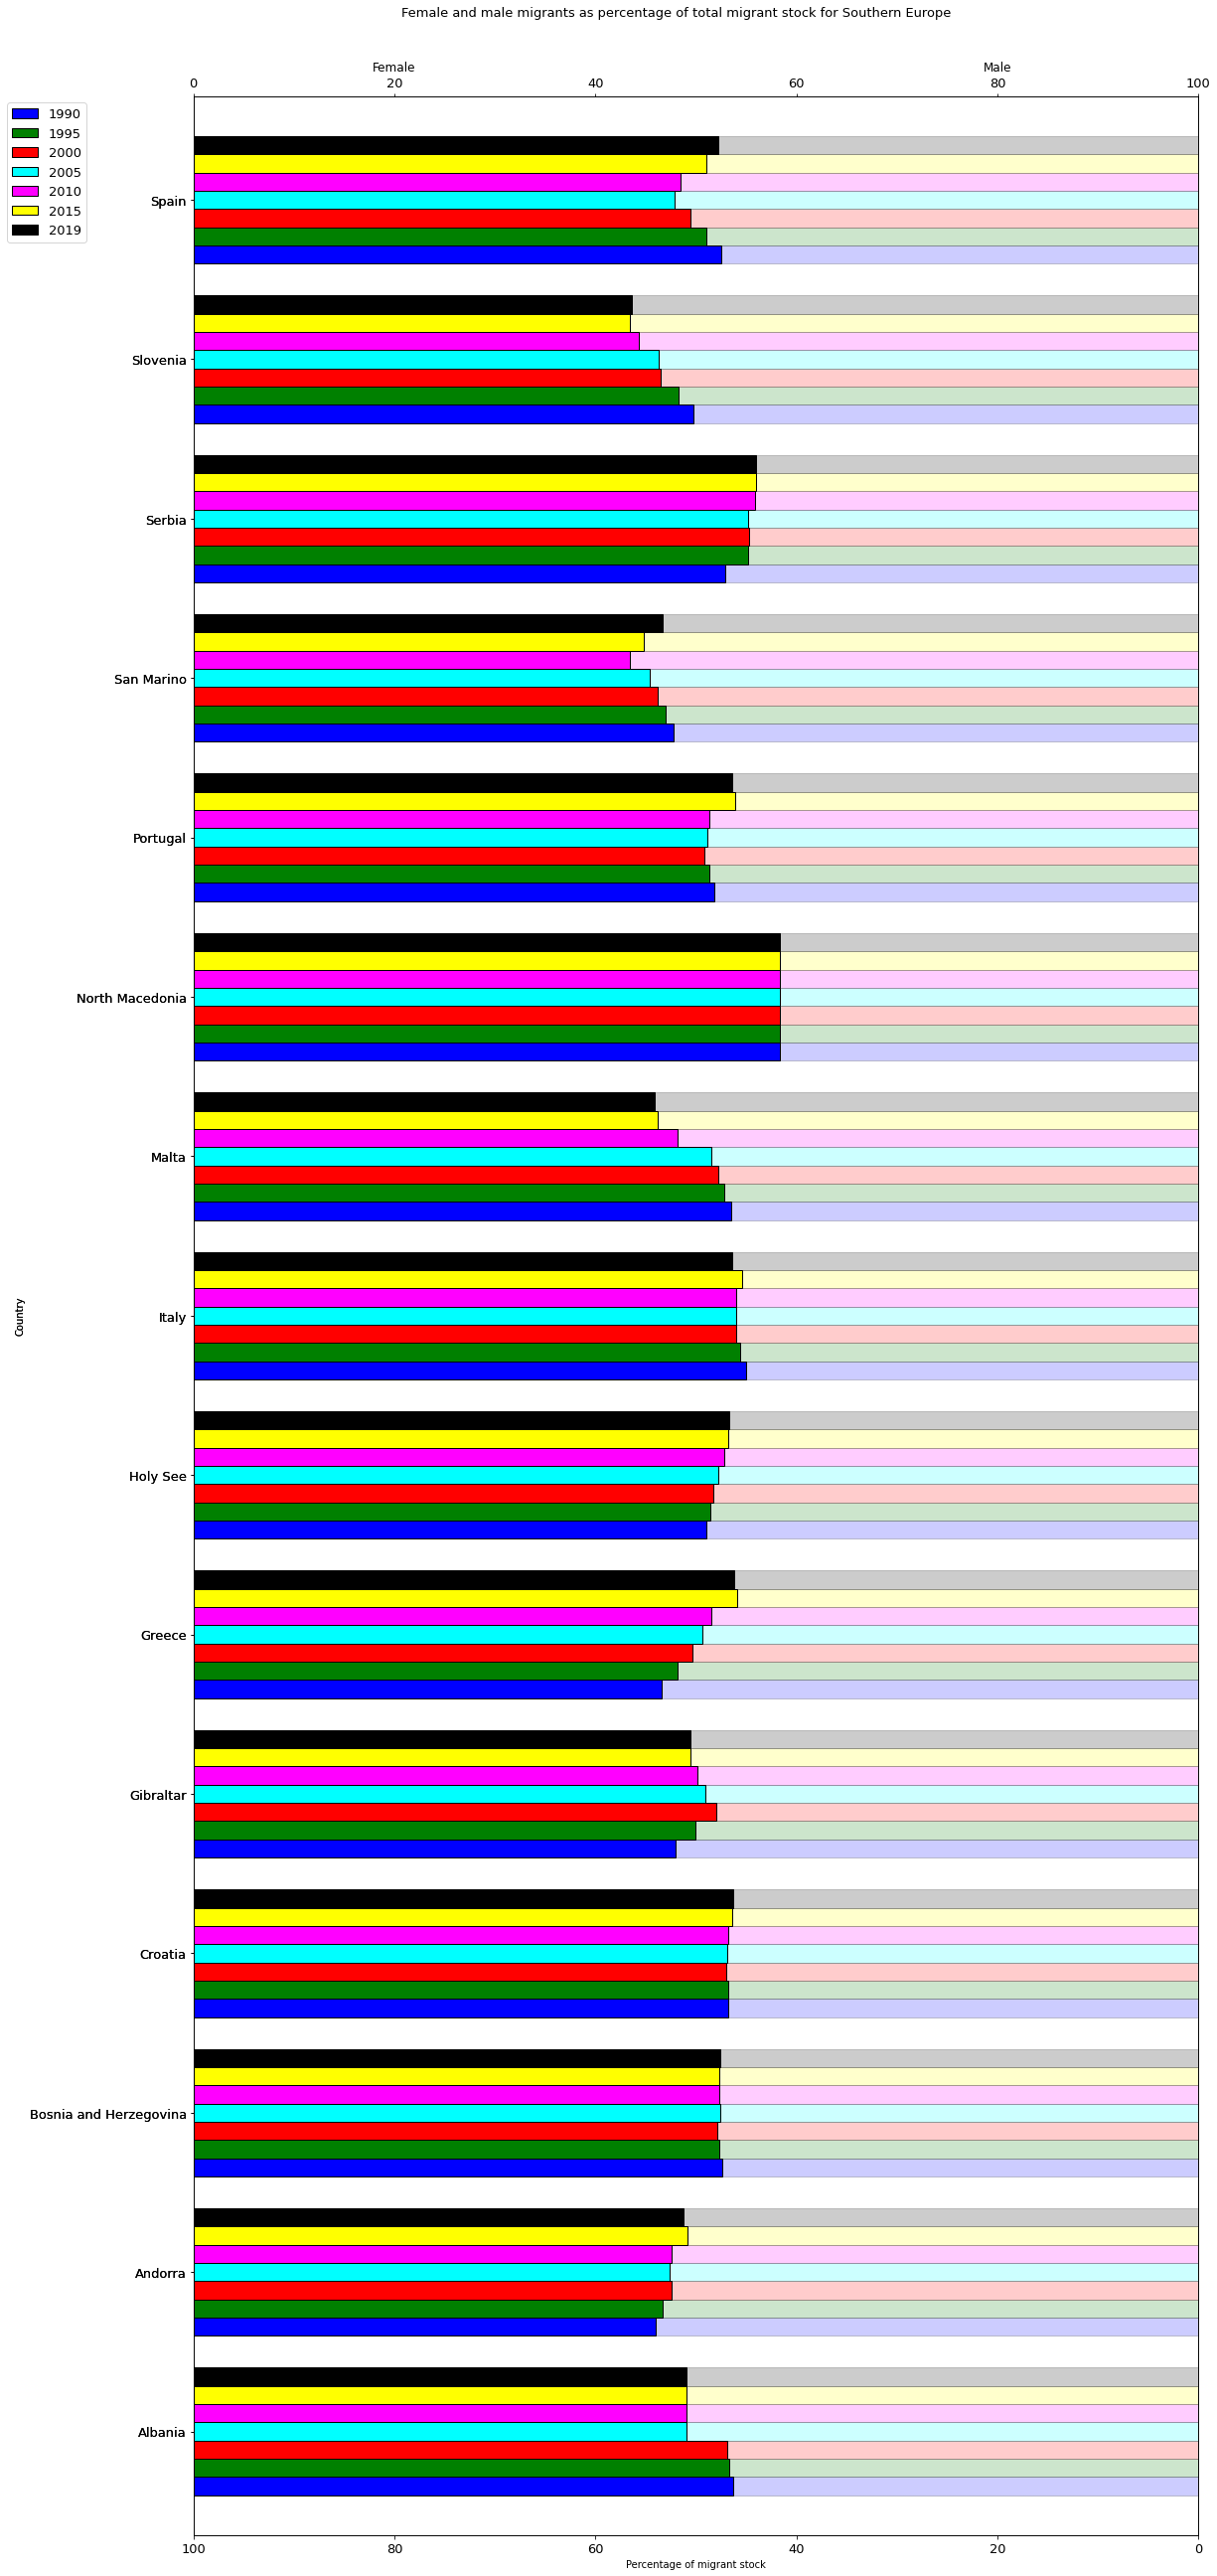

In [30]:
#comparing male and female percentages on same plot - Southern Europe

fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Southern Europe', fontsize=13)
fig.tight_layout()
male_final_europe.loc['Albania':'Spain'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_europe.loc['Albania':'Spain'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

The female and male migrants as percentage of migrant stock are evenly split in almost all countries in this region as well.

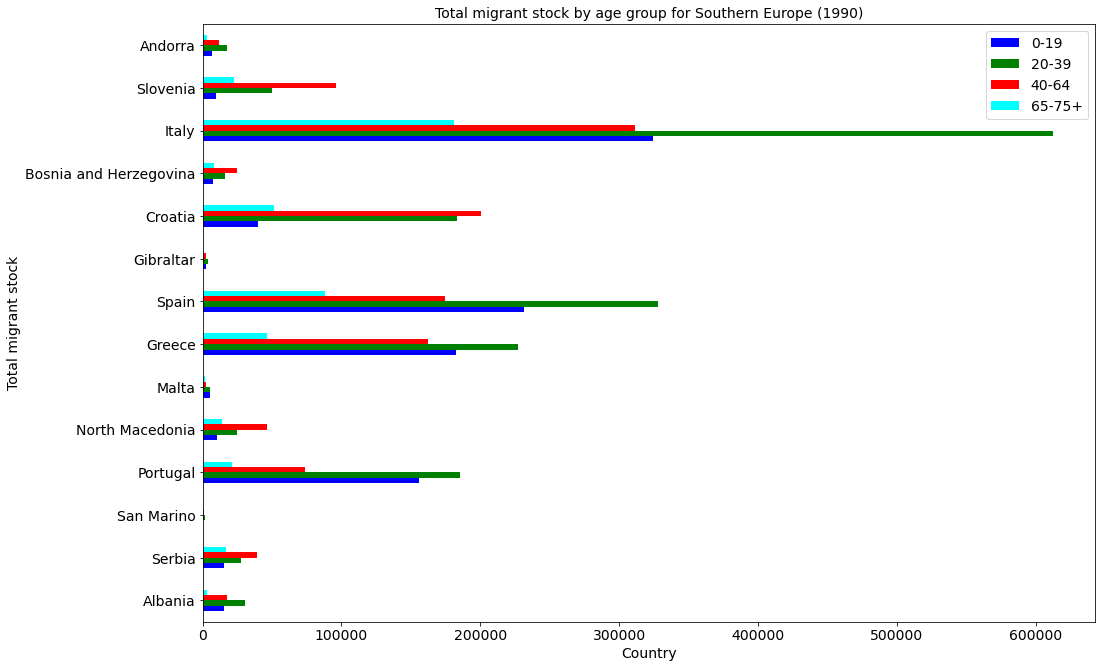

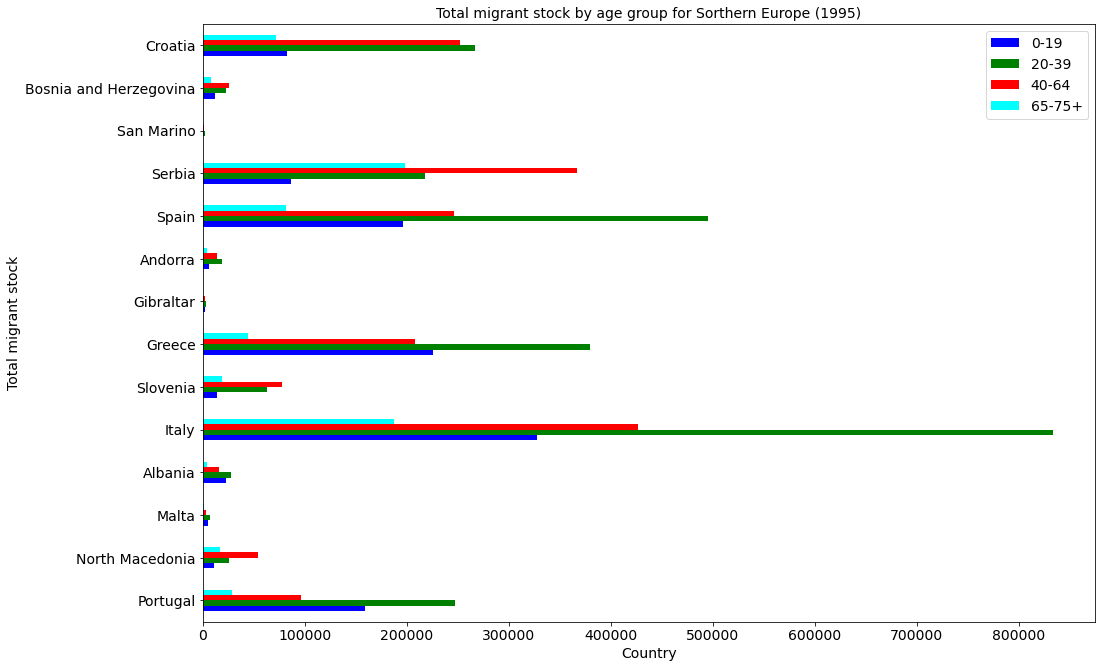

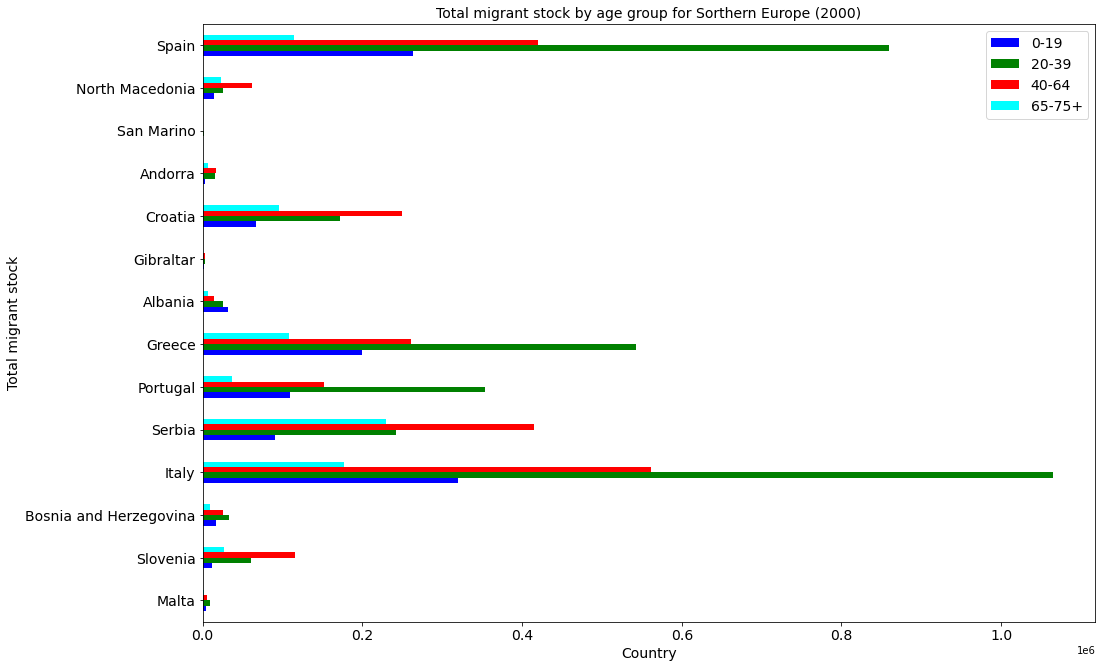

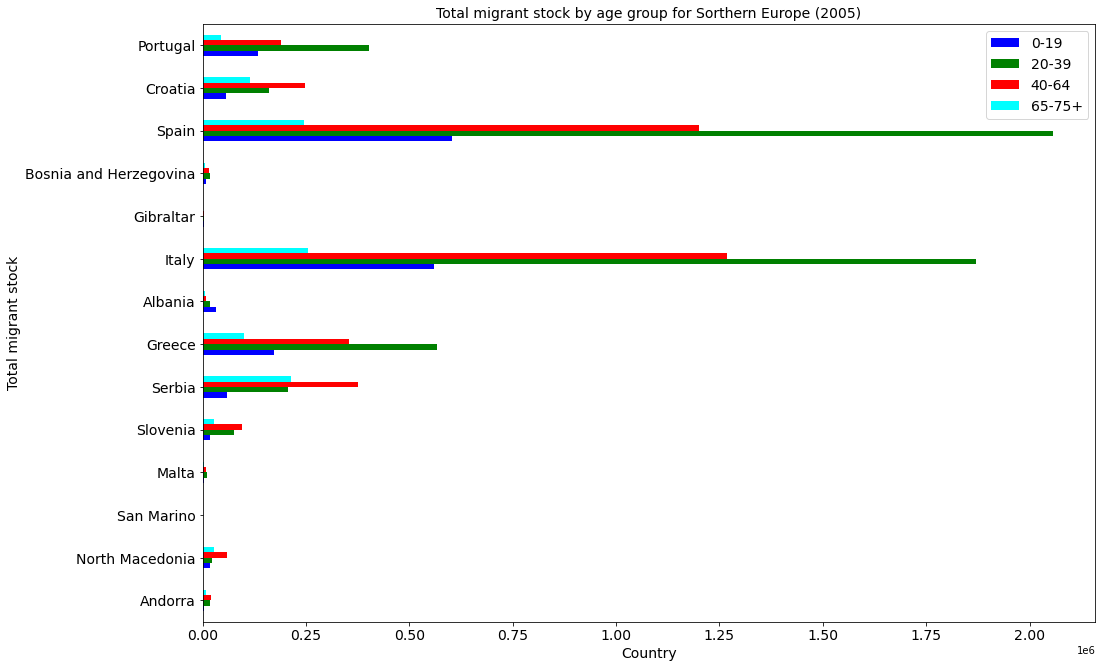

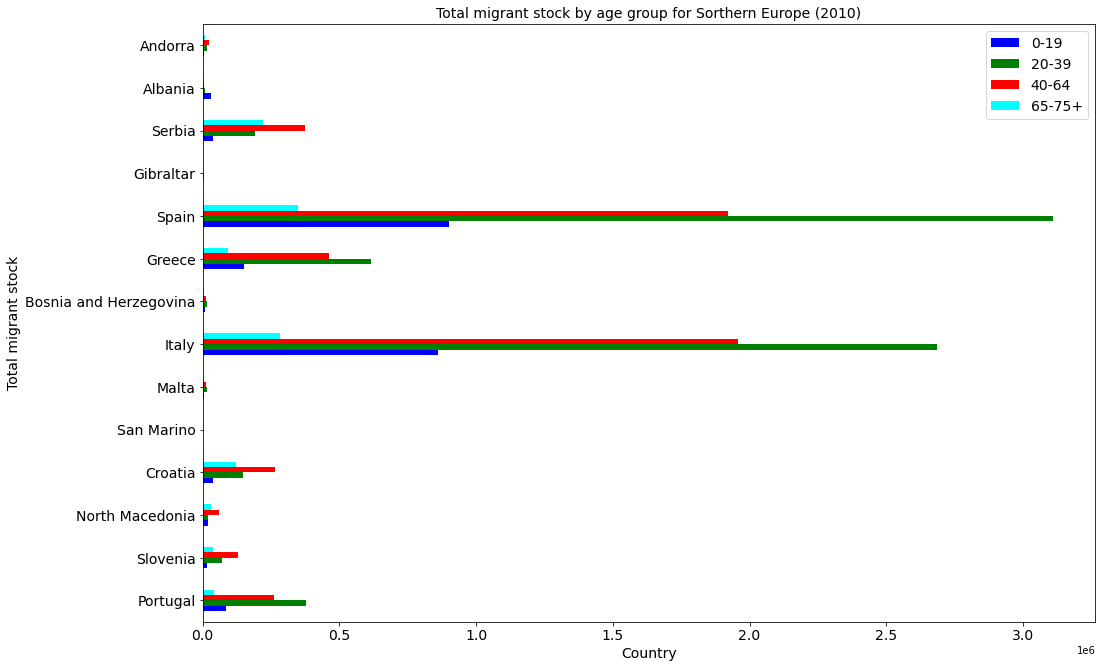

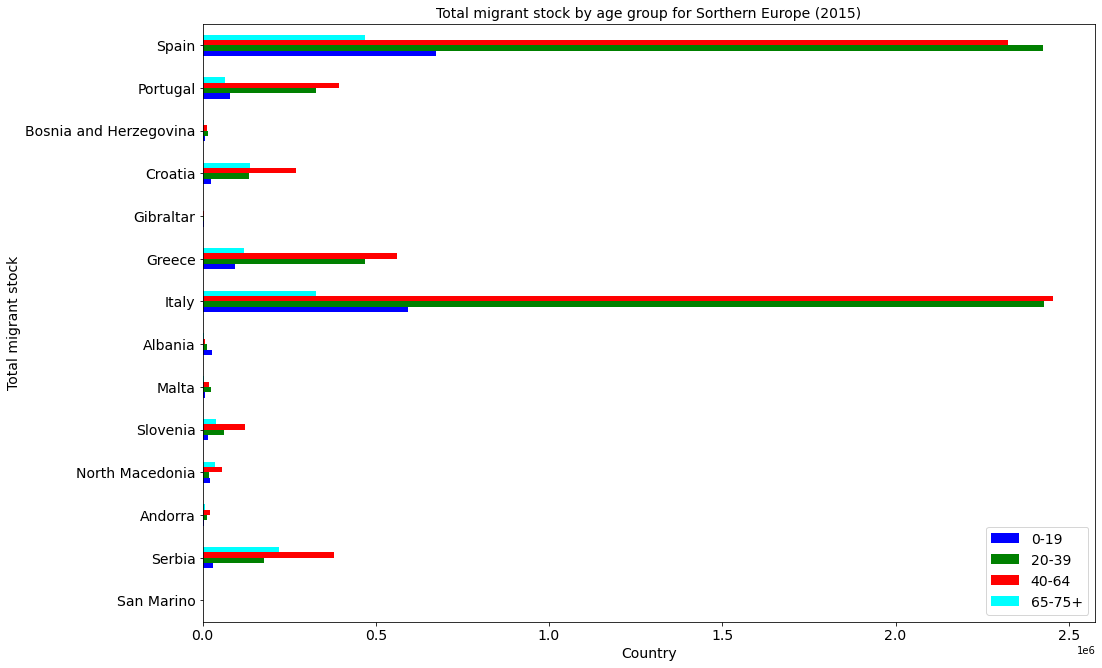

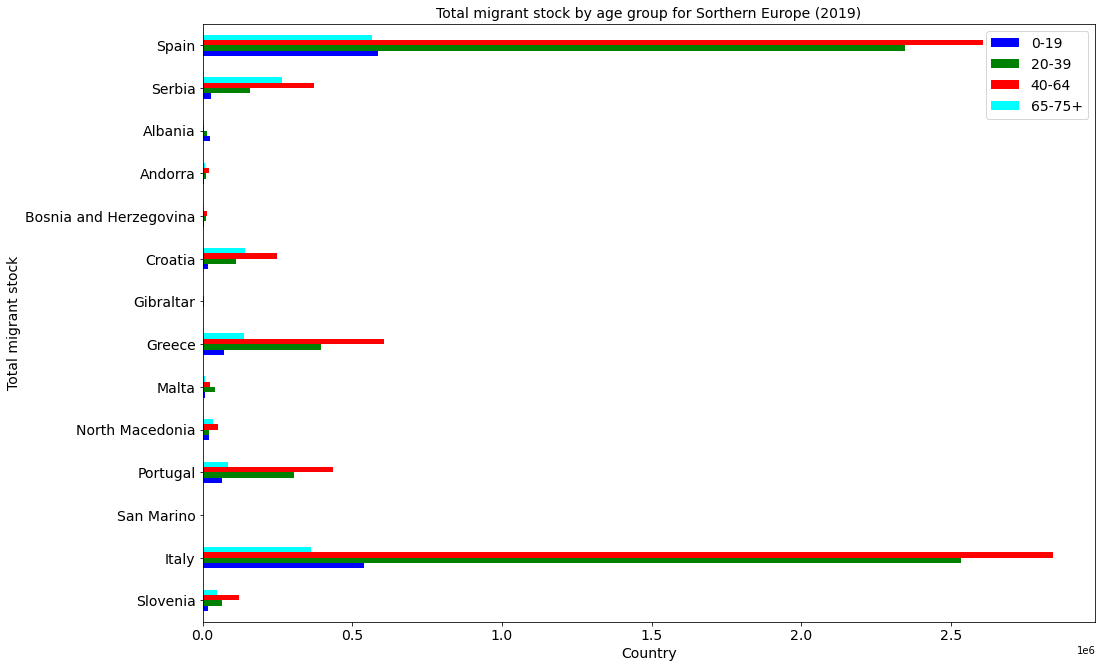

In [31]:
#southern europe, comparing migrant stock (7 plots total, 1 for each year)
#subset data
southern_europe = age_europe.loc[['Albania','Andorra','Bosnia and Herzegovina','Croatia',
                                  'Gibraltar','Greece','Italy','Malta','North Macedonia',
                                  'Portugal','San Marino','Serbia','Slovenia','Spain']]

#sort by year
southern_europe_sort = southern_europe.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')
#southern_europe_1990
southern_europe_1990 = southern_europe_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Southern Europe (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_1995
southern_europe_1995 = southern_europe_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (1995)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_2000
southern_europe_2000 = southern_europe_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_2005
southern_europe_2005 = southern_europe_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_2010
southern_europe_2010 = southern_europe_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_2015
southern_europe_2015 = southern_europe_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#southern_europe_2019
southern_europe_2019 = southern_europe_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
southern_europe_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Sorthern Europe (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 20-39 and 40-64 age groups make up a larger portion of the total migrant population compared to other age groups, particulary in Spain and Italy.

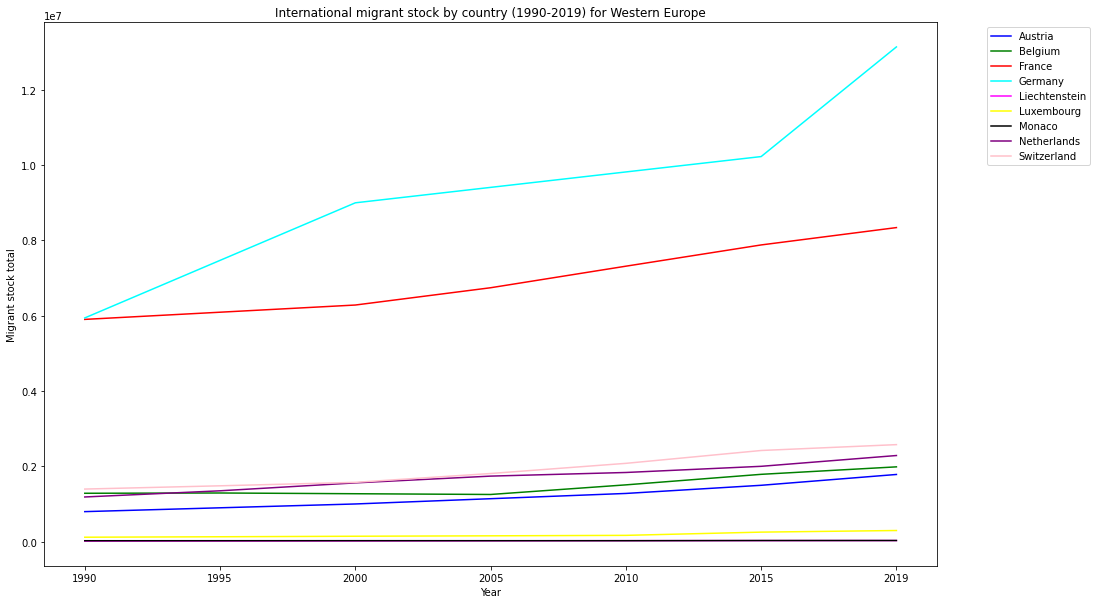

In [32]:
#Western Europe - total migrant stock
plot_total(europe_total,'Austria','Switzerland','Western Europe')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In Western Europe, Germany has had the most migrants compared to other countries from 1990-2019 in this region.

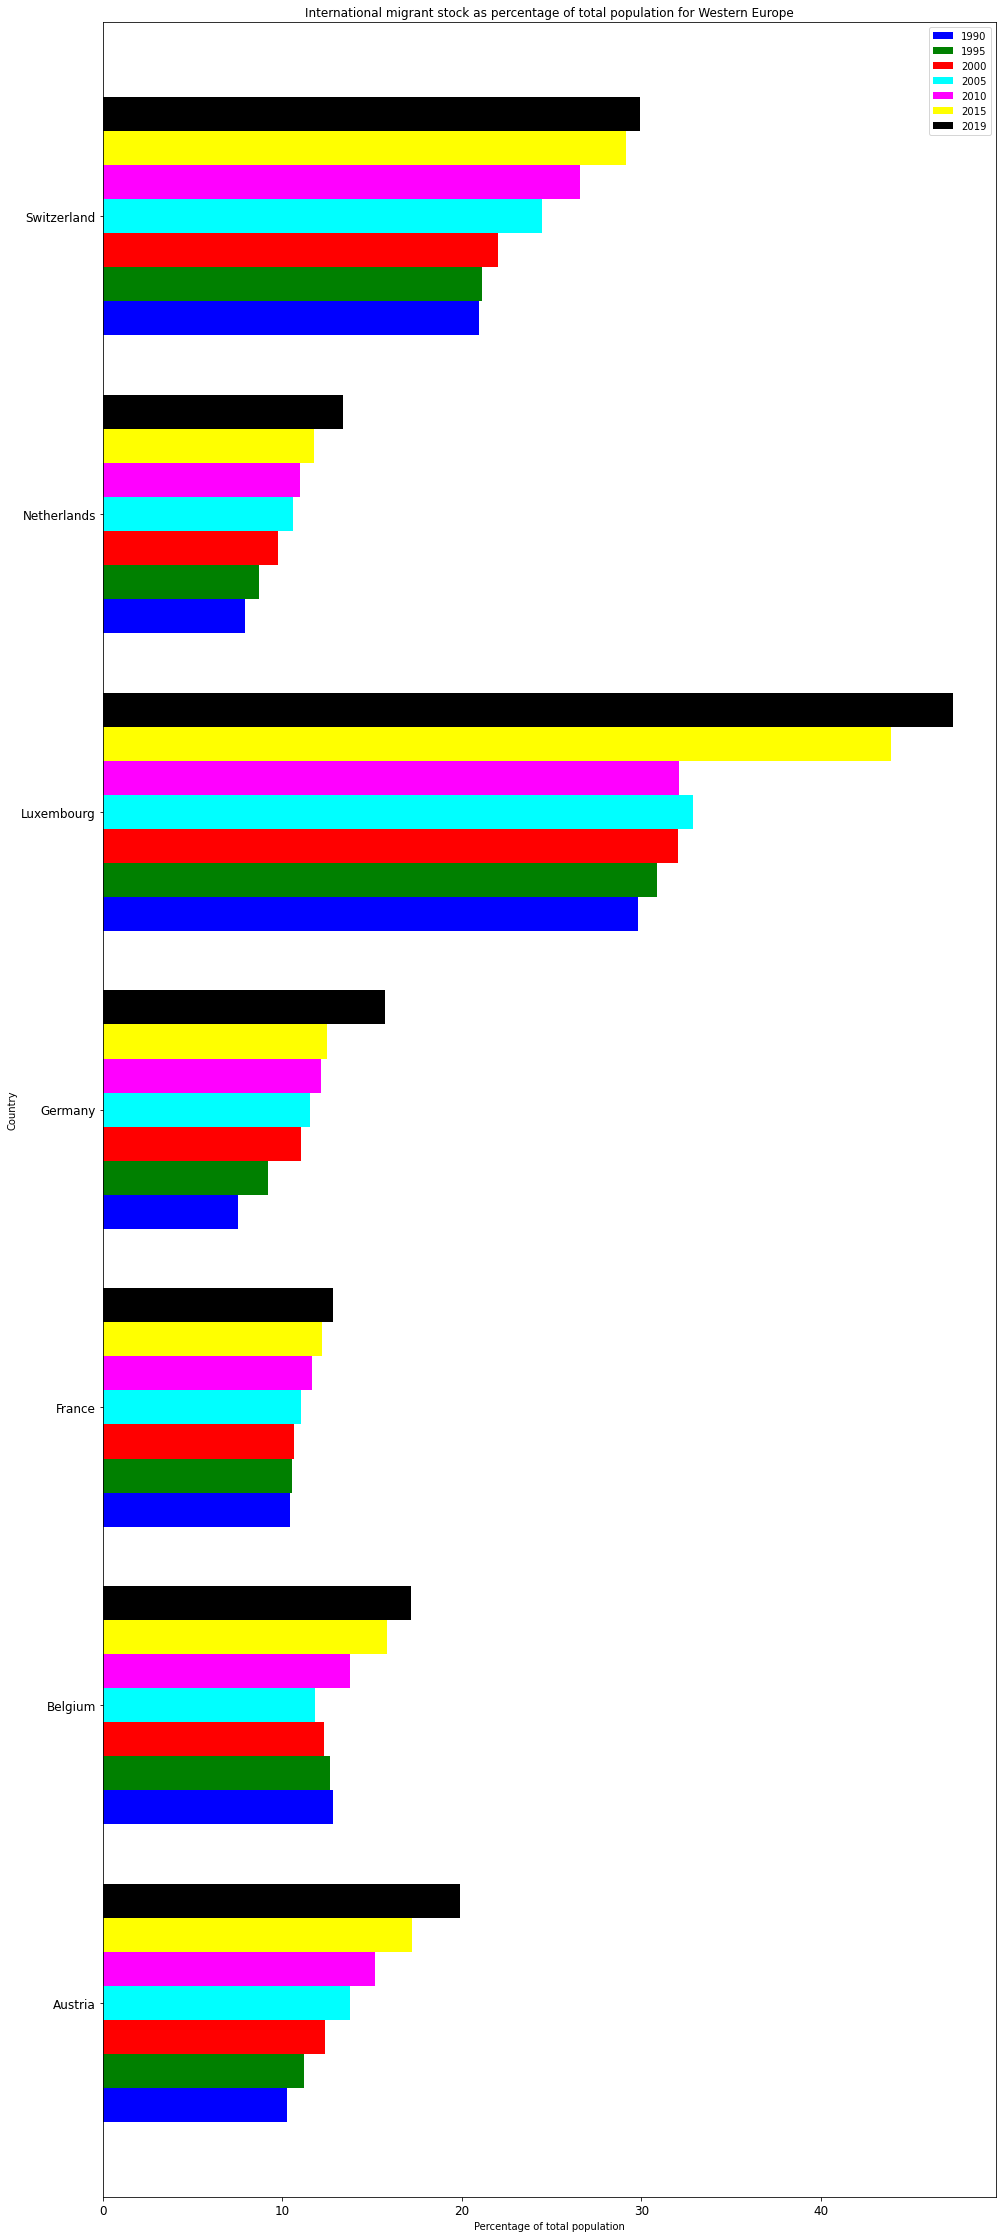

In [33]:
#Western Europe - migrant stock as percentage of total population
countries_pct(europe_pct,'Austria','Switzerland','Western Europe')
plt.show()

In Western Europe, all countries in this region have seen an increase in this percentage.

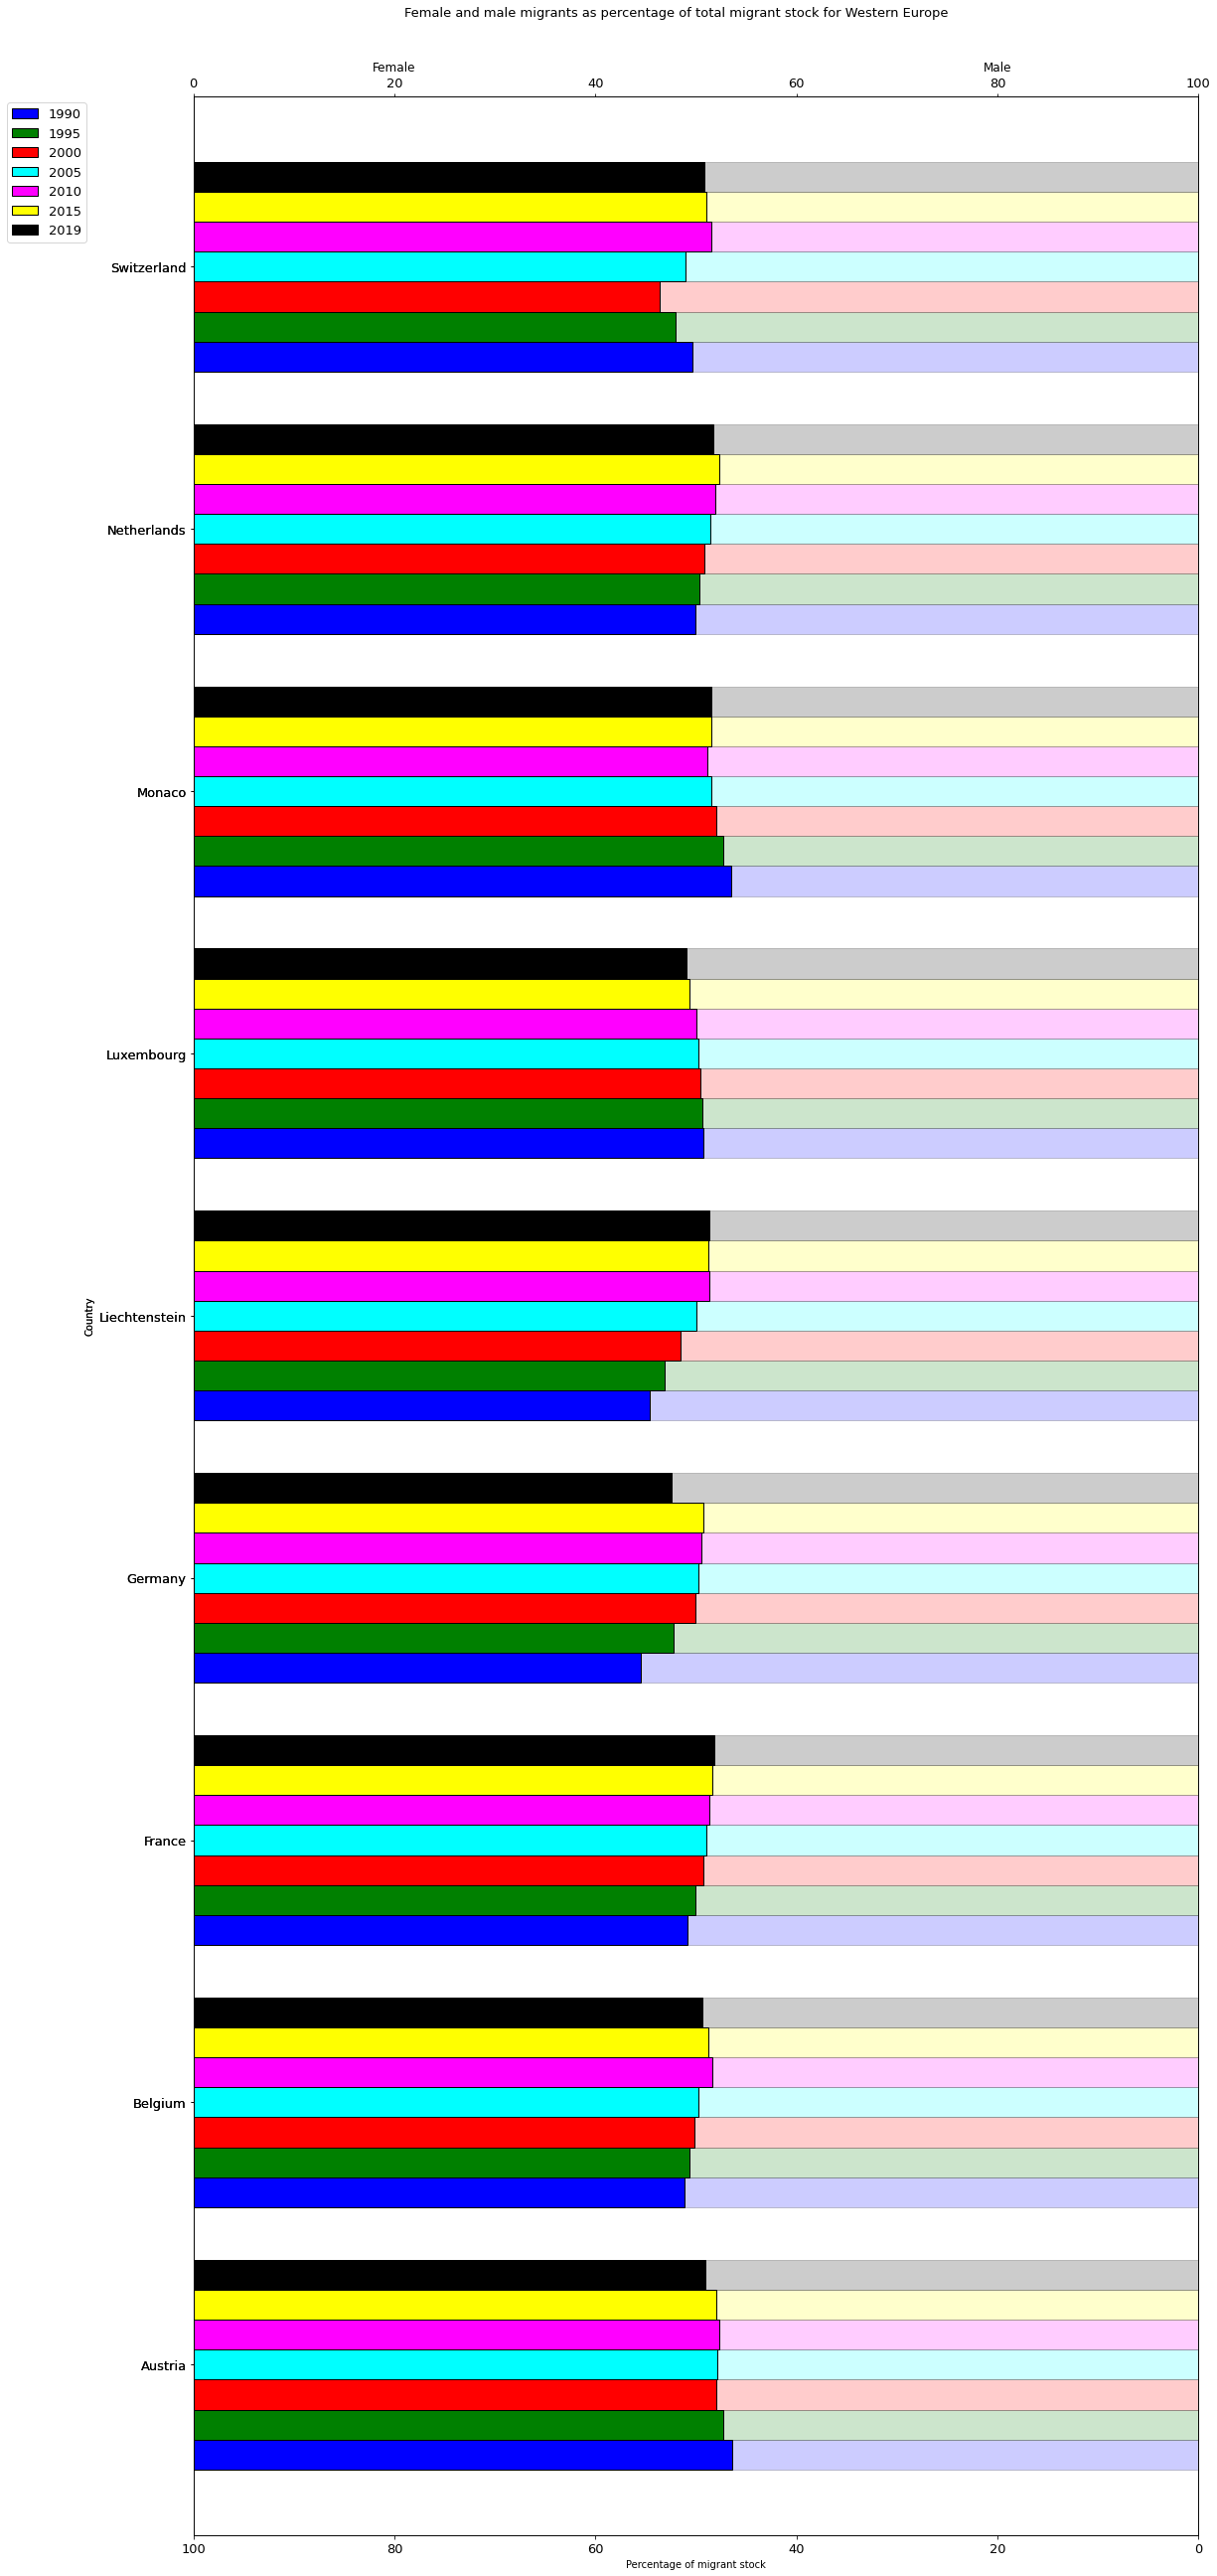

In [34]:
#comparing male and female percentages on same plot - Western Europe

fig, axes = plt.subplots(1) 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Western Europe', fontsize=13)
fig.tight_layout()
male_final_europe.loc['Austria':'Switzerland'].plot(kind='barh', figsize=(16,40), width =0.8, ax=axes,
                                alpha=0.2,
                                fontsize=13, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_europe.loc['Austria':'Switzerland'].plot(kind='barh', ax=axes2, width=0.8, 
                                             fontsize=13, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1), fontsize=13)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

The female and male migrants as percentage of migrant stock are evenly split in almost all countries in this region as well.

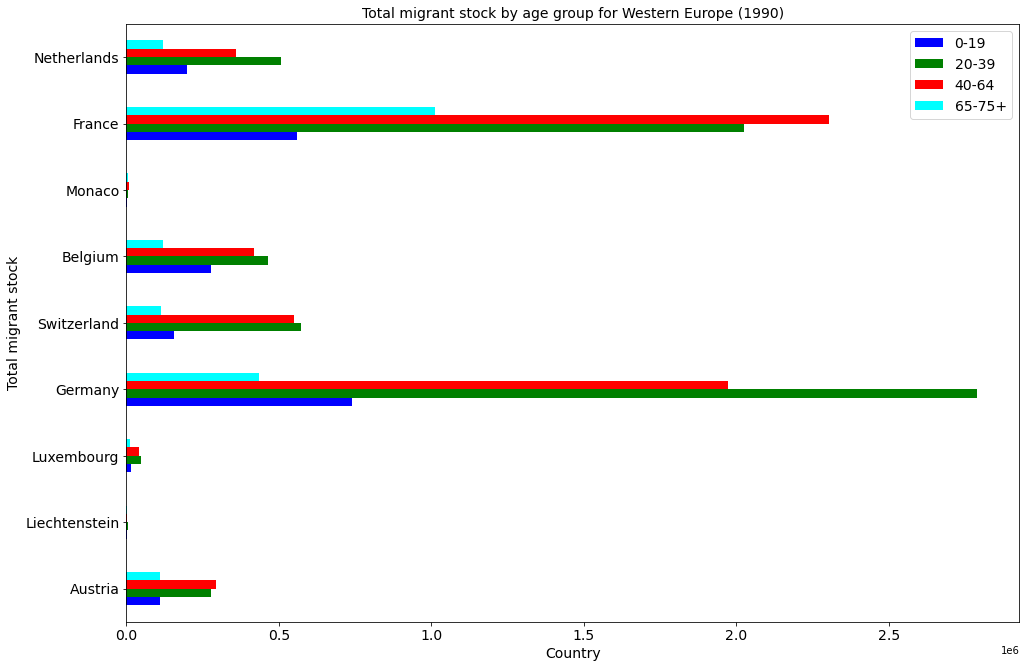

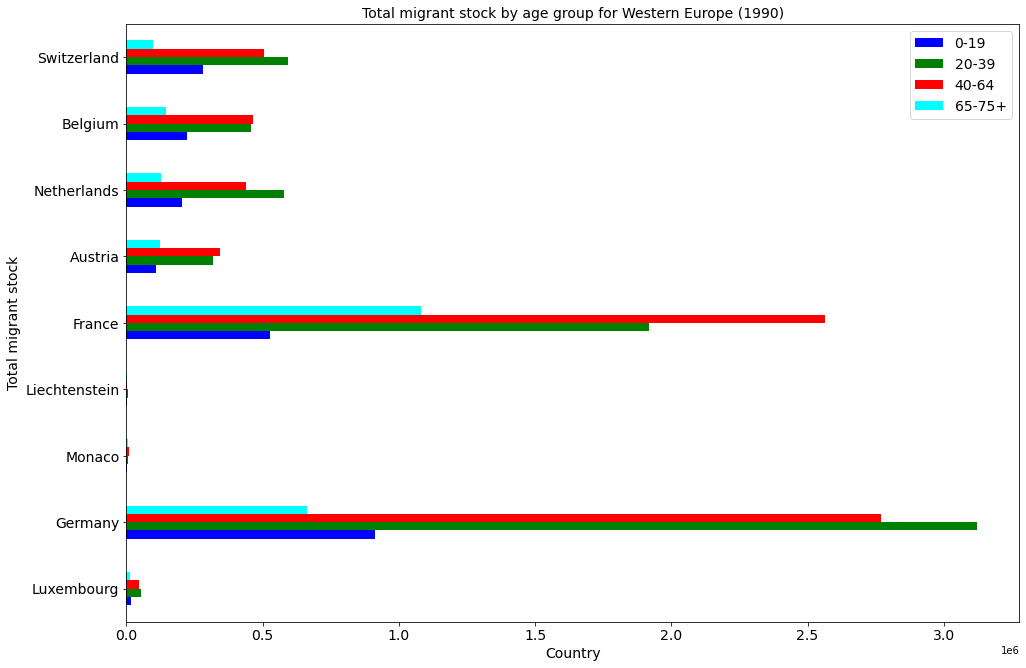

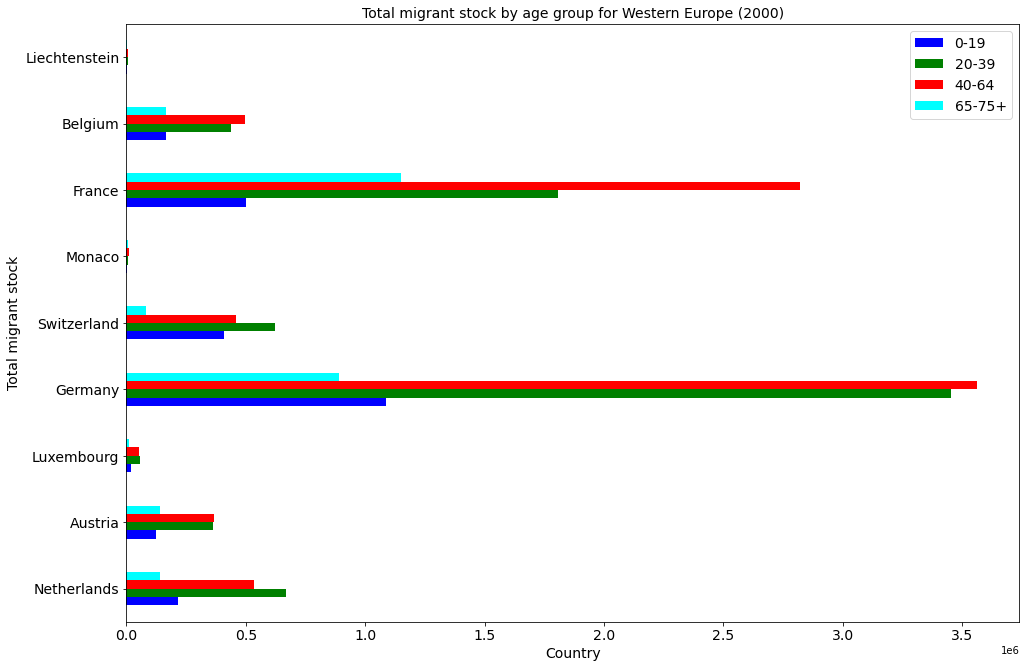

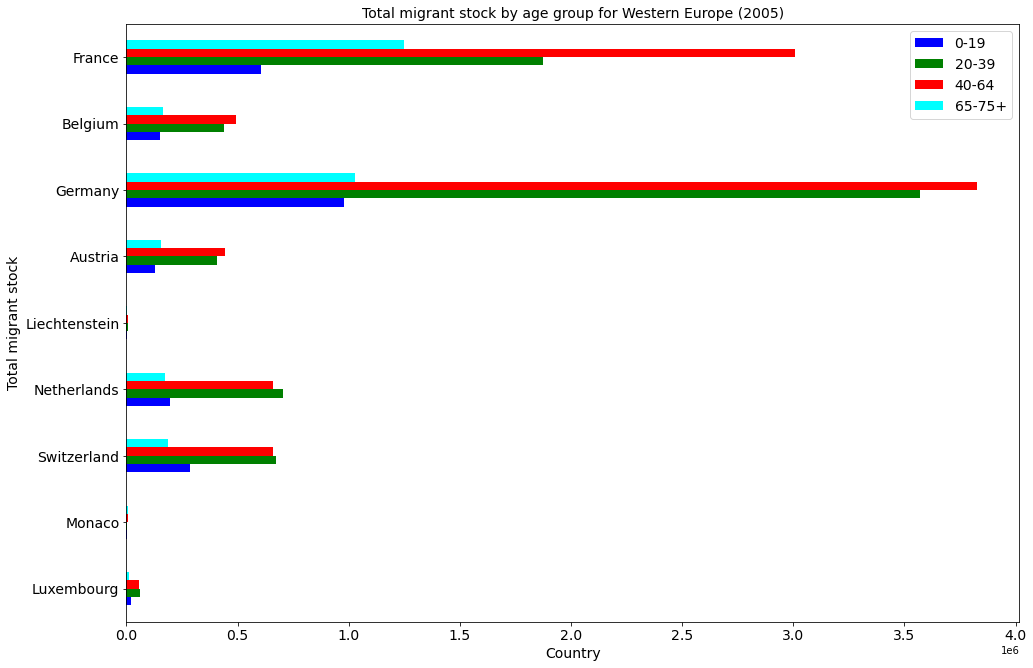

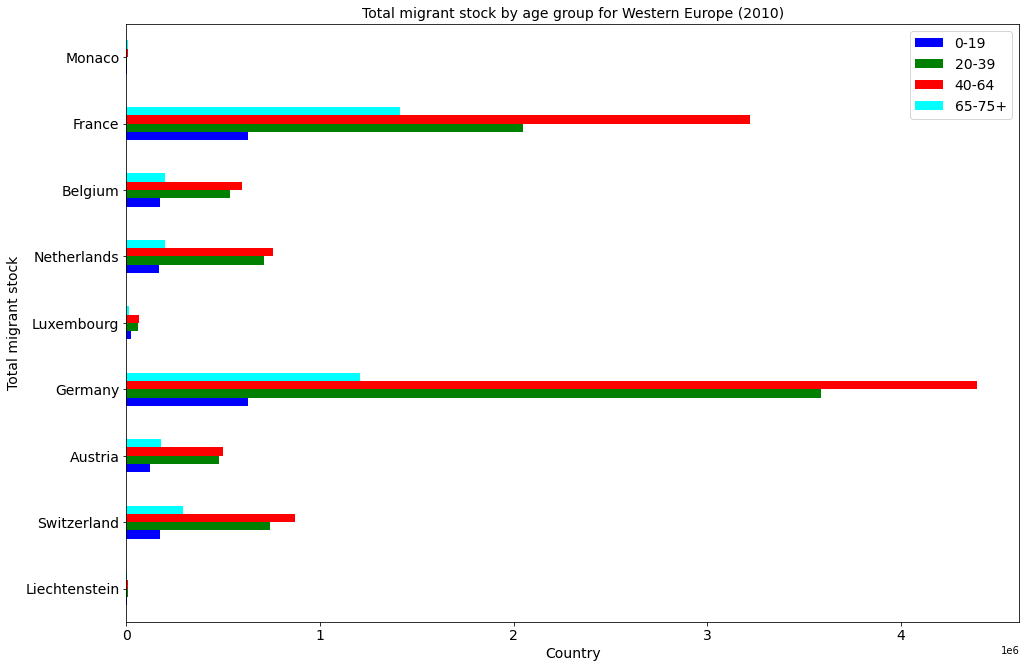

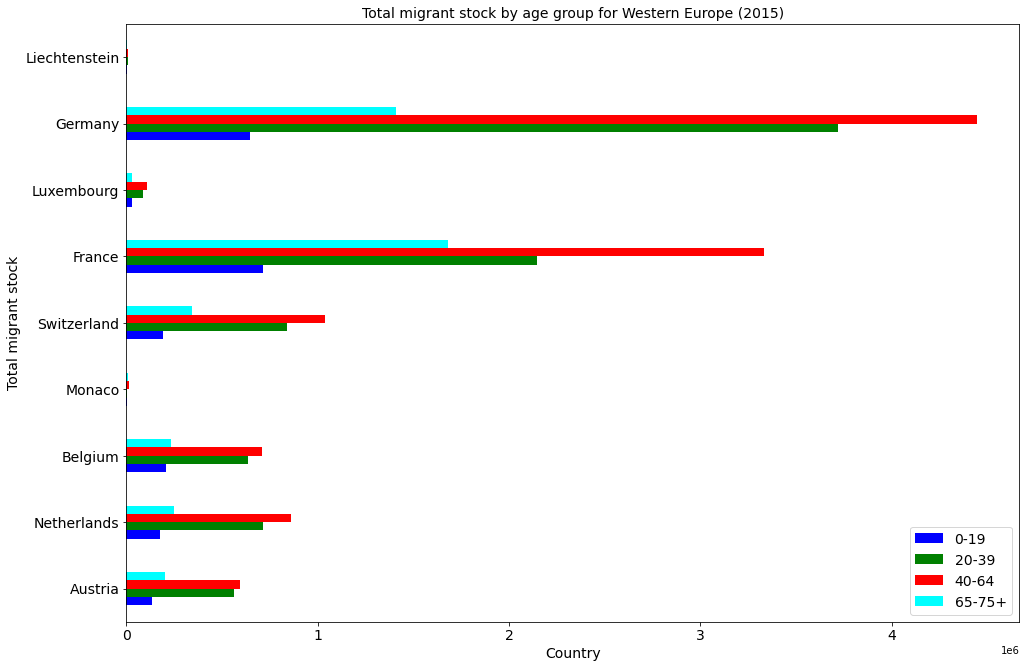

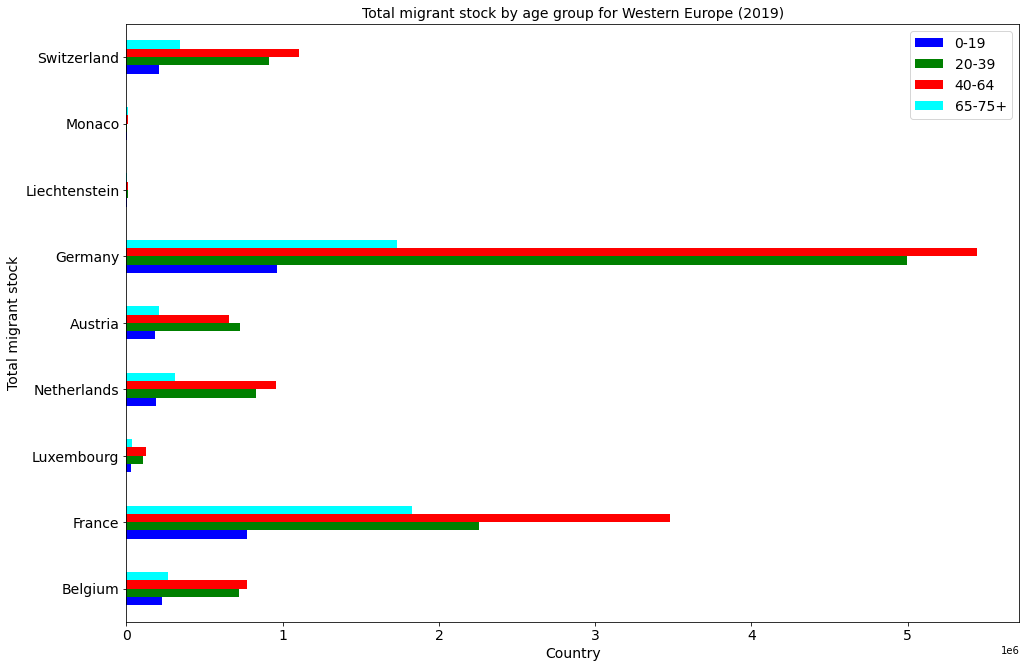

In [35]:
#western europe, comparing migrant stock (7 plots total, 1 for each year)
#subset data
western_europe = age_europe.loc[['Austria','Belgium','France','Germany','Liechtenstein',
                                 'Luxembourg','Monaco','Netherlands','Switzerland']]

#sort by year
western_europe_sort = western_europe.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')

#western_europe_1990
western_europe_1990 = western_europe_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_1995
western_europe_1995 = western_europe_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (1990)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_2000
western_europe_2000 = western_europe_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (2000)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_2005
western_europe_2005 = western_europe_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_2010
western_europe_2010 = western_europe_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (2010)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_2015
western_europe_2015 = western_europe_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (2015)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

#western_europe_2019
western_europe_2019 = western_europe_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
western_europe_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (16, 11), kind='barh')
plt.title('Total migrant stock by age group for Western Europe (2019)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(labelsize = 14)
plt.show()

Overall, migrants within the 20-39 and 40-64 age groups make up a larger portion of the total migrant population compared to other age groups, particulary in Germany.

## ## 3.2 (b) Northern America

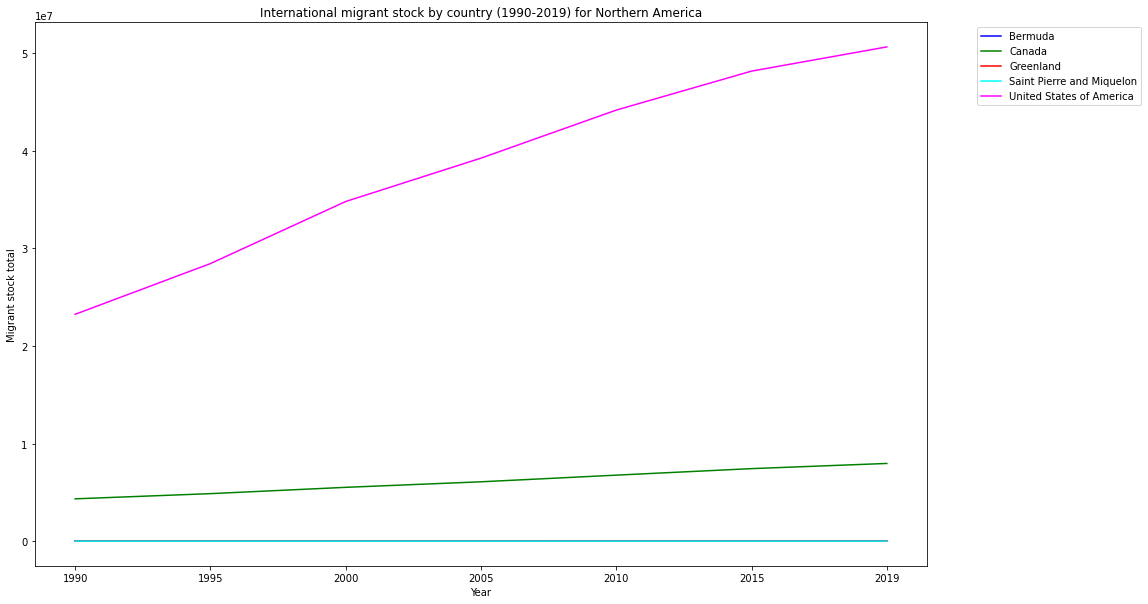

In [36]:
#subset total migrant stock dataframe for only countries in Europe, drop region rows
northern_america_total = both_sexes_total.loc['Bermuda':'United States of America', :]

#northern america - total migrant stock
plot_total(northern_america_total,'Bermuda','United States of America','Northern America')
plt.ylabel('Migrant stock total')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

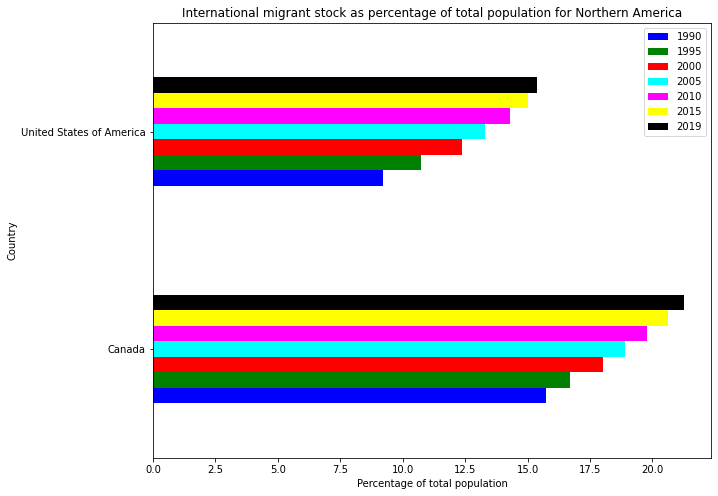

In [37]:
#Northern america - migrant stock as percentage of total population
northern_america_pct = both_sexes_stock_pct.loc[['Canada', 'United States of America'], :]

northern_america_pct.plot(kind='barh', title='International migrant stock as percentage of total population for Northern America',
                         figsize=(10,8)).set(xlabel='Percentage of total population', ylabel='Country')
                                                                                                                                       
plt.show()

Migrant stock as percentage of total population has increased over time for both countries. 

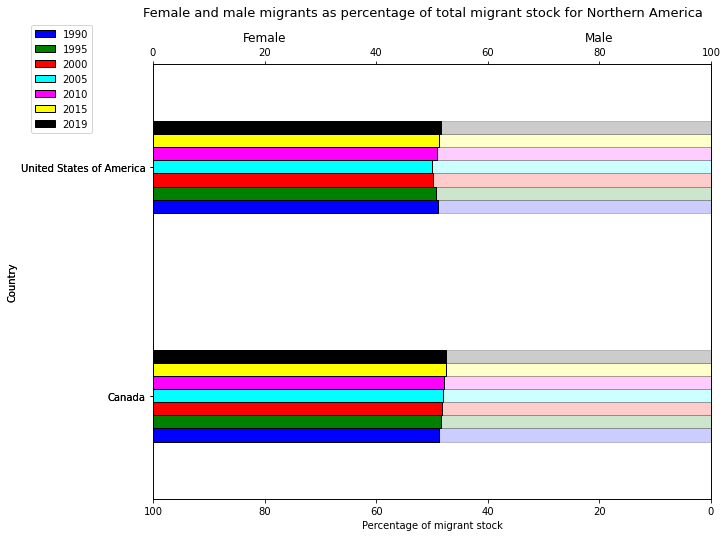

In [38]:
#subset male migrants as percentage of migrant stock dataframe for only countries in Northern America
male_final_northern_america = male_percentage_final.loc[['Canada','United States of America'], :]

#subset female migrants as percentage of migrant stock dataframe for only countries in Northern America
female_final_northern_america = female_percentage_final.loc[['Canada','United States of America'], :]

#comparing male and female percentages on same plot - Northern America

fig, axes = plt.subplots() 
fig.suptitle('Female and male migrants as percentage of total migrant stock for Northern America', fontsize=13)
male_final_northern_america.plot(kind='barh', figsize=(10,8), width =0.4, ax=axes,
                                alpha=0.2,
                                fontsize=10, edgecolor='black',legend=False).set(xlabel='Percentage of migrant stock', 
                                                                                ylabel='Country')
#plot female data on same figure
axes2 = axes.twiny()
female_final_northern_america.plot(kind='barh', ax=axes2, width=0.4, 
                                             fontsize=10, 
                                             edgecolor='black',legend=False).set(ylabel='Country')
axes.set_xlim(100,0) #100-0%
axes2.set_xlim(0,100) #0-100%
plt.legend(bbox_to_anchor=(-.1,1.1), fontsize=10)
axes.set_title('Male', x=0.8)
axes2.set_title('Female',x=0.2)
plt.show()

The female and male migrants as percentage of migrant stock are evenly split in both countries from 1990-2019. 

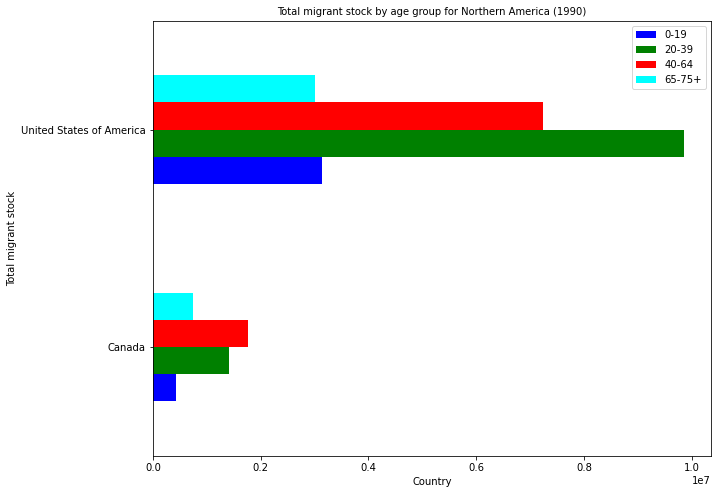

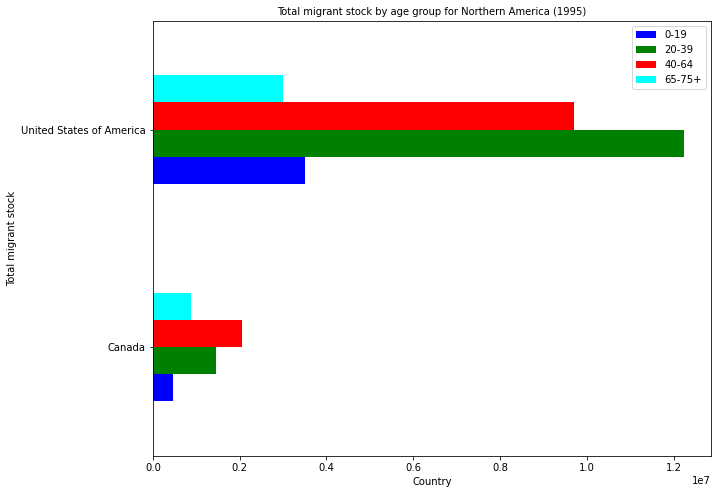

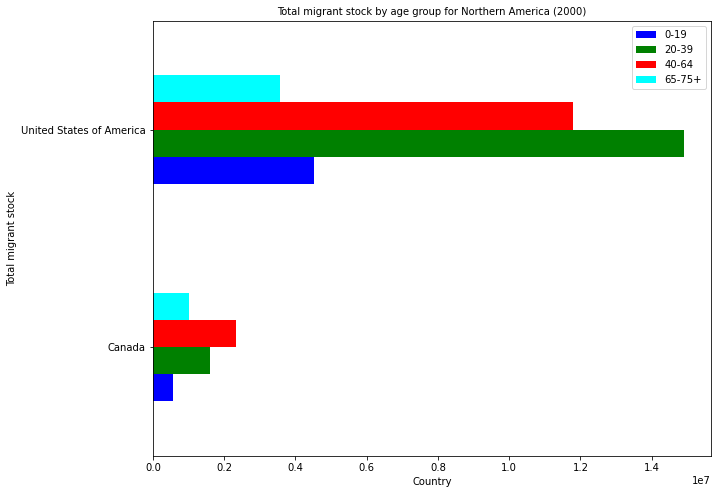

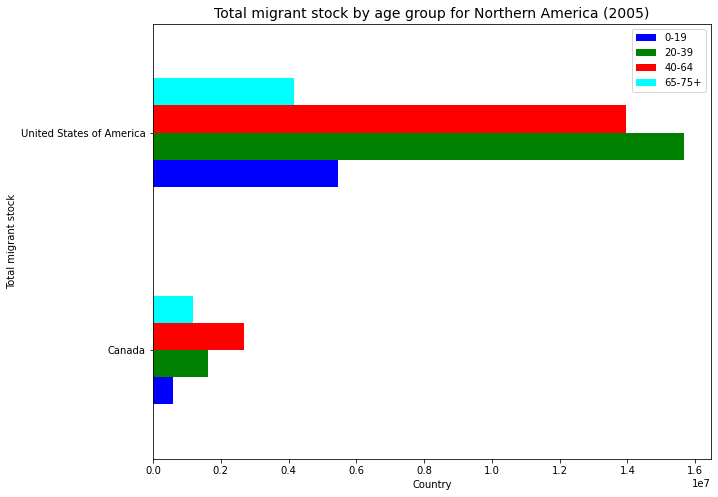

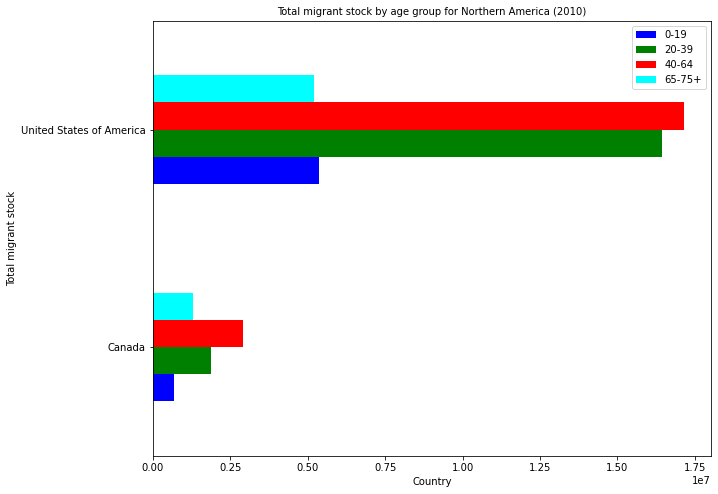

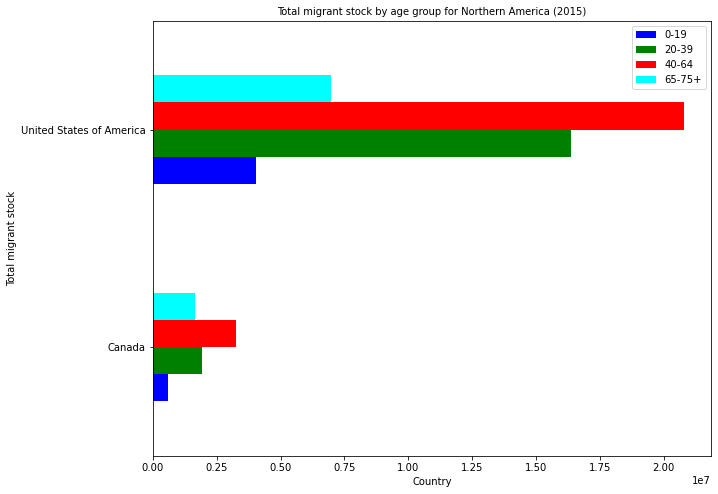

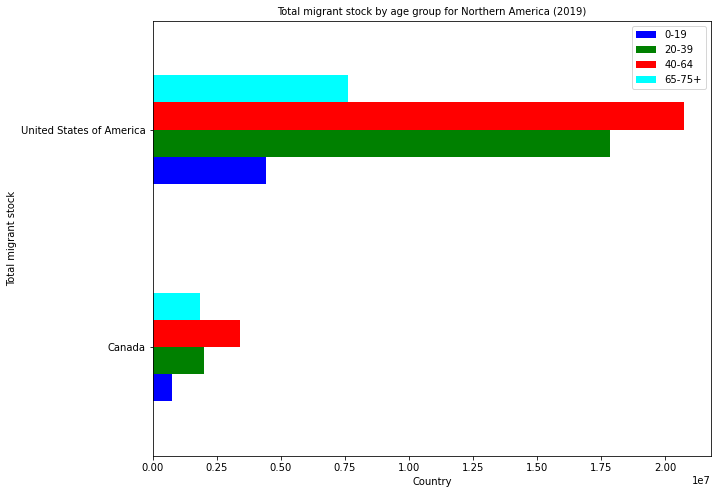

In [39]:
#northern america, comparing migrant stock (7 plots total, 1 for each year)
#subset data
age_northern_america = sorted_countries.loc[['Canada','United States of America'], :]

#sort by year
northern_america_sort = age_northern_america.sort_values(by=['Year'], ascending=True).reset_index().set_index('Year')

#northern_america_1990
northern_america_1990 = northern_america_sort.loc['1990'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_1990.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (1990)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

#northern_america_1995
northern_america_1995 = northern_america_sort.loc['1995'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_1995.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (1995)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()


#northern_america_2000
northern_america_2000 = northern_america_sort.loc['2000'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_2000.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (2000)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

#northern_america_2005
northern_america_2005 = northern_america_sort.loc['2005'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_2005.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (2005)', fontsize=14)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

#northern_america_2010
northern_america_2010 = northern_america_sort.loc['2010'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_2010.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (2010)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

#northern_america_2015
northern_america_2015 = northern_america_sort.loc['2015'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_2015.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (2015)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

#northern_america_2019
northern_america_2019 = northern_america_sort.loc['2019'].reset_index().drop('Year', axis=1).set_index('Major area, region, country or area of destination')
northern_america_2019.plot(y=['0-19','20-39','40-64','65-75+'], figsize = (10, 8), kind='barh')
plt.title('Total migrant stock by age group for Northern America (2019)', fontsize=10)
plt.ylabel('Total migrant stock', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.legend(fontsize=10)
plt.tick_params(labelsize = 10)
plt.show()

In the U.S., migrants within the age group 20-39 made up most of the total migrant stock up until 2005. Since then, the age group 40-64 has dominated. 

# 4. Migrant stock by origin and destination

In [40]:
#identify top 10 destination countries for migrants for each year
#subset to create a dataframe with only destination (rows); and Year and Total columns
destination_totals = origin_destination_final.loc[:, ['Year','Total']]
#list(destination_totals.index), drop rows that are not countries
droplist = ['WORLD','More developed regions','Less developed regions','Least developed countries',
            'Less developed regions, excluding least developed countries','High-income countries',
            'Middle-income countries','Upper-middle-income countries','Lower-middle-income countries',
            'Low-income countries','No income group available','Africa','Asia','Europe',
            'Latin America and the Caribbean','Northern America','Oceania','SUB-SAHARAN AFRICA',
            'Eastern Africa','Middle Africa','Southern Africa','Western Africa','NORTHERN AFRICA AND WESTERN ASIA',
            'Northern Africa','Western Asia','CENTRAL AND SOUTHERN ASIA','Central Asia','Southern Asia',
            'EASTERN AND SOUTH-EASTERN ASIA','Eastern Asia', 'South-Eastern Asia', 'LATIN AMERICA AND THE CARIBBEAN',
            'Caribbean','Central America','South America','OCEANIA','Australia / New Zealand','Melanesia','Micronesia','Polynesia','EUROPE AND NORTHERN AMERICA',
            'EUROPE','Eastern Europe','Northern Europe','Southern Europe','Western Europe','NORTHERN AMERICA']

#setting index to year
#drop na values, ensure all total values are integers for sorting
destination_totals_countries = destination_totals.drop(droplist,axis=0).reset_index().set_index('Year').replace('..', np.nan).dropna()
destination_totals_countries['Total'] = destination_totals_countries['Total'].astype('int')


In [41]:
#looking at top destination countries for each year
#subset dataframe for desired year, drop year column to sort totals and compare
def top10(Year):
    top = destination_totals_countries.loc[Year].reset_index().drop('Year',axis=1)
    top10 = top.sort_values('Total', ascending=False).head(10)
    return top10

top10('2019')

Major area, region, country or area of destination     Total
231                           United States of America  50661149
221                                            Germany  13132146
70                                        Saudi Arabia  13122338
186                                 Russian Federation  11640559
201                                     United Kingdom   9552110
74                                United Arab Emirates   8587256
220                                             France   8334875
228                                             Canada   7960657
156                                          Australia   7549270
209                                              Italy   6273722

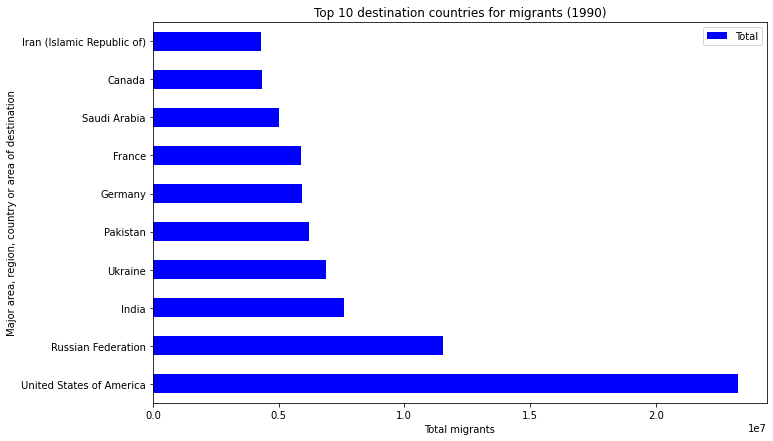

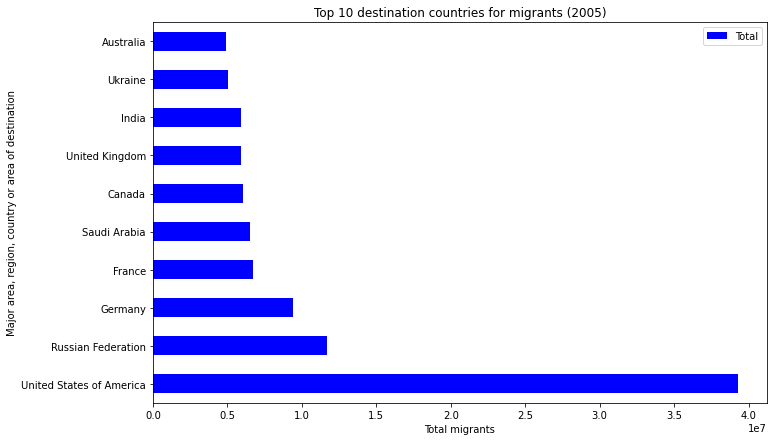

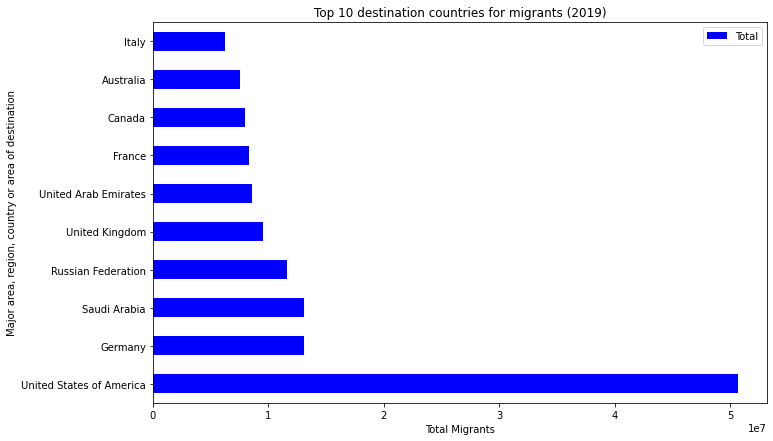

In [42]:
#plot 1990, 2005, 2019 for comparison
plot1990 = top10('1990').set_index('Major area, region, country or area of destination')
plot1990.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 destination countries for migrants (1990)')
plt.xlabel('Total migrants')
plt.show()

plot2005 = top10('2005').set_index('Major area, region, country or area of destination')
plot2005.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 destination countries for migrants (2005)')
plt.xlabel('Total migrants')
plt.show()

plot2019 = top10('2019').set_index('Major area, region, country or area of destination')
plot2019.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 destination countries for migrants (2019)')
plt.xlabel('Total Migrants')
plt.show()

In [43]:
#top10 origin countries - processing data
#drop row and column names that are not countries, substitute NaN with zero to sum columns values
#sum of columns will give total migrants from each origin country for a given year
column_droplist = ['Total','Other South','Other North']
origin_totals = origin_destination_final.drop(droplist,axis=0).drop(
    column_droplist, axis=1).reset_index().set_index('Year').fillna(0).drop('Major area, region, country or area of destination',
                                                                           axis=1)
#function for top 10 origin countries
def top10_origin(Year):
    year_origin = origin_totals.loc[Year] 
    origin_append = year_origin.append(year_origin.sum(), ignore_index=True) #sum all values for every column, 
    origin_sum_row = origin_append.iloc[-1] #select newly appended sum row as a new series
    df_origin_sum_row = origin_sum_row.to_frame().reset_index() #convert series to pandas dataframe
    df_origin_sum_row = df_origin_sum_row.rename(columns={'index':'Major area, region, country or area of destination', 232:'Total'}) #rename column names
    origin_totals_final = df_origin_sum_row.dropna() #drop NA values
    top10_origin = origin_totals_final.sort_values(by='Total', ascending=False).head(10) #sort
    return top10_origin

top10_origin('2019')

Major area, region, country or area of destination        Total
98                                               India  1.75135e+07
134                                             Mexico  1.17965e+07
43                                               China  1.07348e+07
172                                 Russian Federation  1.05752e+07
202                               Syrian Arab Republic  8.27487e+06
16                                          Bangladesh  7.83538e+06
157                                           Pakistan  6.50998e+06
163                                        Philippines  5.99616e+06
216                                            Ukraine  5.97878e+06
0                                          Afghanistan  5.12096e+06

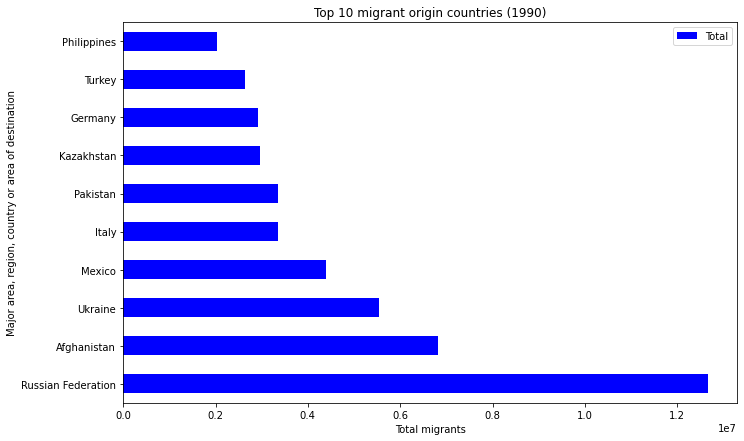

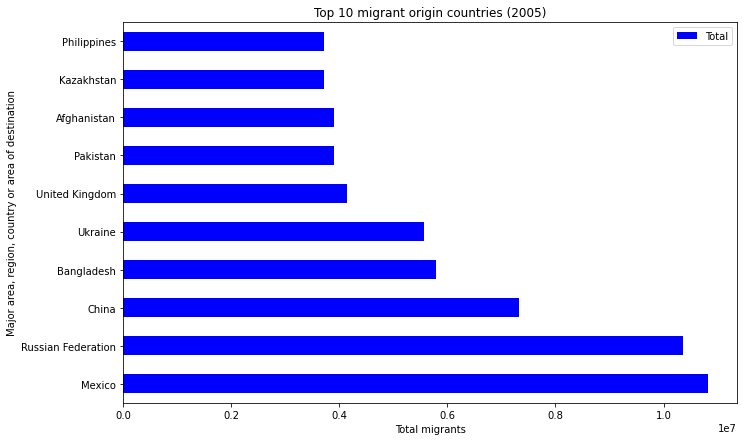

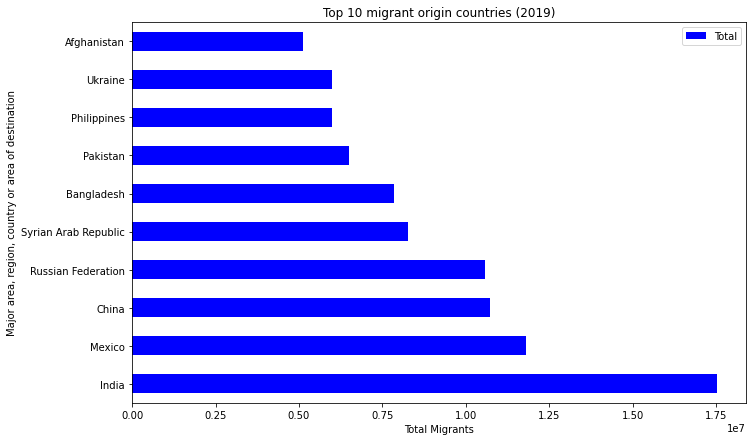

In [44]:
#plot 1990, 2005, 2019 for comparison
plot1990_origin = top10_origin('1990').set_index('Major area, region, country or area of destination')
plot1990_origin.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 migrant origin countries (1990)')
plt.xlabel('Total migrants')
plt.show()

plot2005_origin = top10_origin('2005').set_index('Major area, region, country or area of destination')
plot2005_origin.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 migrant origin countries (2005)')
plt.xlabel('Total migrants')
plt.show()

plot2019_origin = top10_origin('2019').set_index('Major area, region, country or area of destination')
plot2019_origin.plot(kind='barh', figsize=(11,7))
plt.title('Top 10 migrant origin countries (2019)')
plt.xlabel('Total Migrants')
plt.show()

# 5. Conclusion

**Highlights**

1. Most migrants reside in (1) Asia, (2) Europe, and (3) Northern America.
2. Migrant stock as percentage of total country population for most countries was 40% or below. The exceptions are United Arab Emirates and Qatar. Between 1990-2019, the highest percentage reached 80% in the UAE. 
3. In almost all countries in Asia, Europe, and Northern America, male and female migrants as a percentage of migrant stock was split evenly over time. The exceptions, again, are countries in Western Asia. Countries in Western Asia saw a greater difference between male and female migrant stock totals. Male migrants in Saudi Arabia, Qatar, UAE, and Yemen make up a larger portion of the total migrants. In Armenia, female migrants make up a larger portion of total migrants in that country.
4. The bulk of total migrants reside in the age groups 20-39 and 40-64 age groups. Most likely middle age migrants looking for work. 
5. The USA has been the top destination for migrants from 1990-2019.
6. The top migrant origin countries, or the countries migrants are leaving has changed over time. Most recently, most of the migrants around the world are from India. 